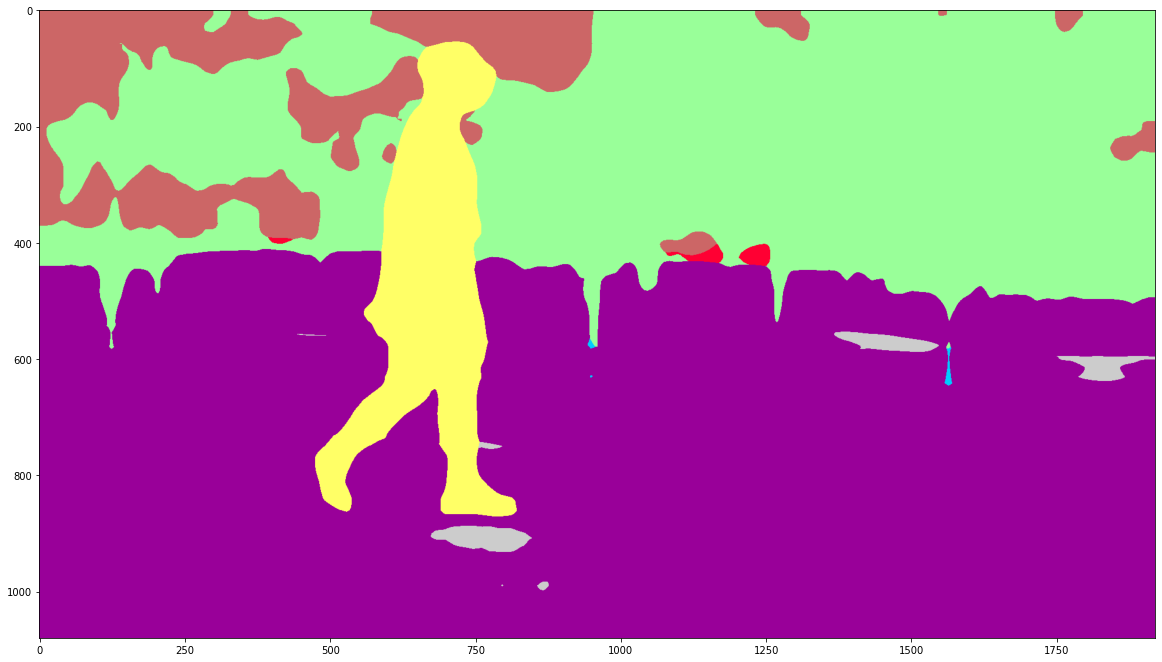

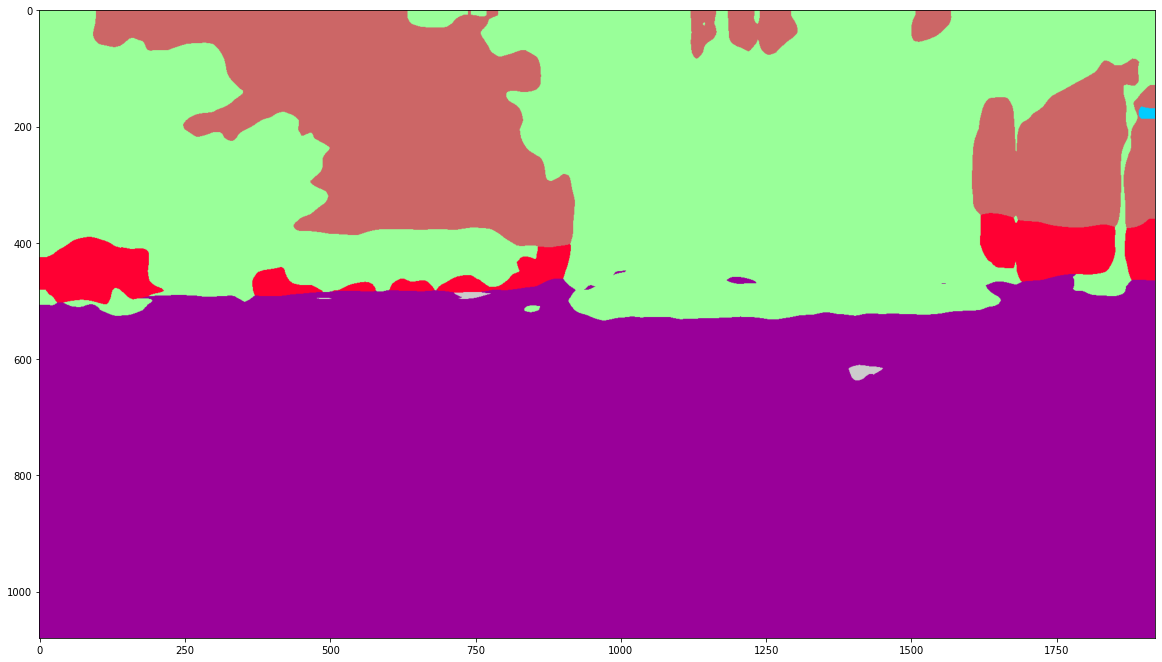

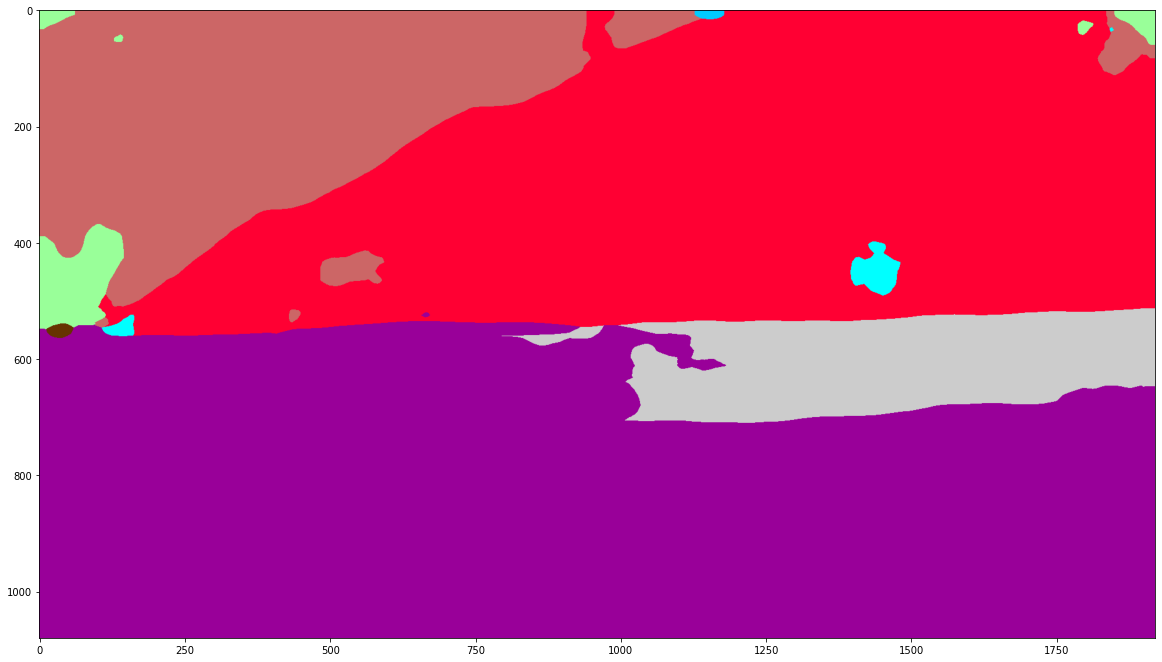

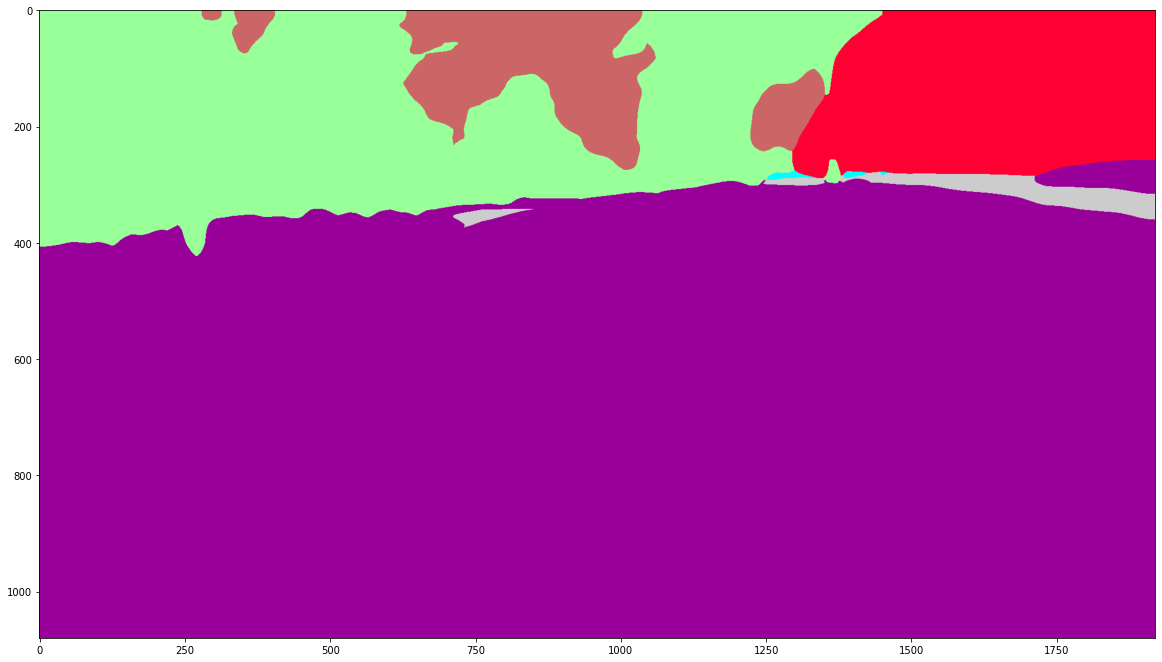

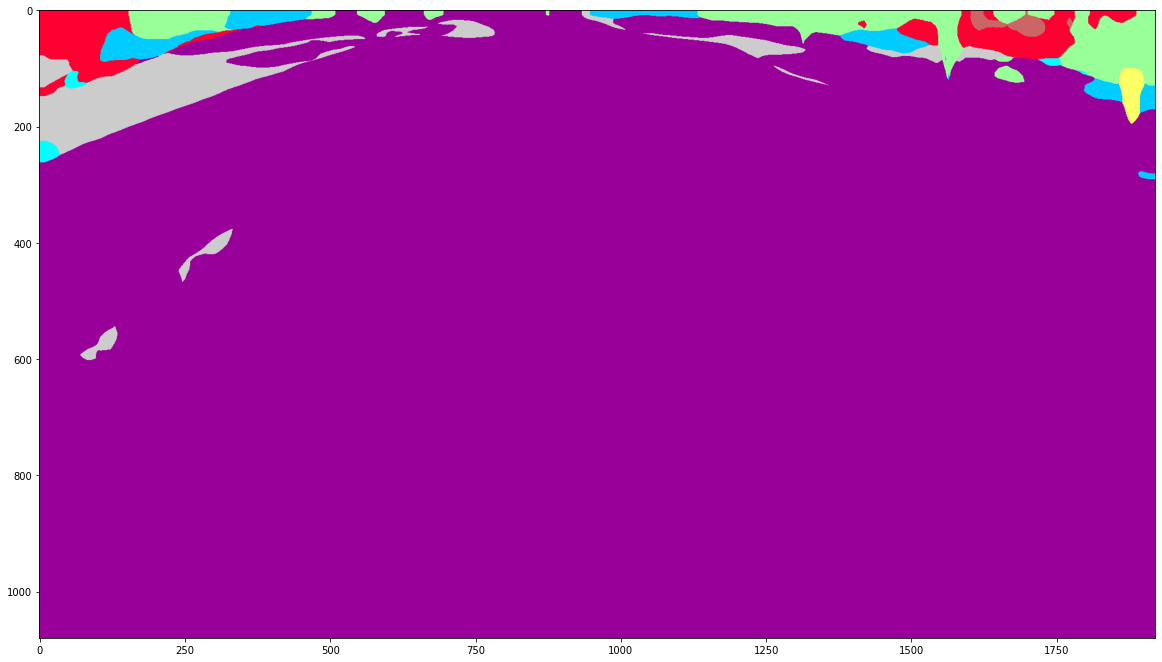

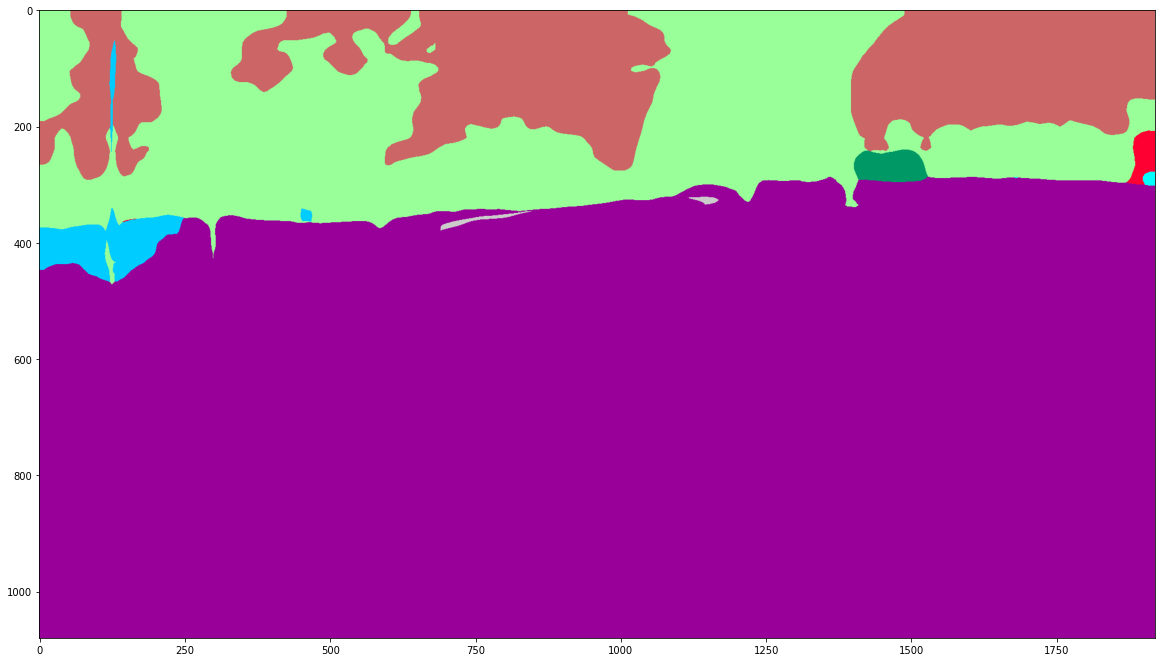

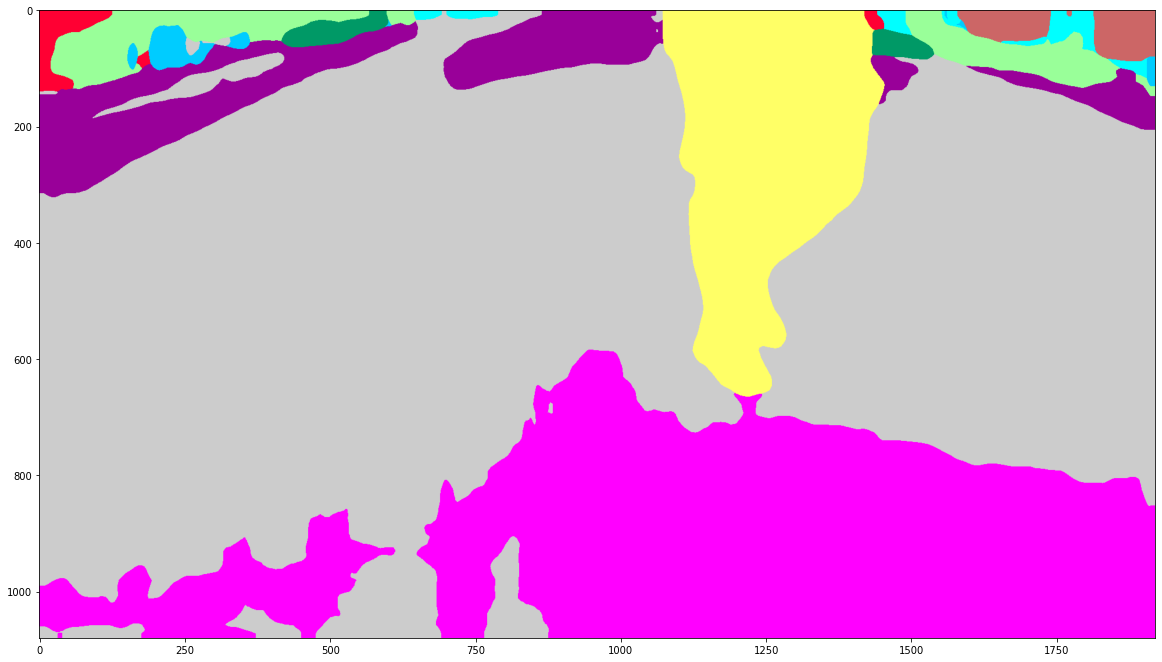

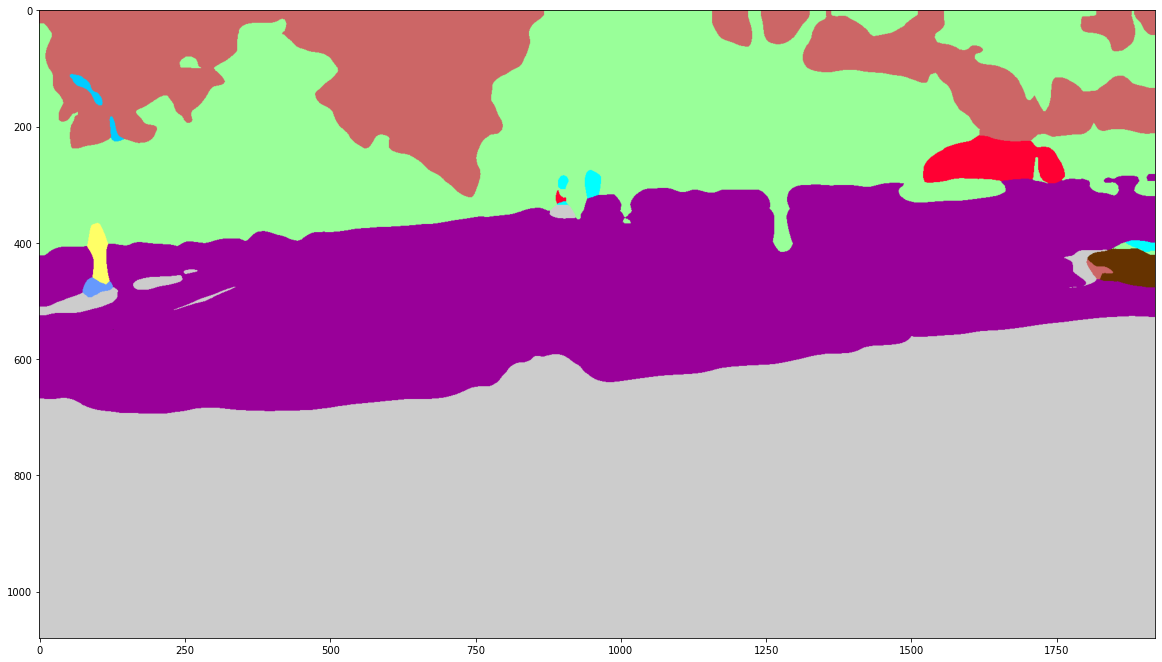

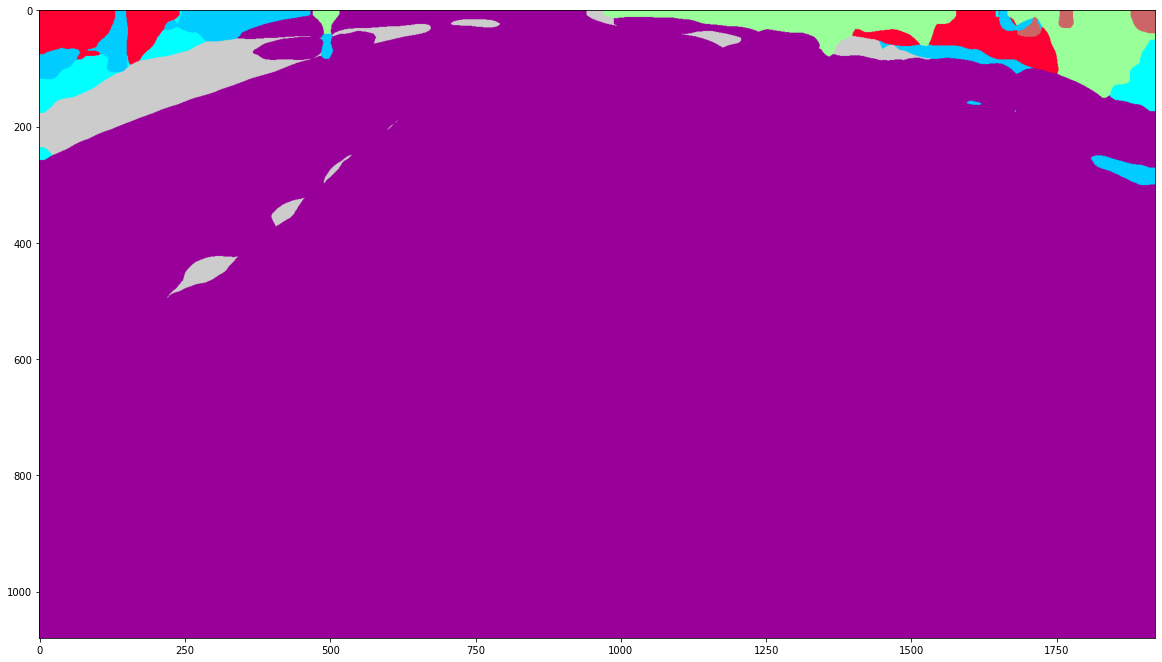

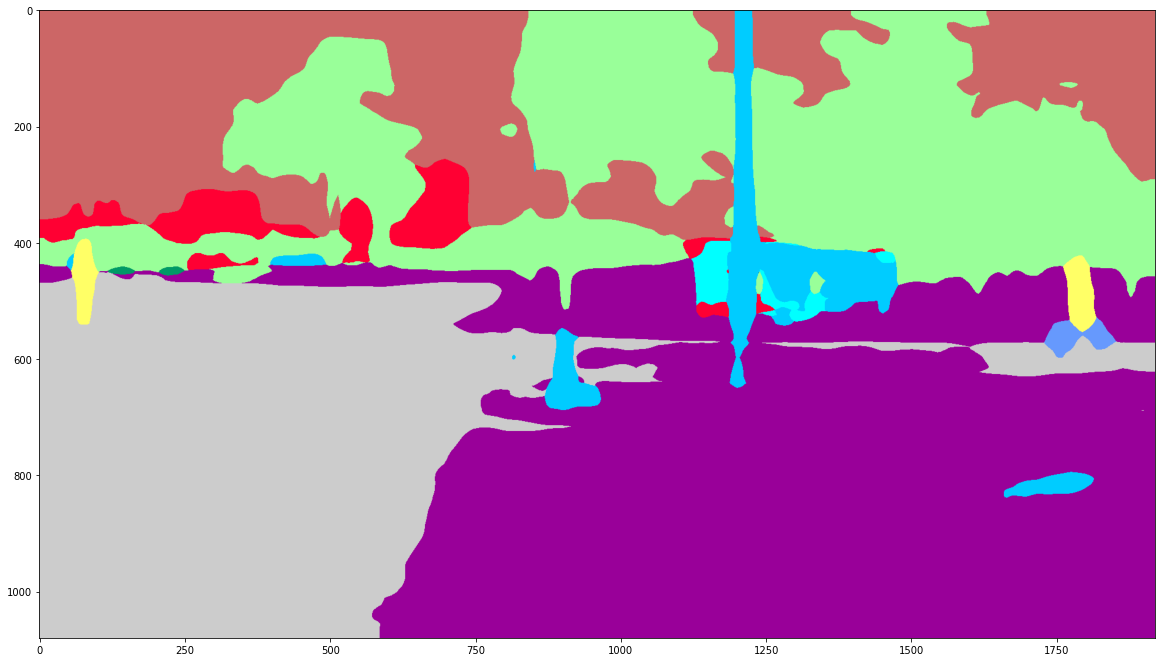

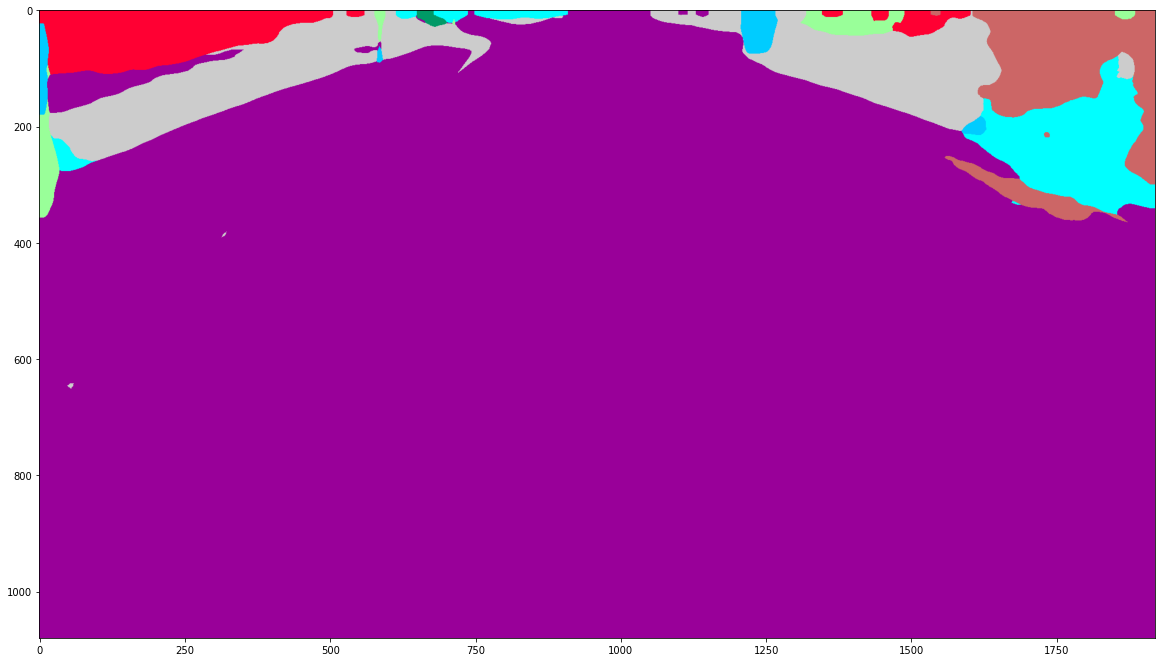

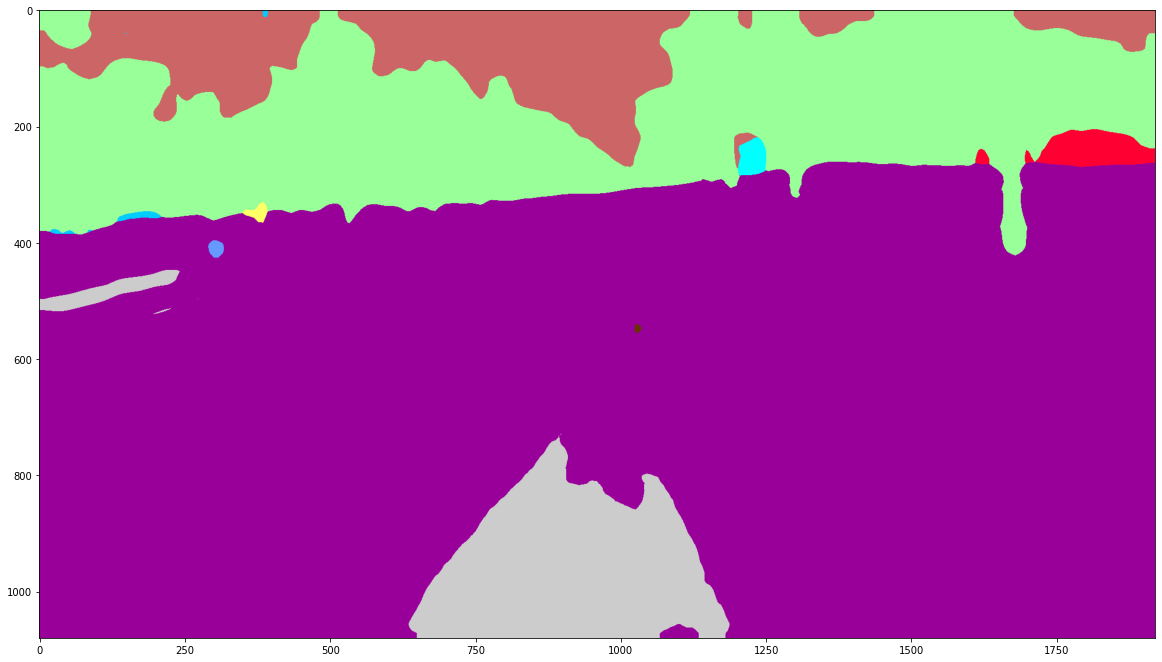

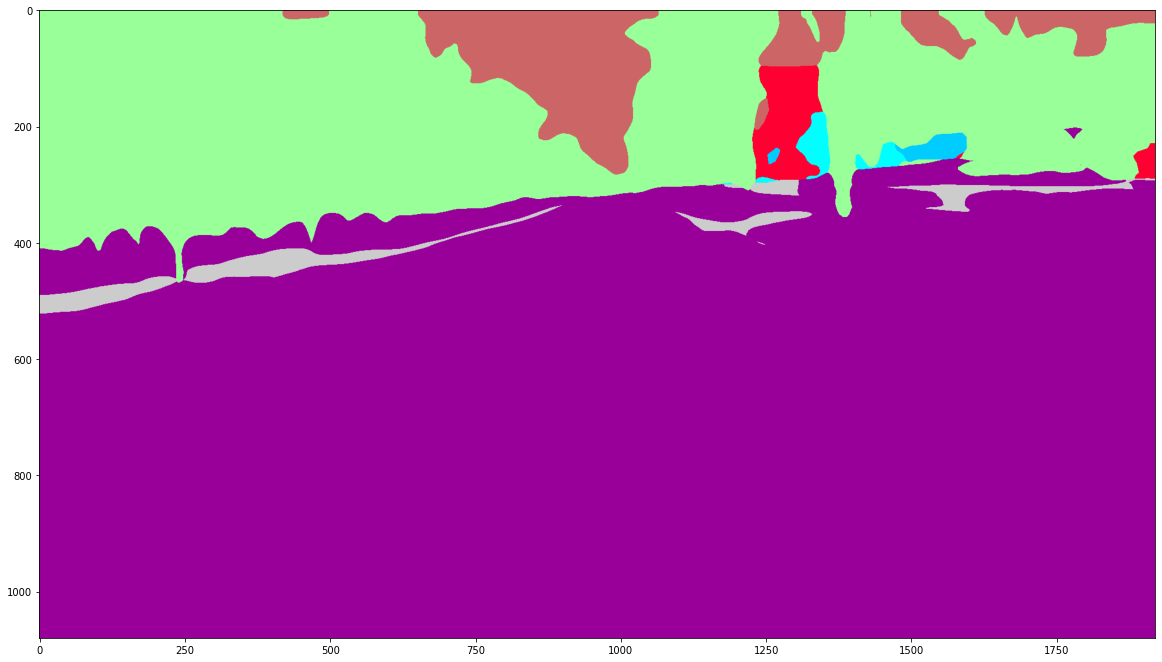

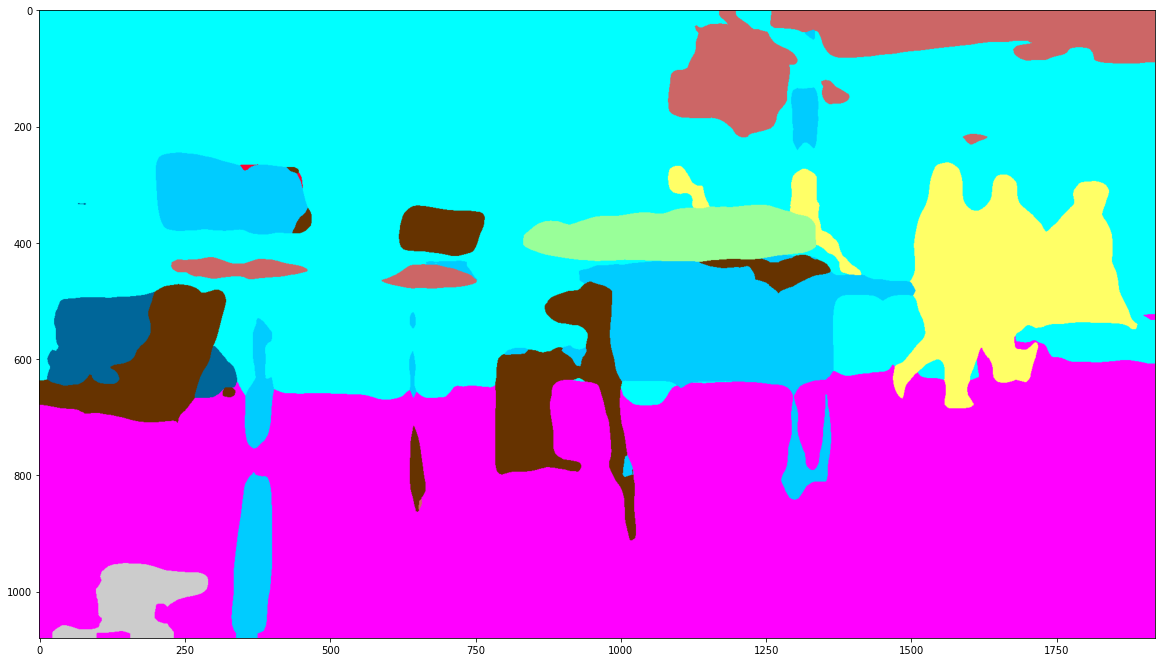

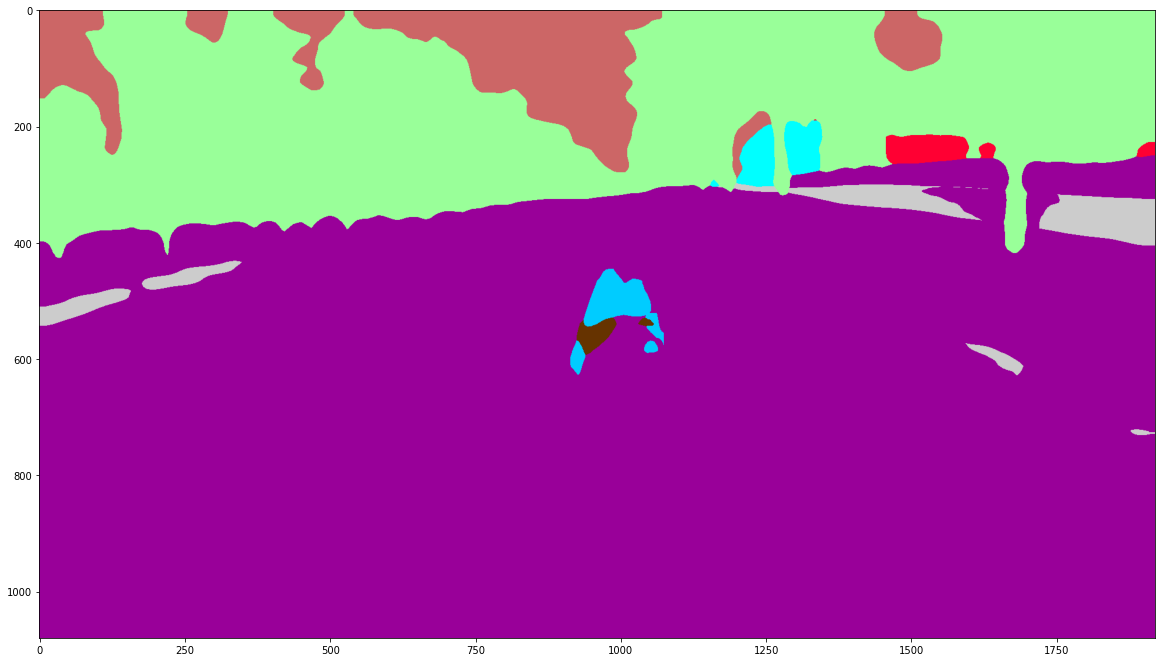

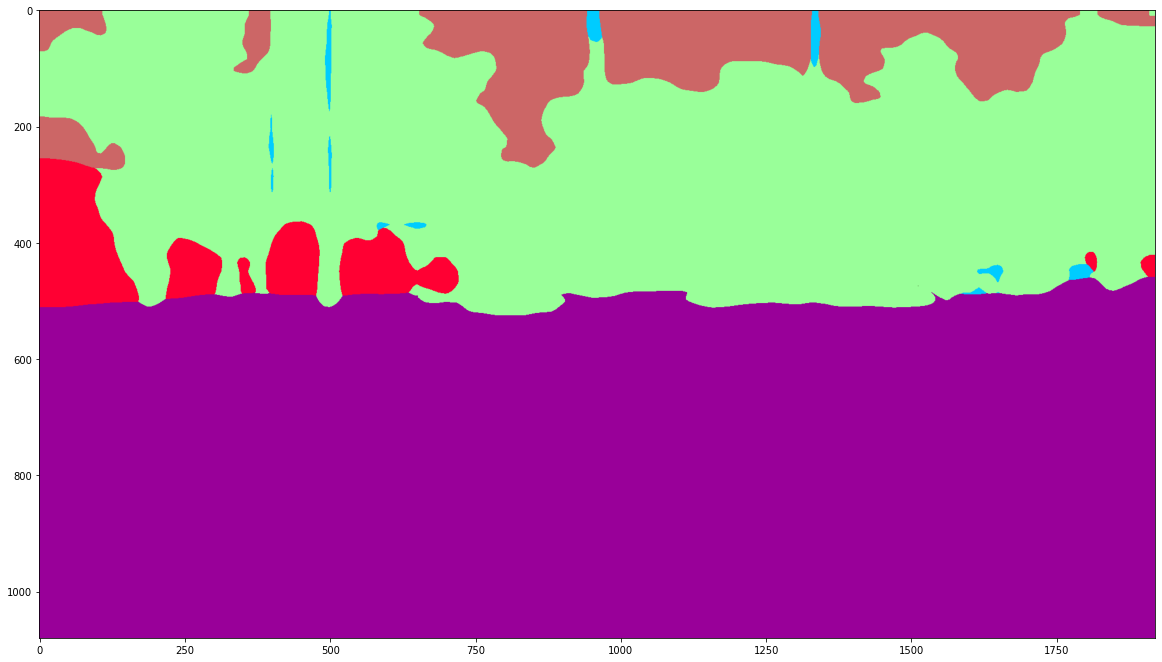

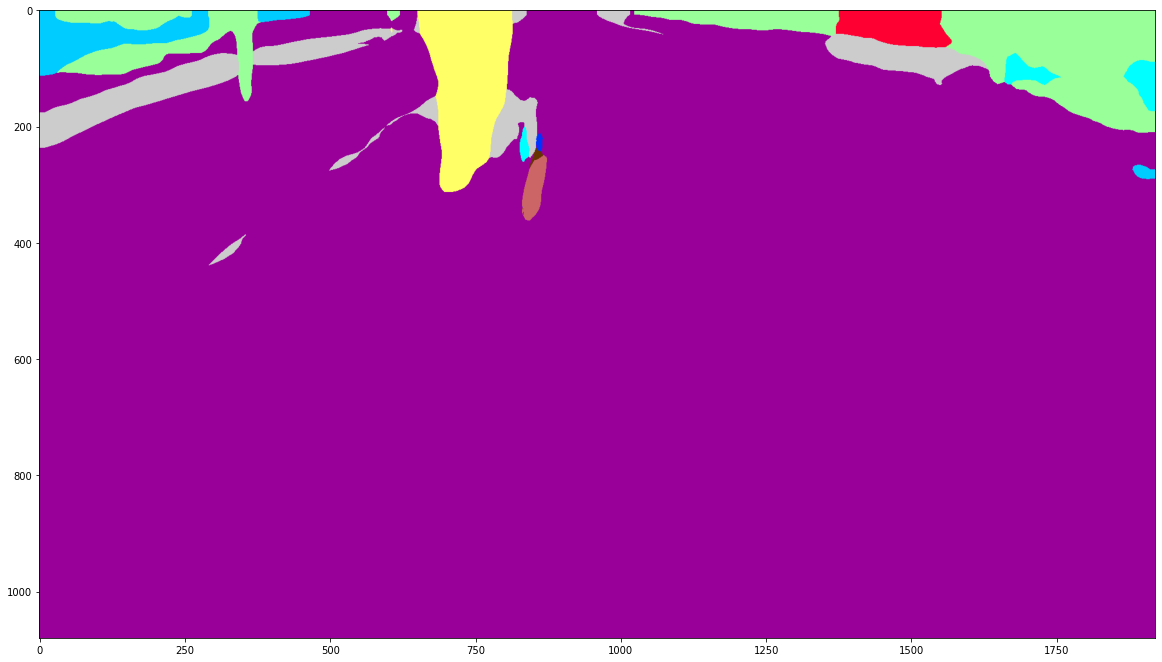

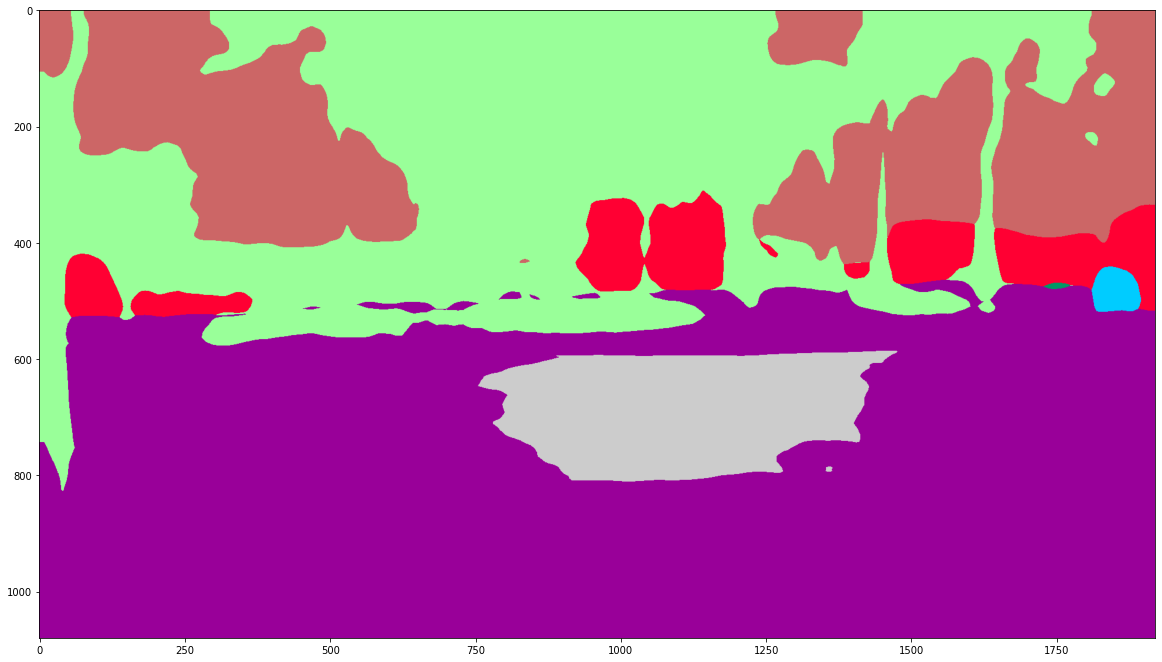

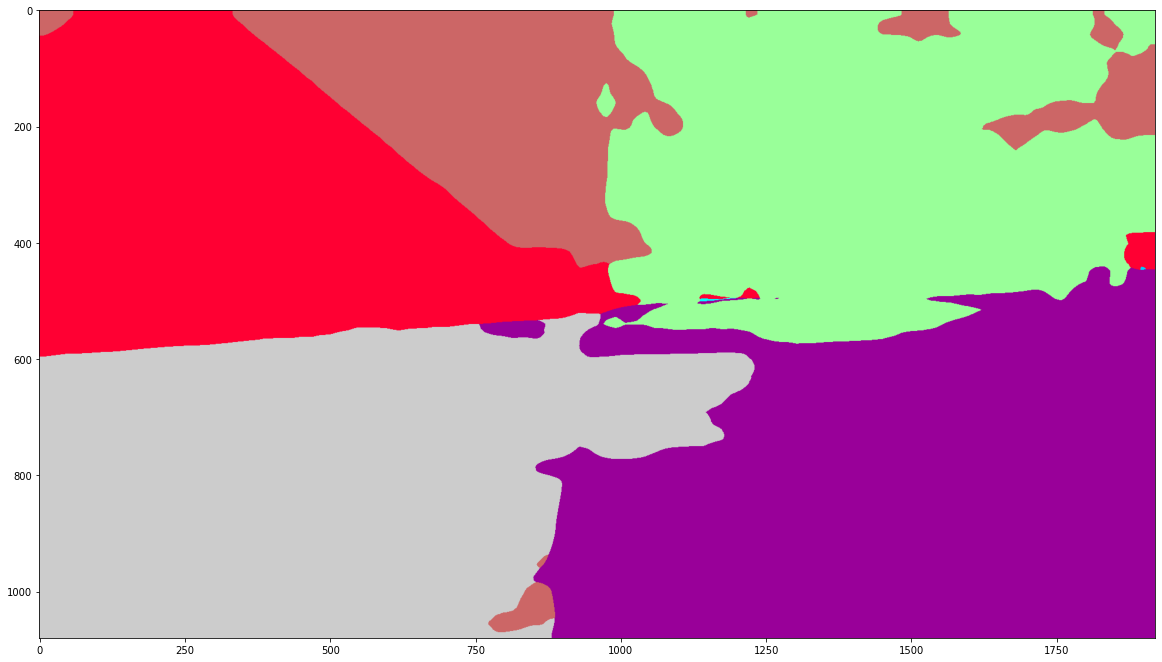

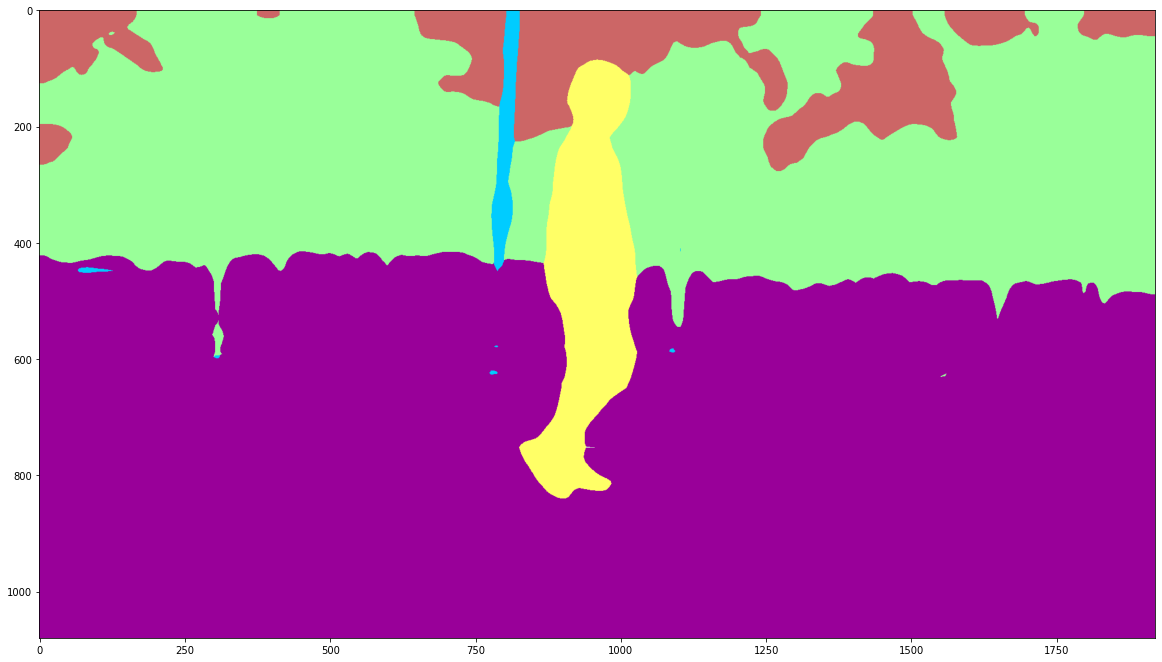

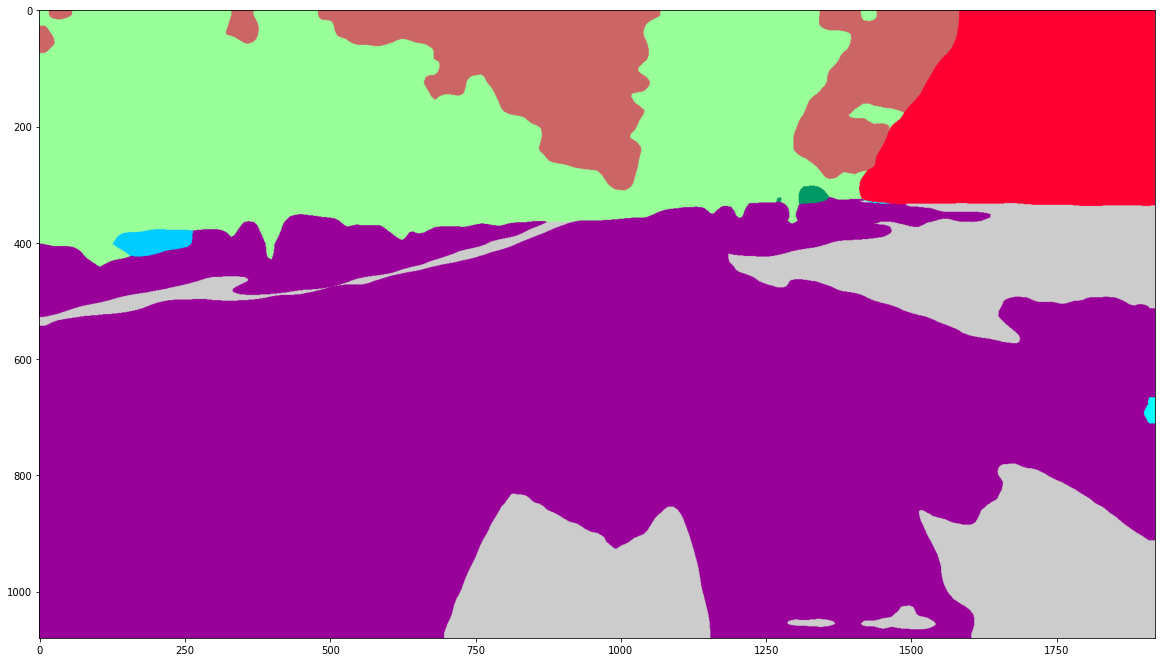

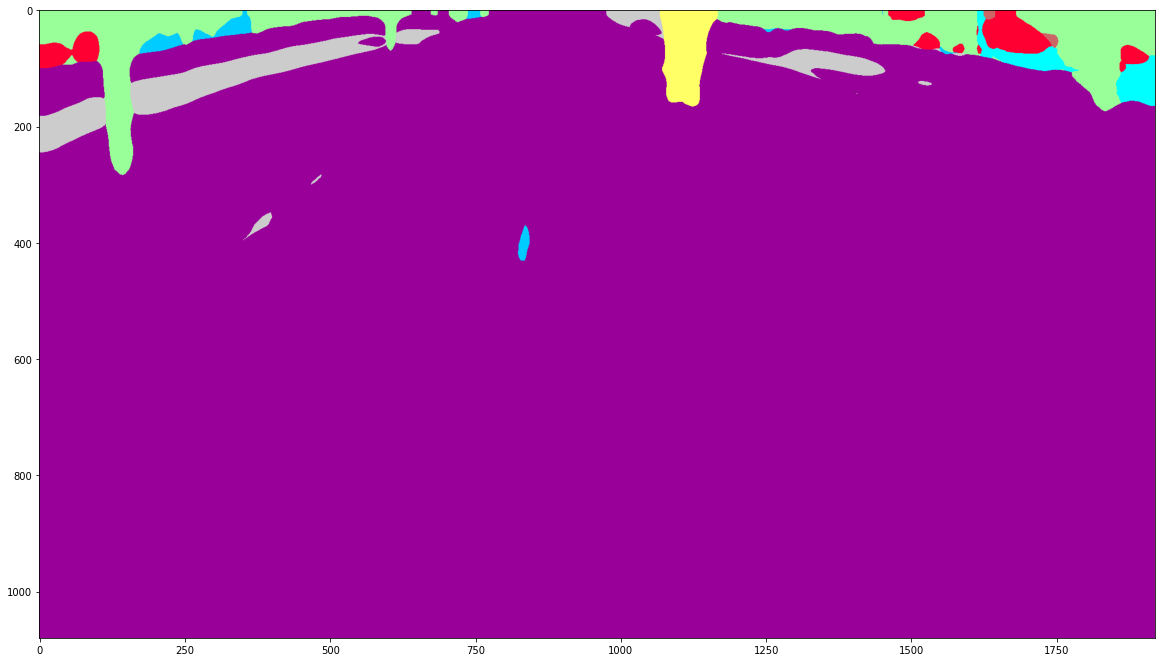

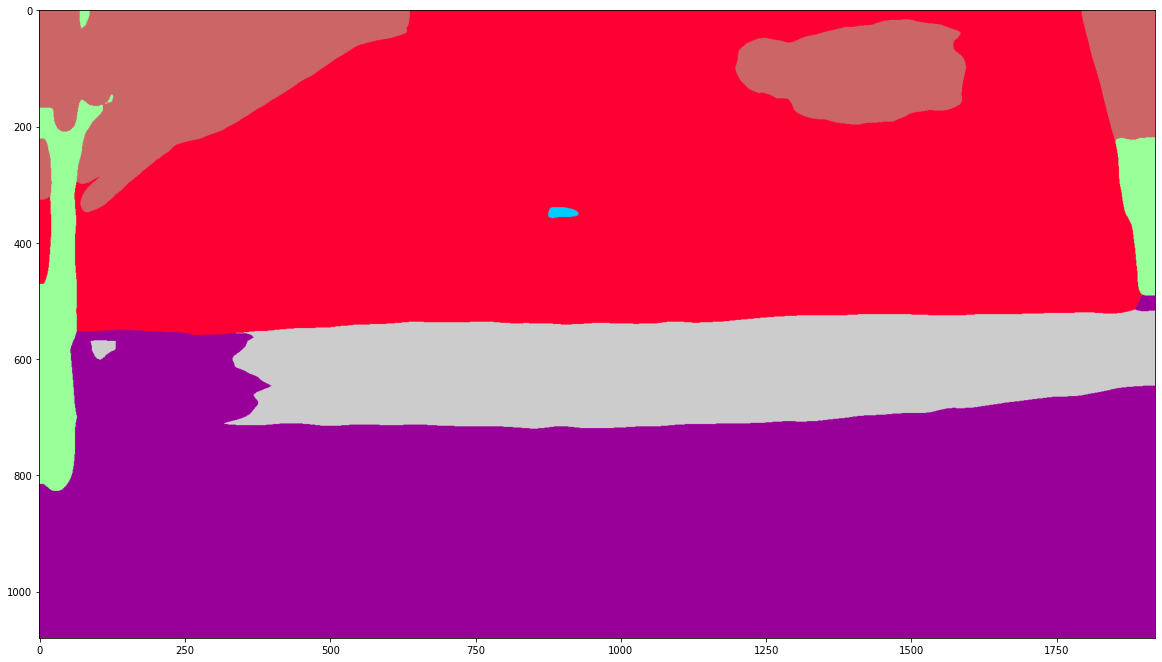

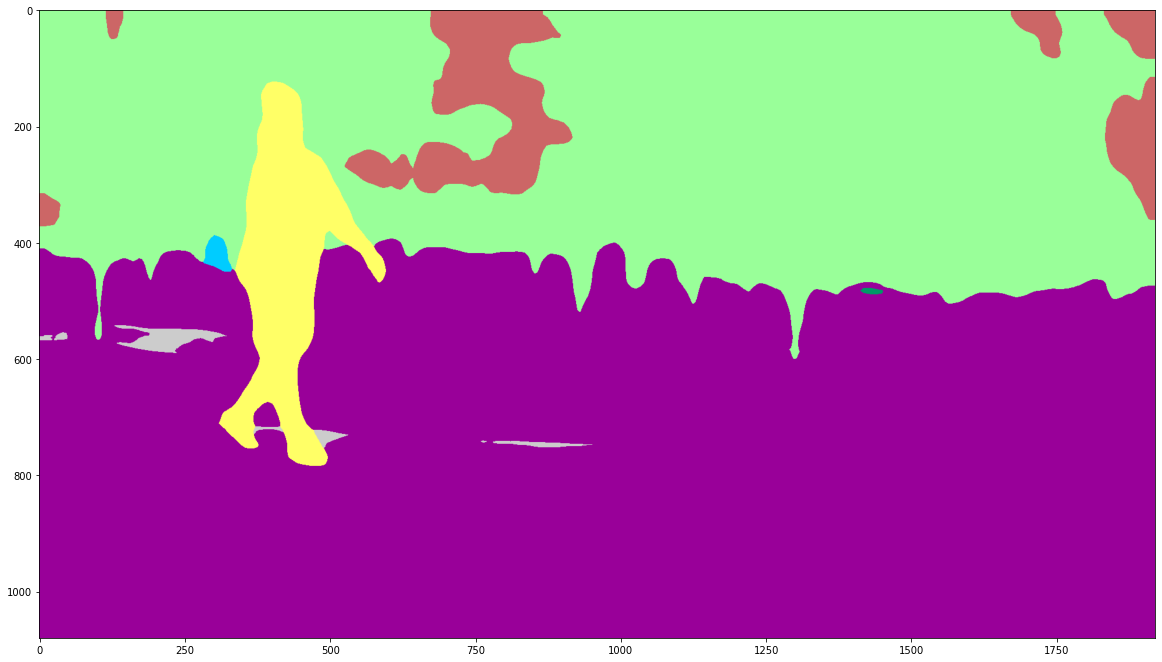

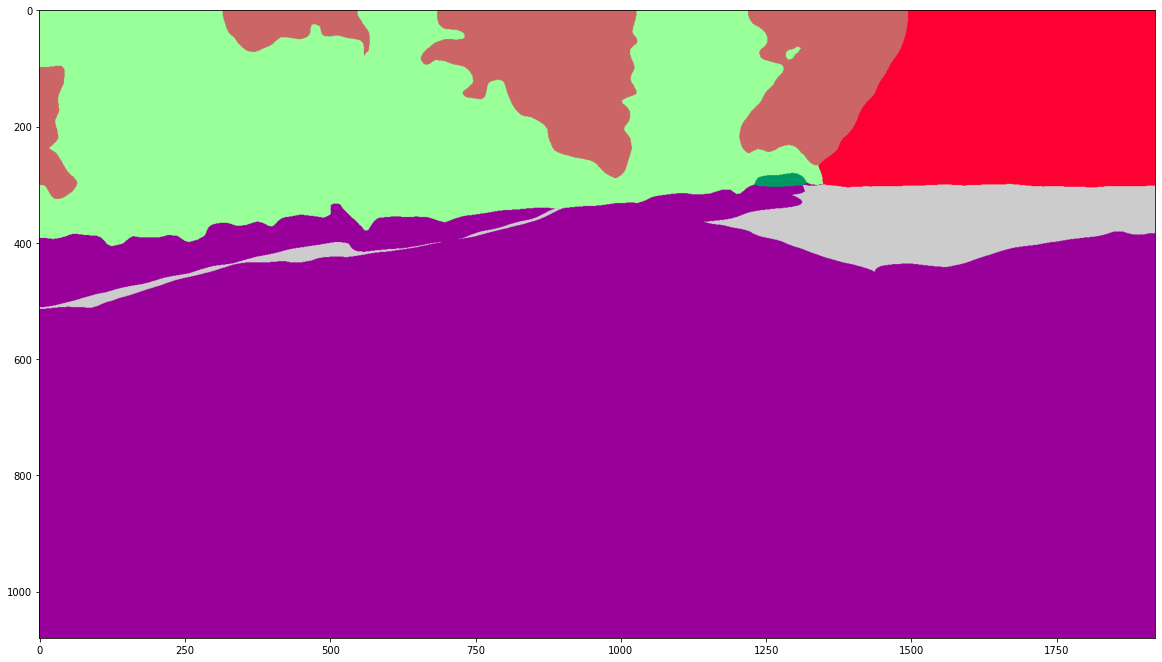

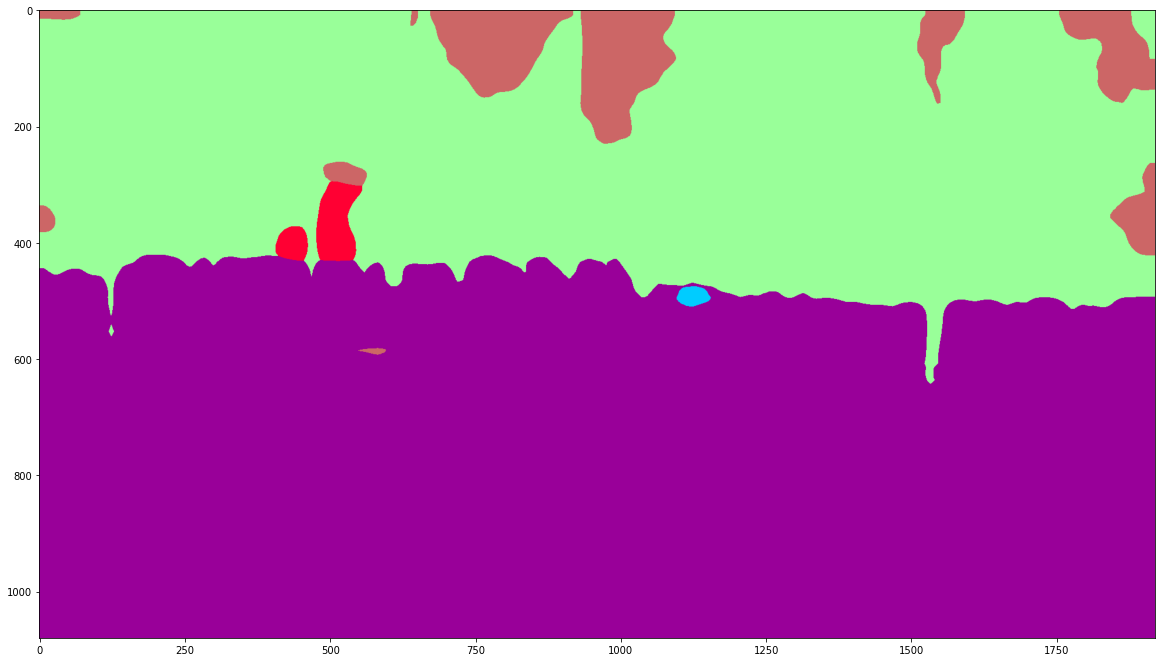

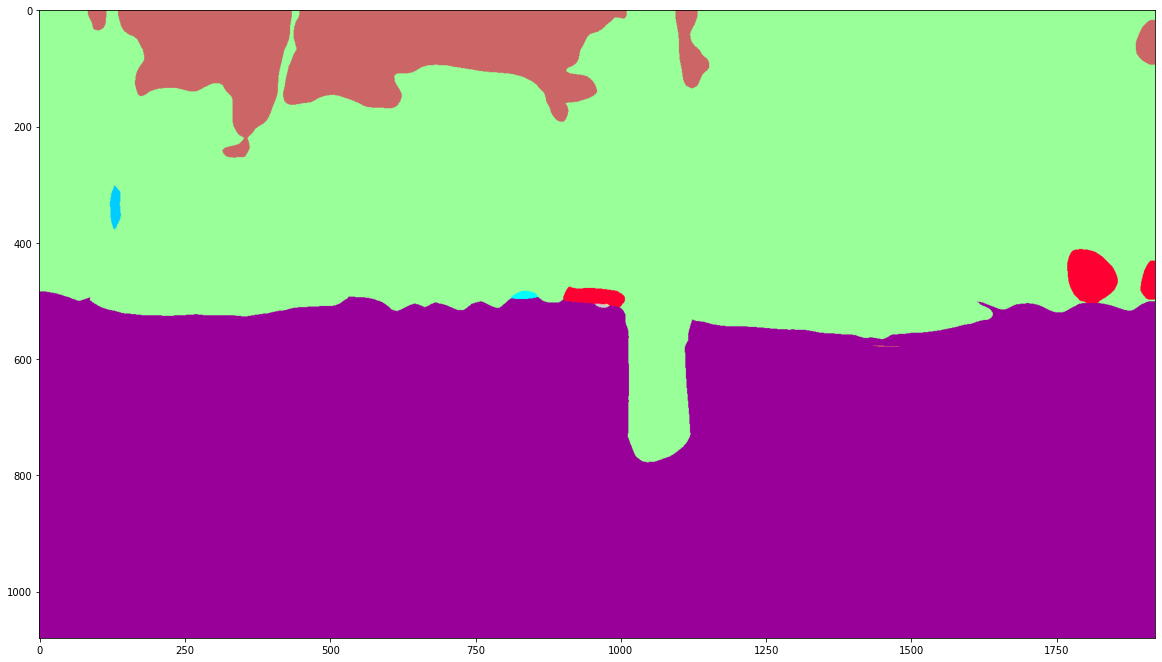

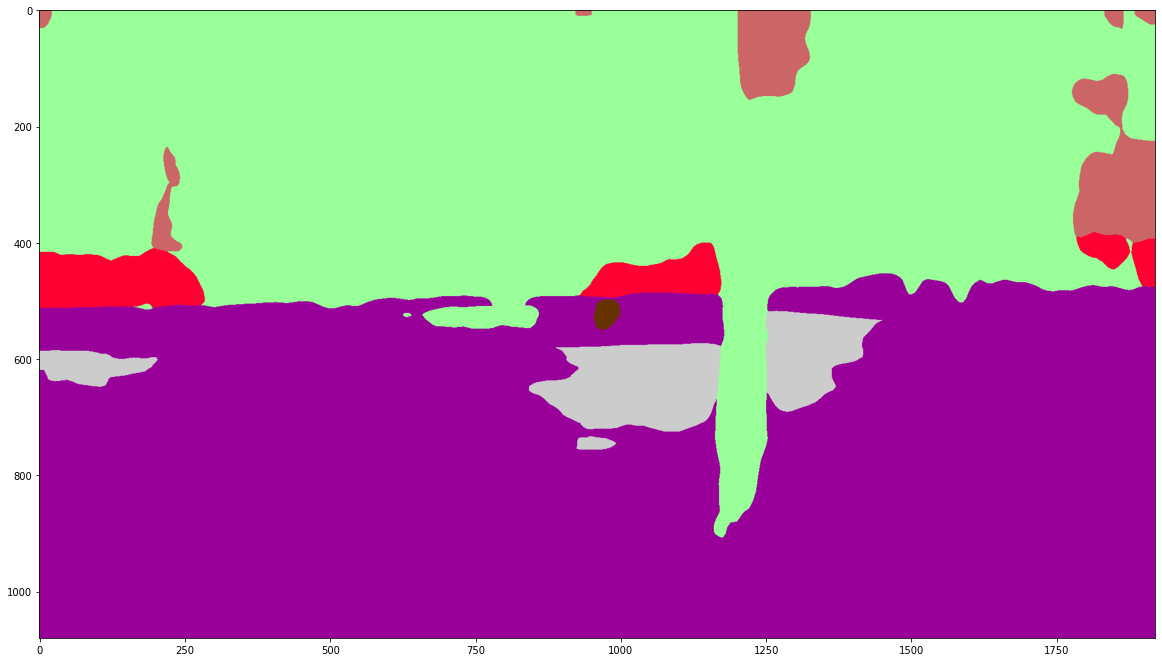

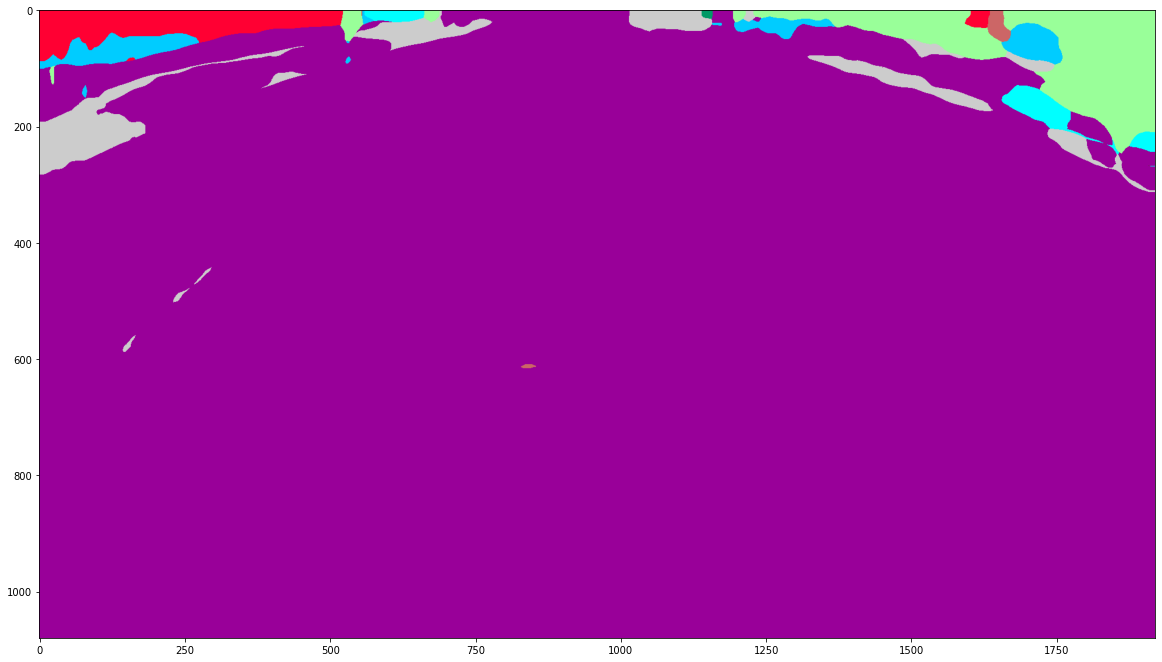

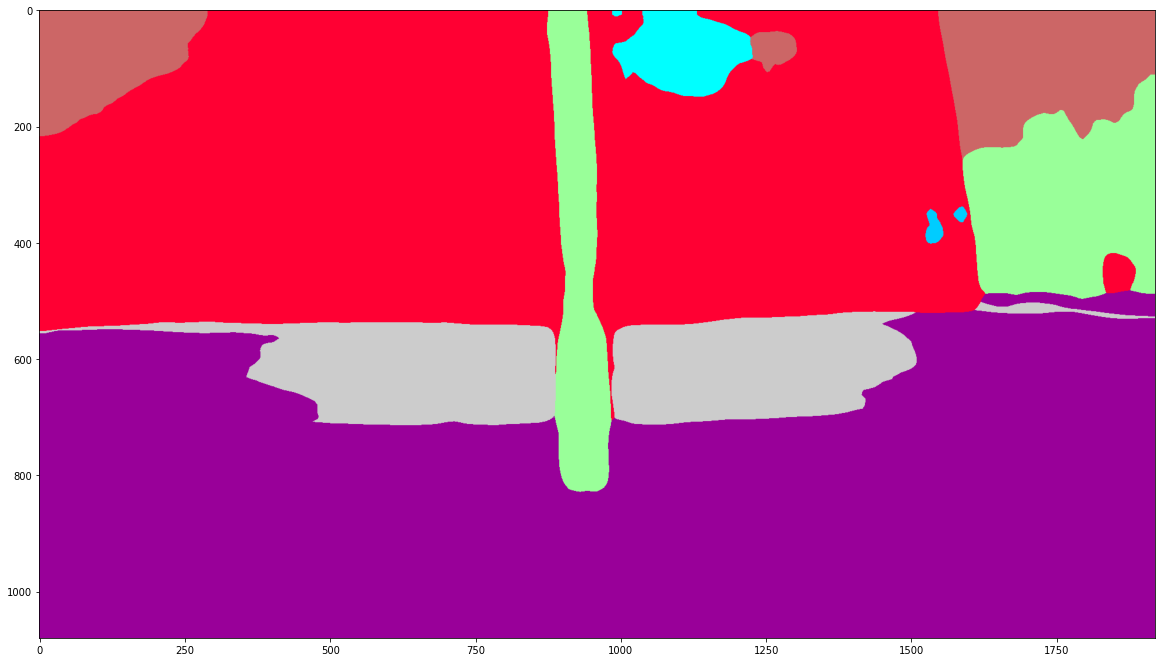

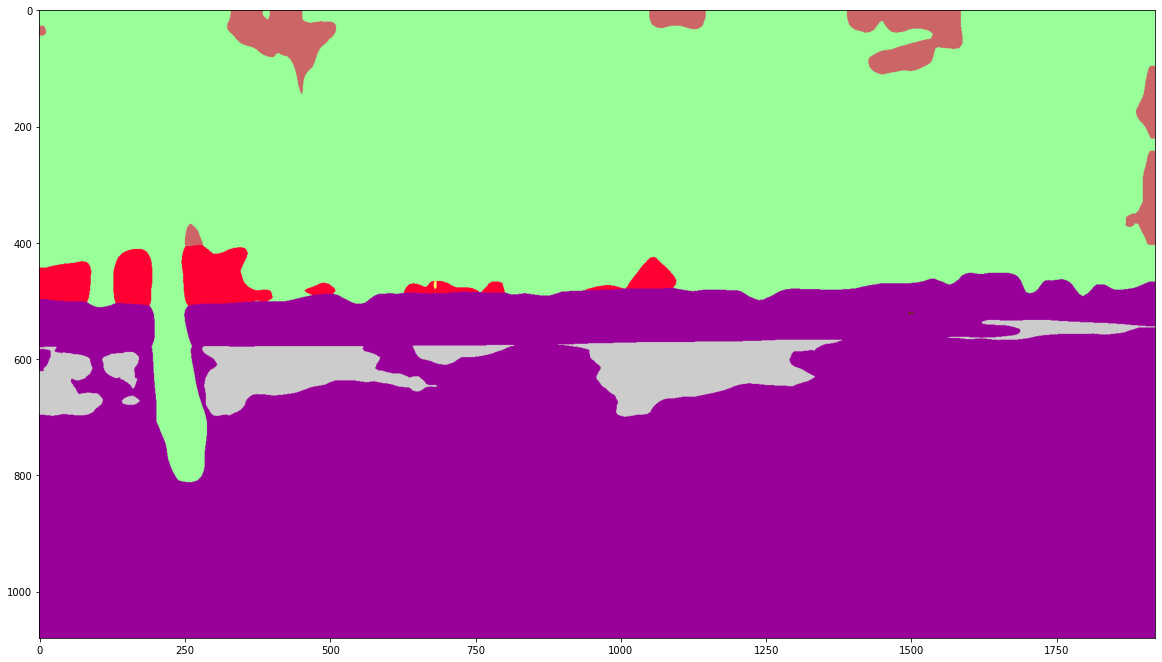

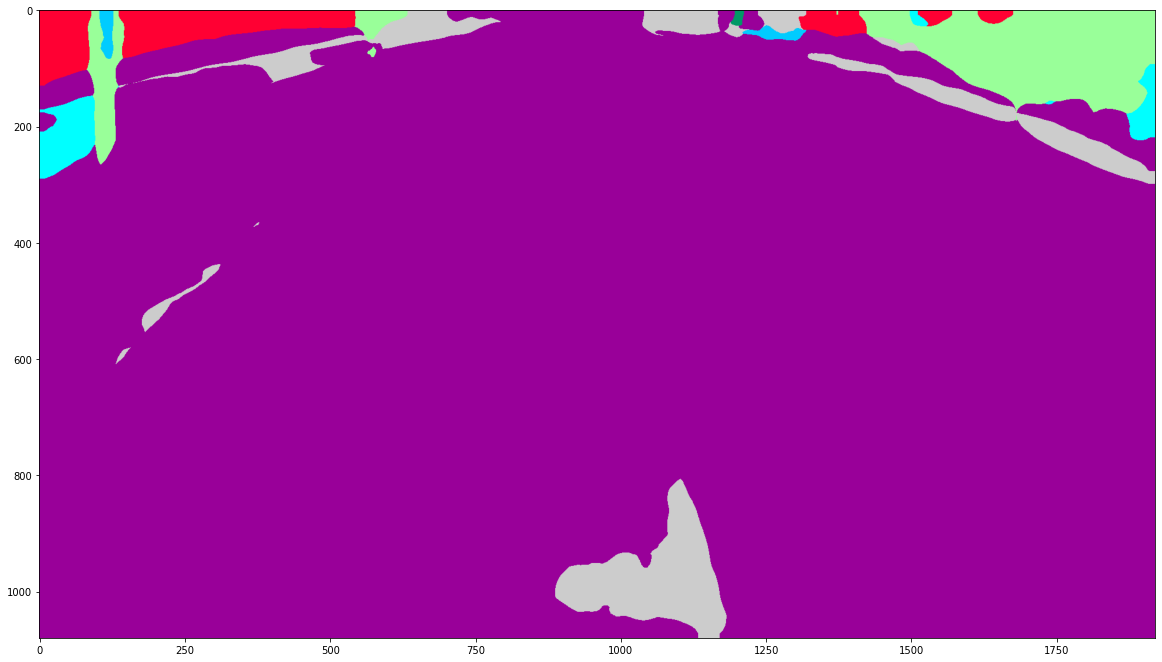

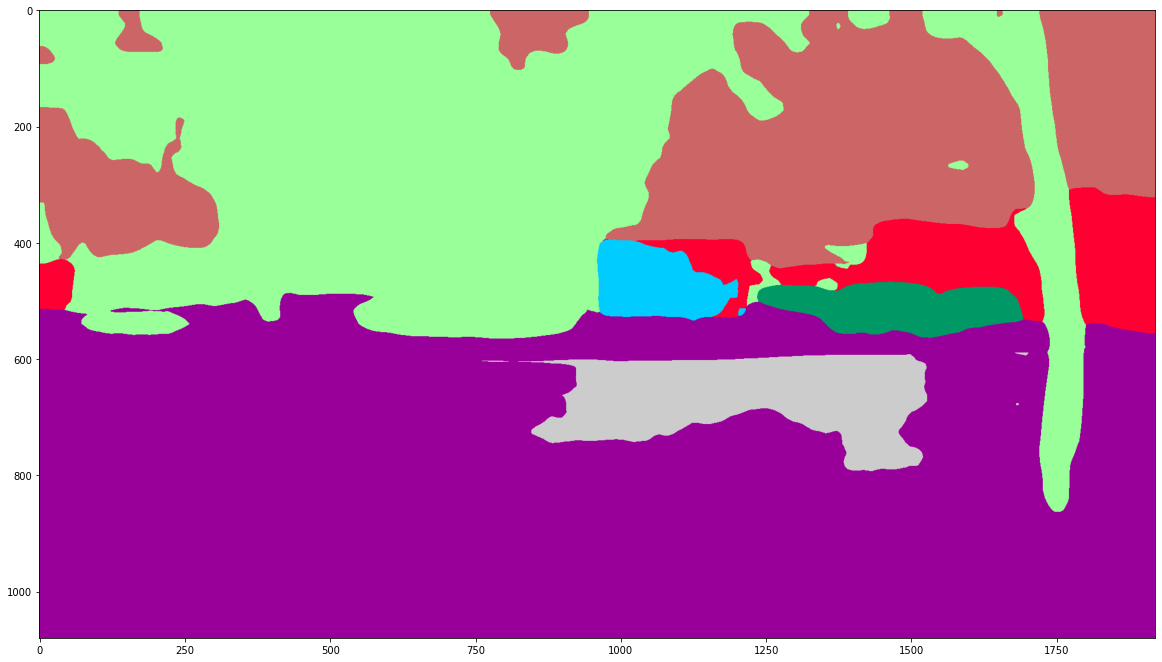

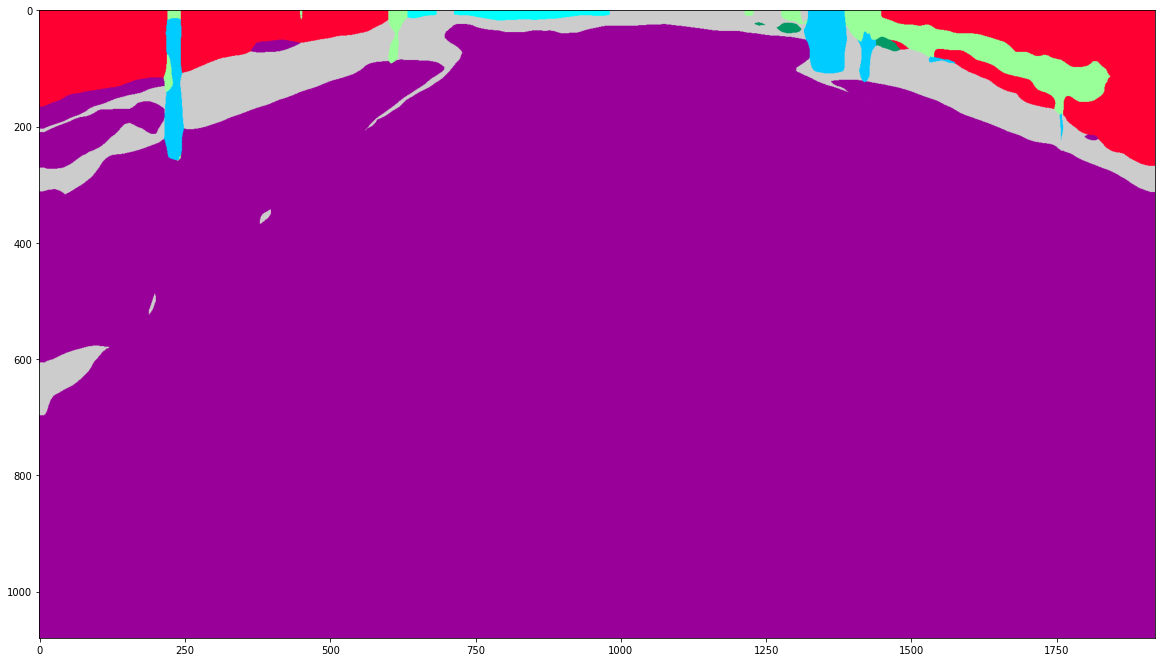

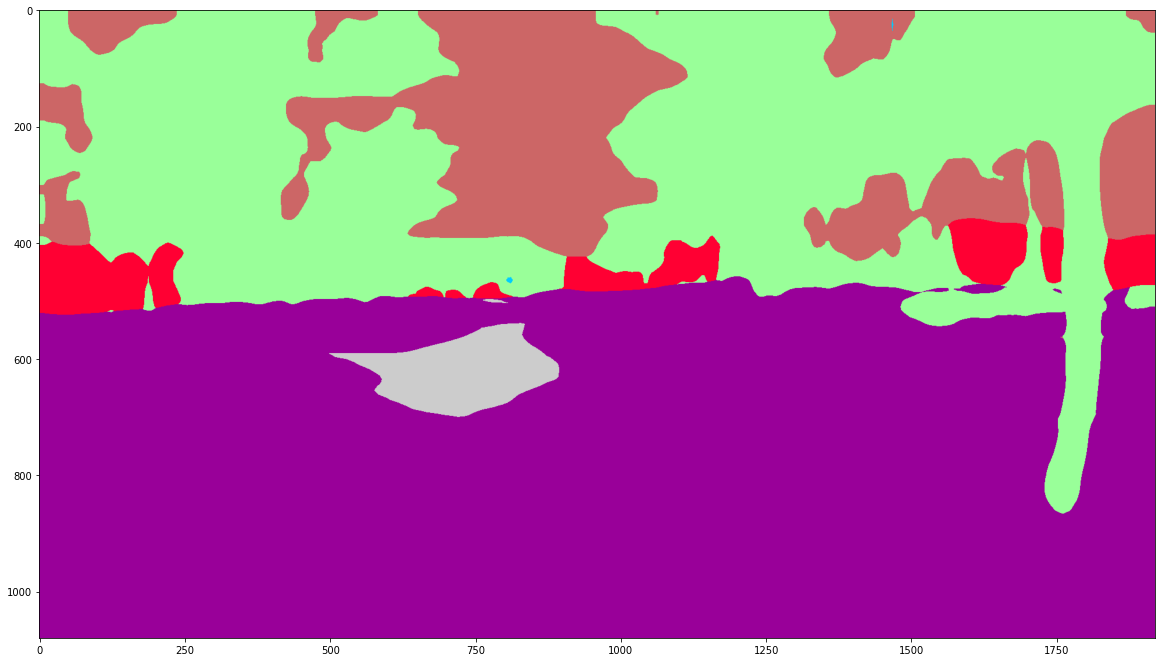

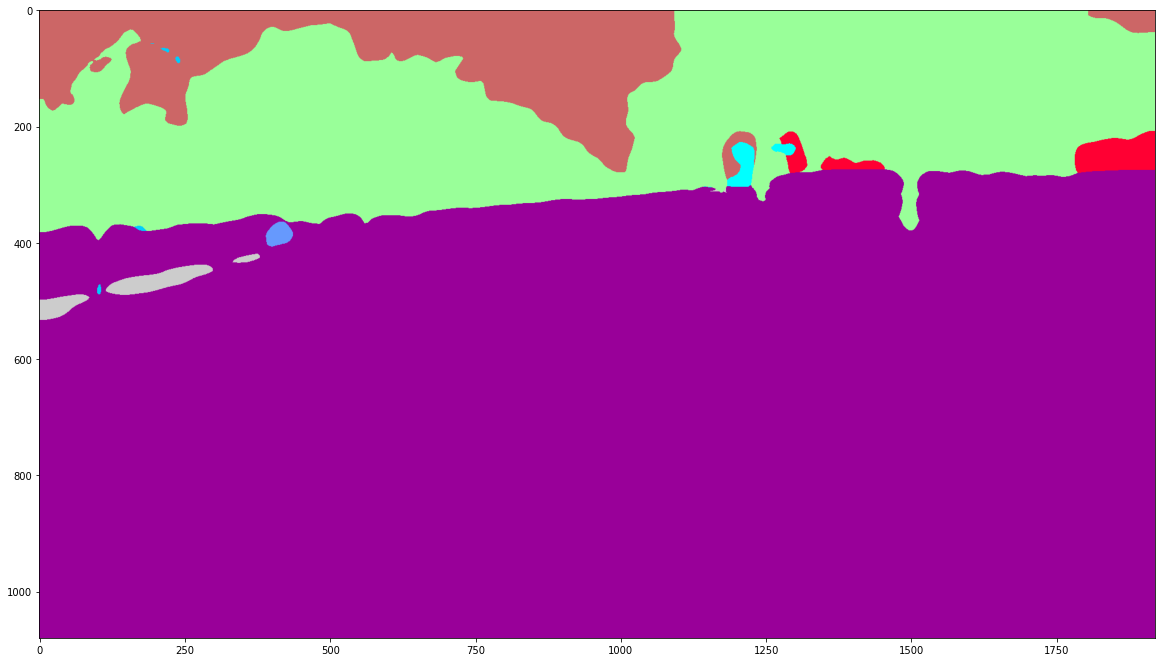

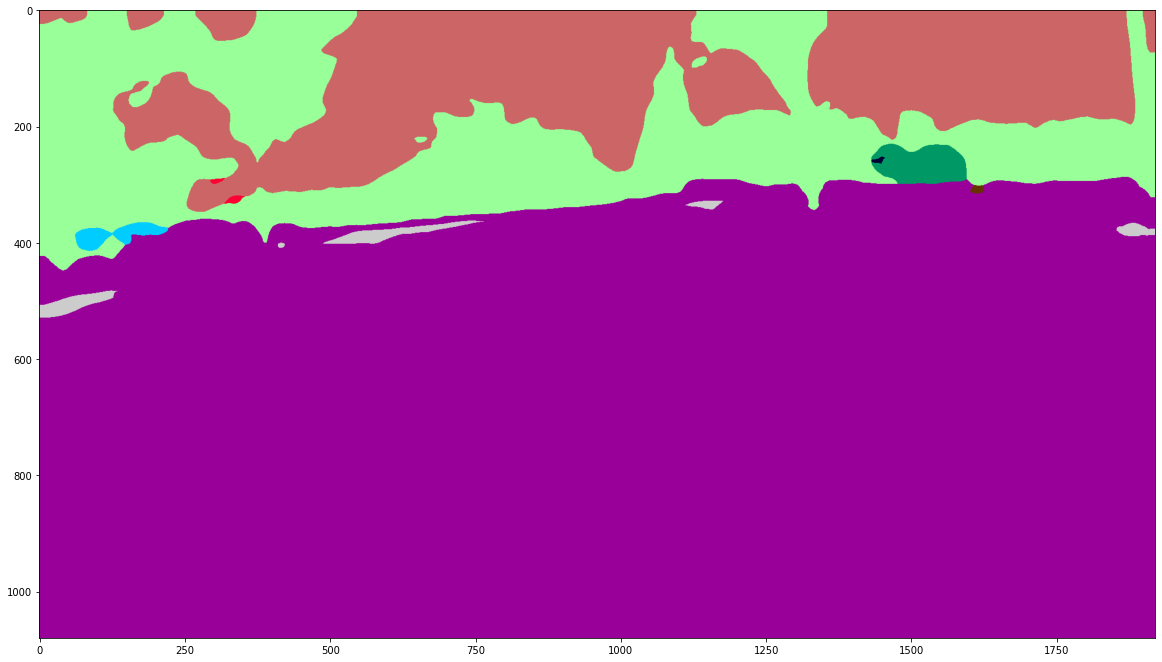

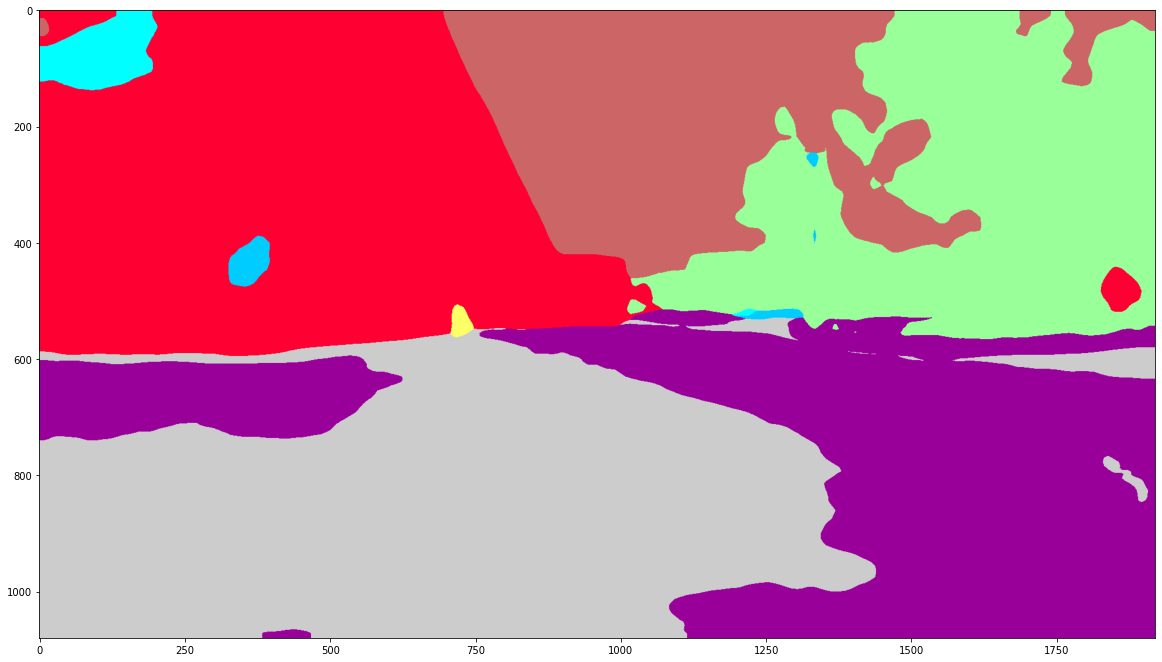

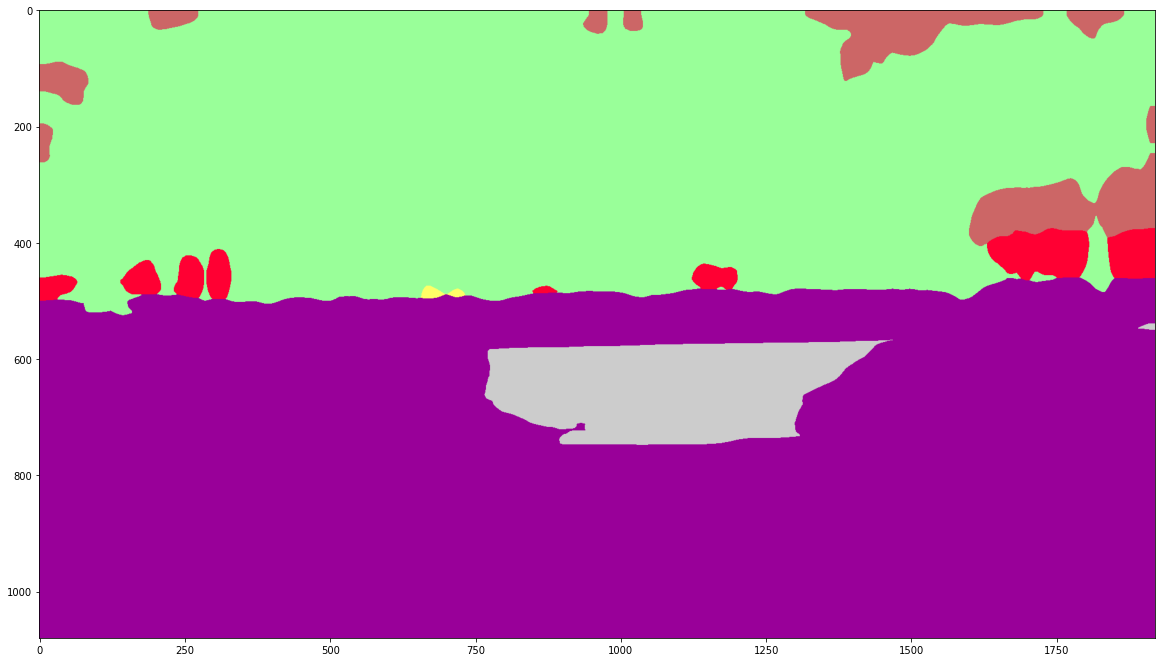

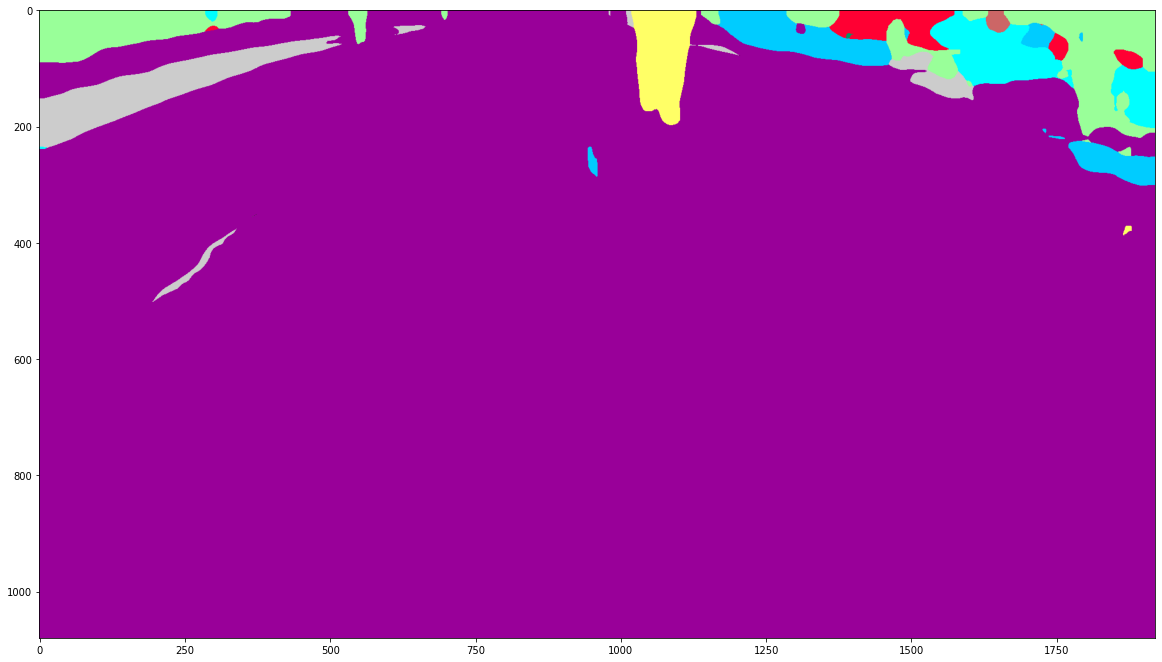

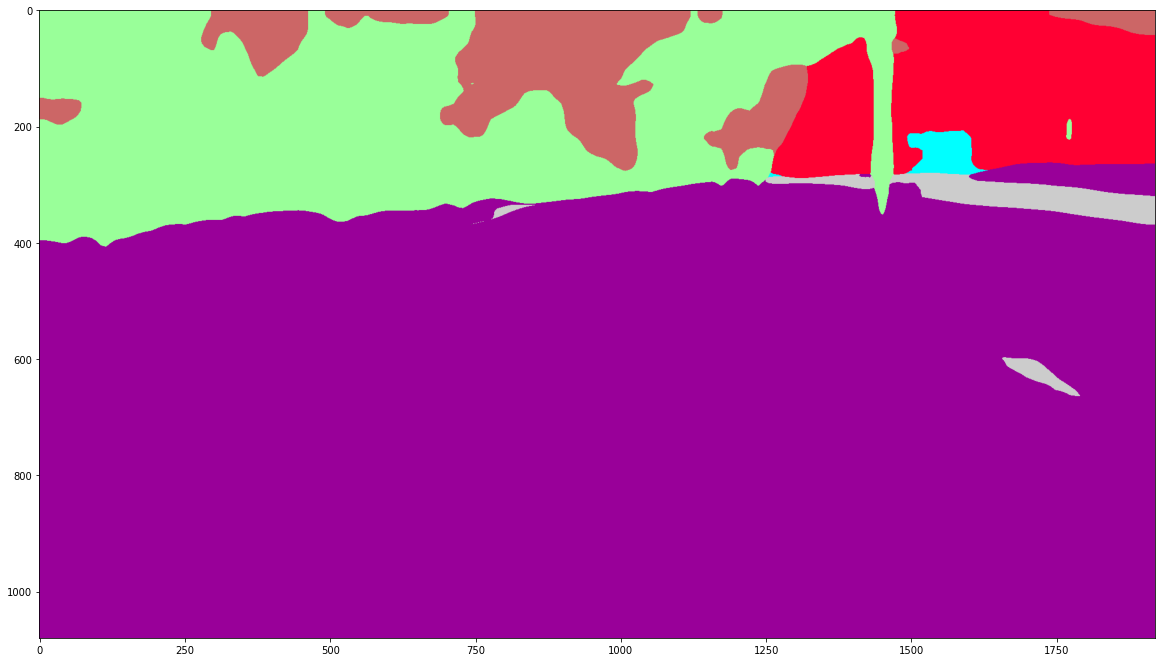

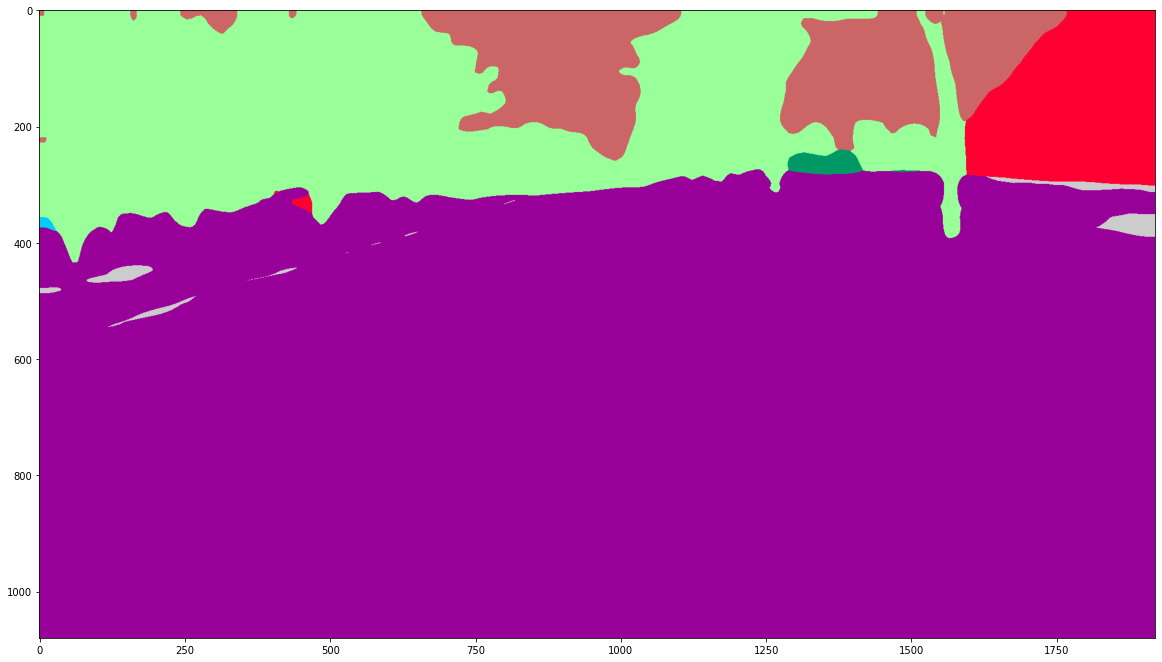

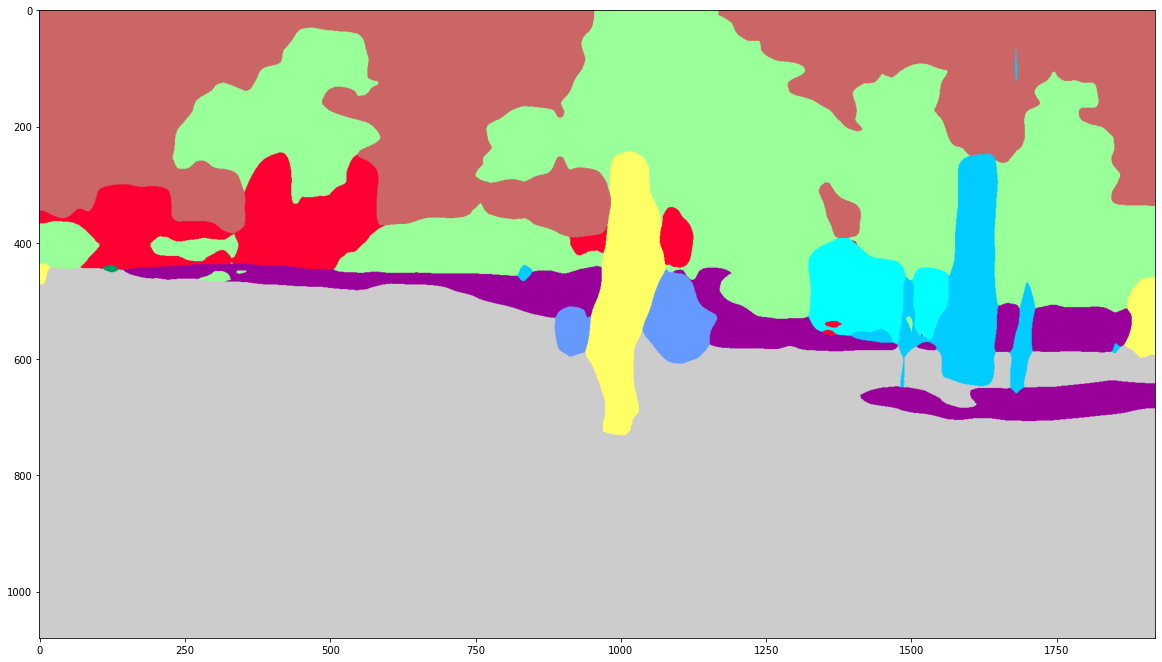

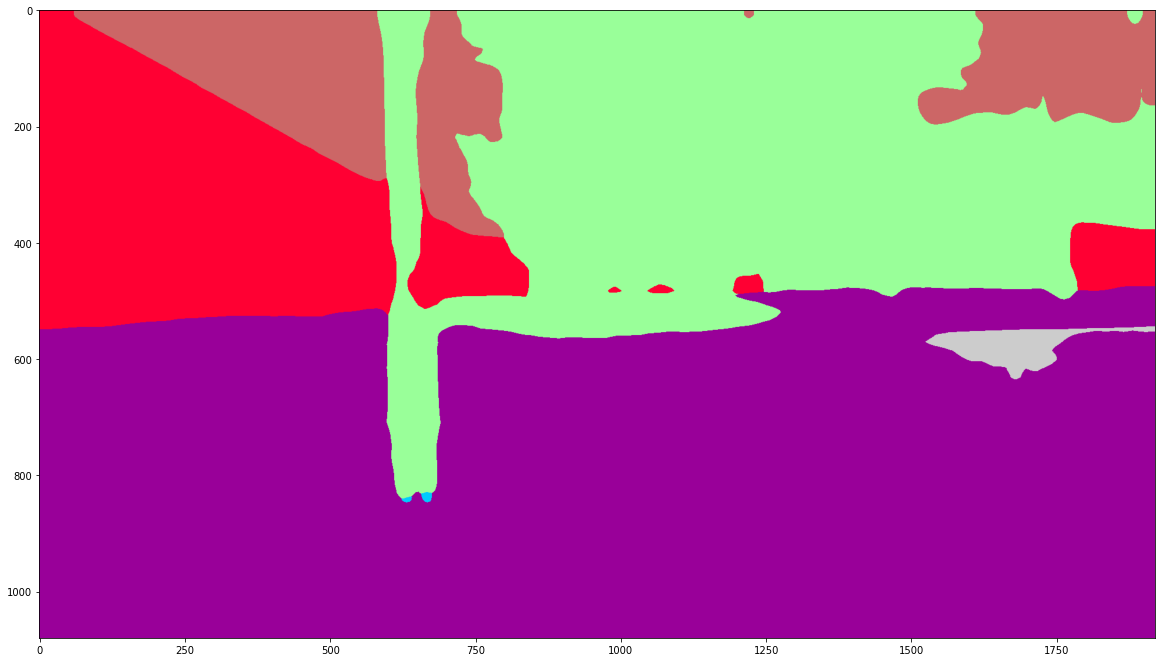

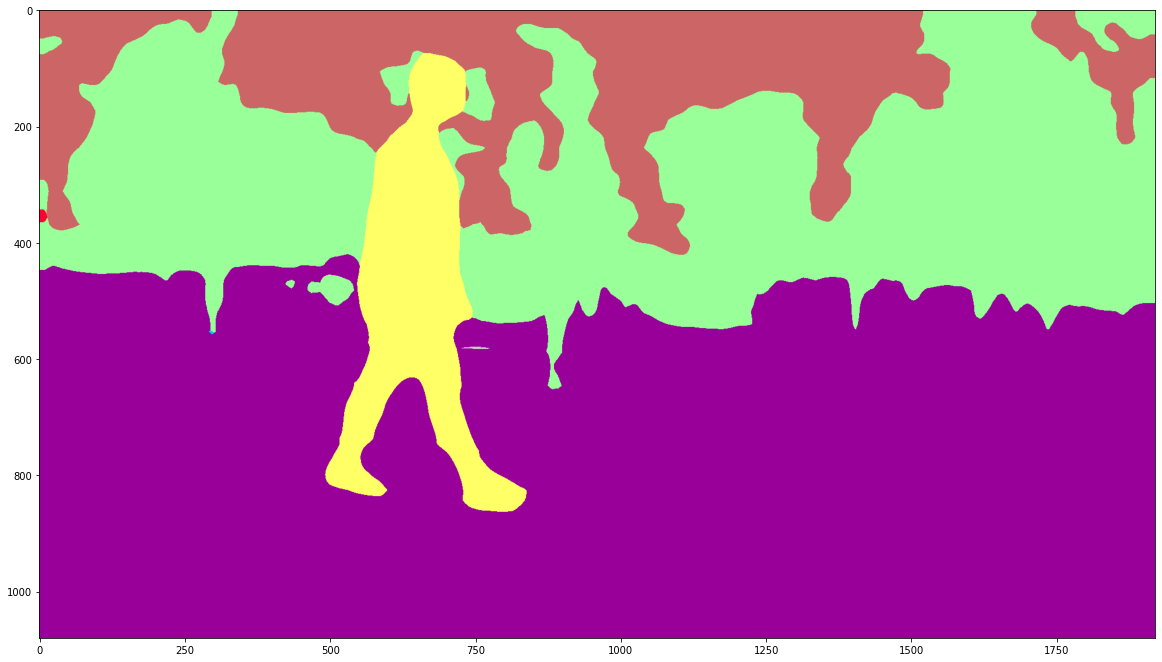

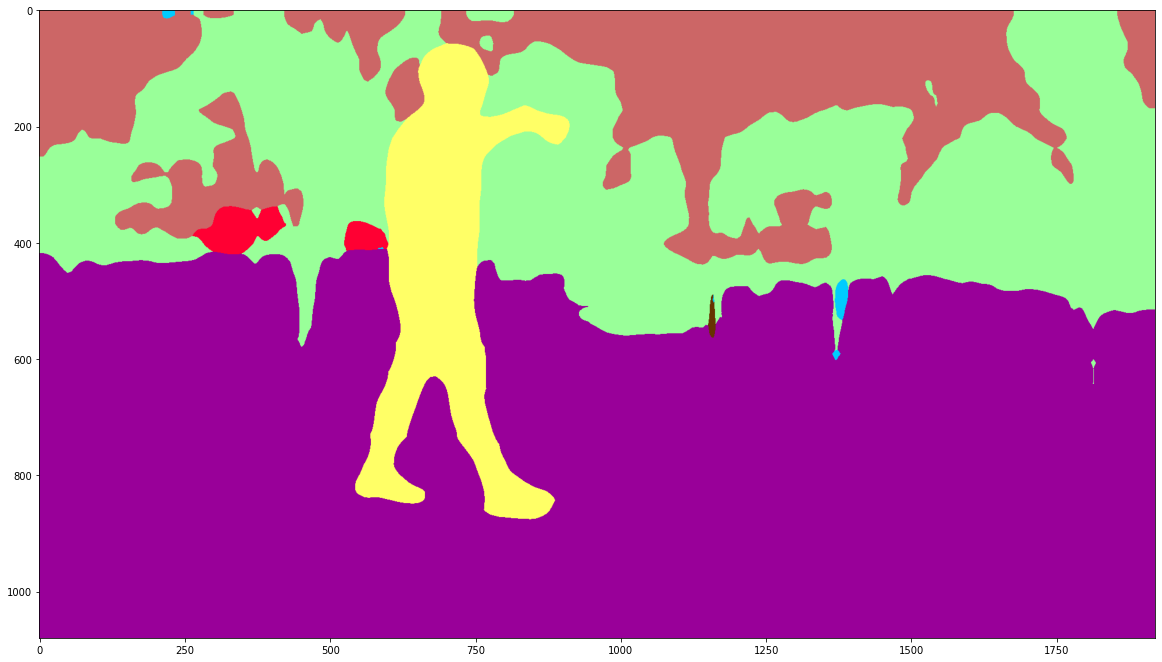

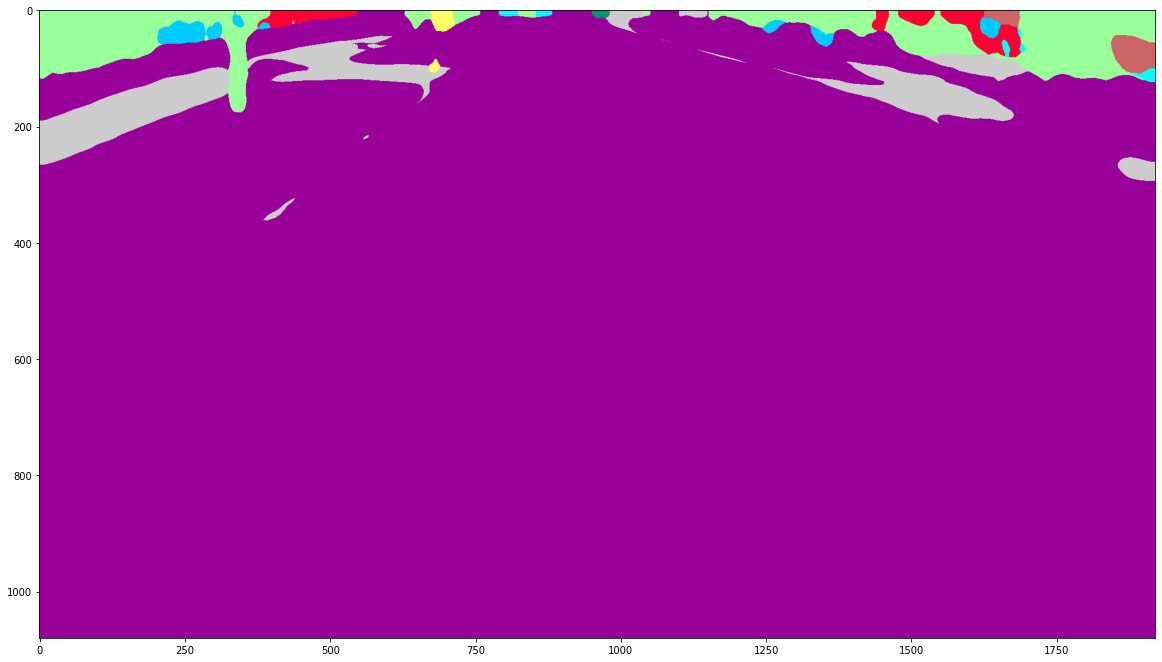

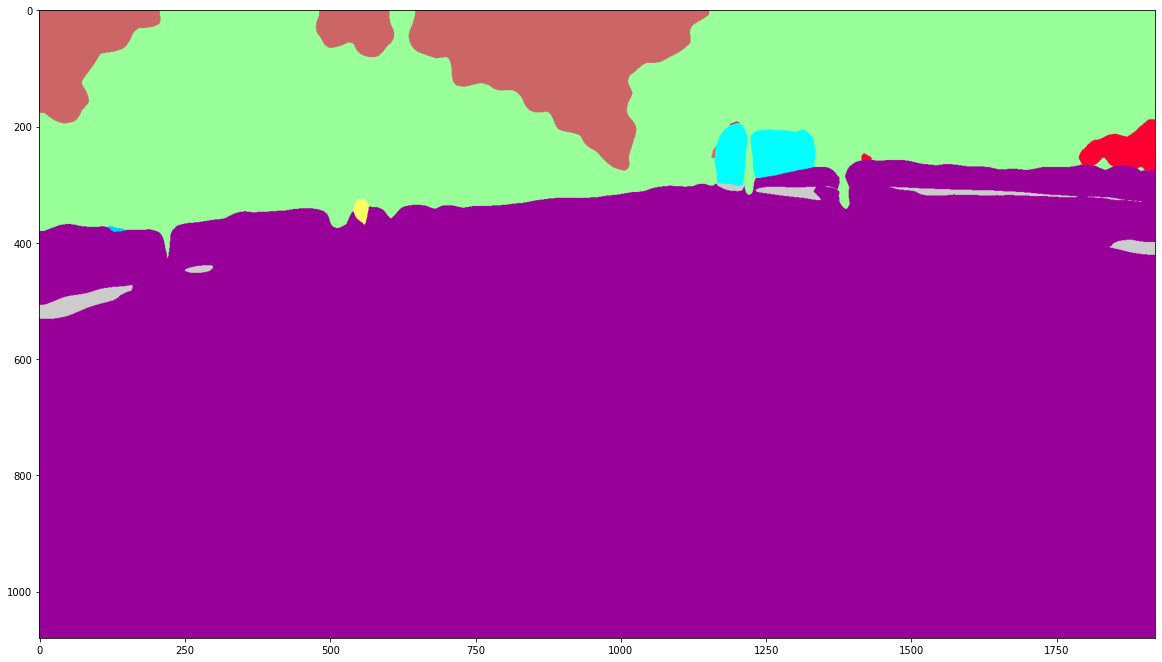

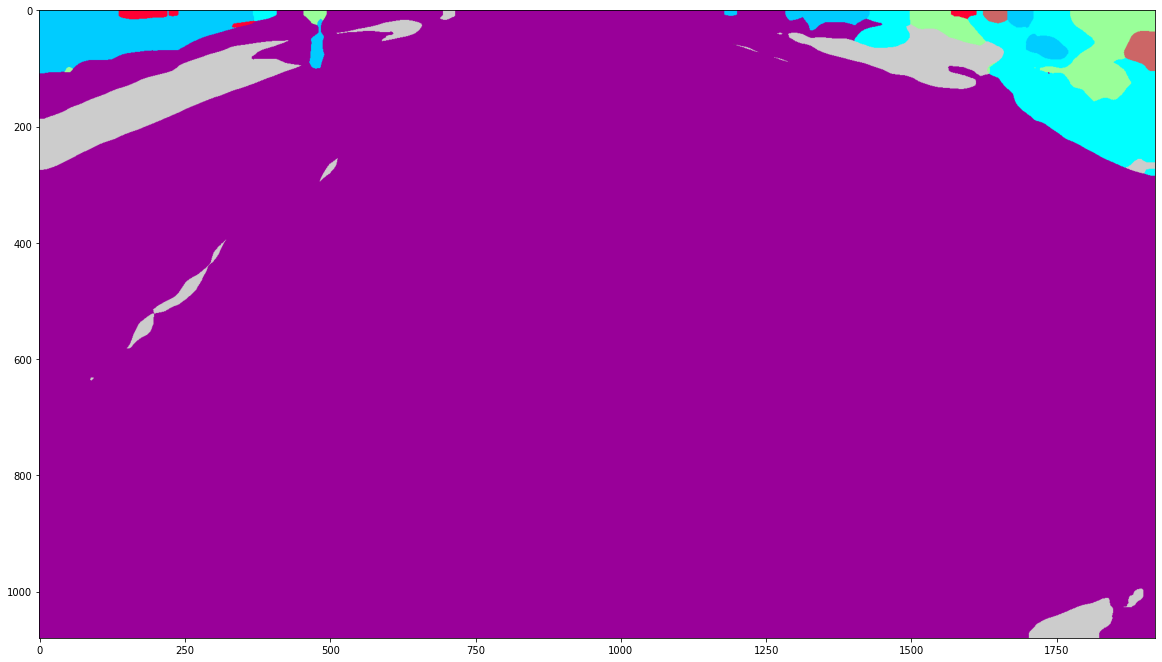

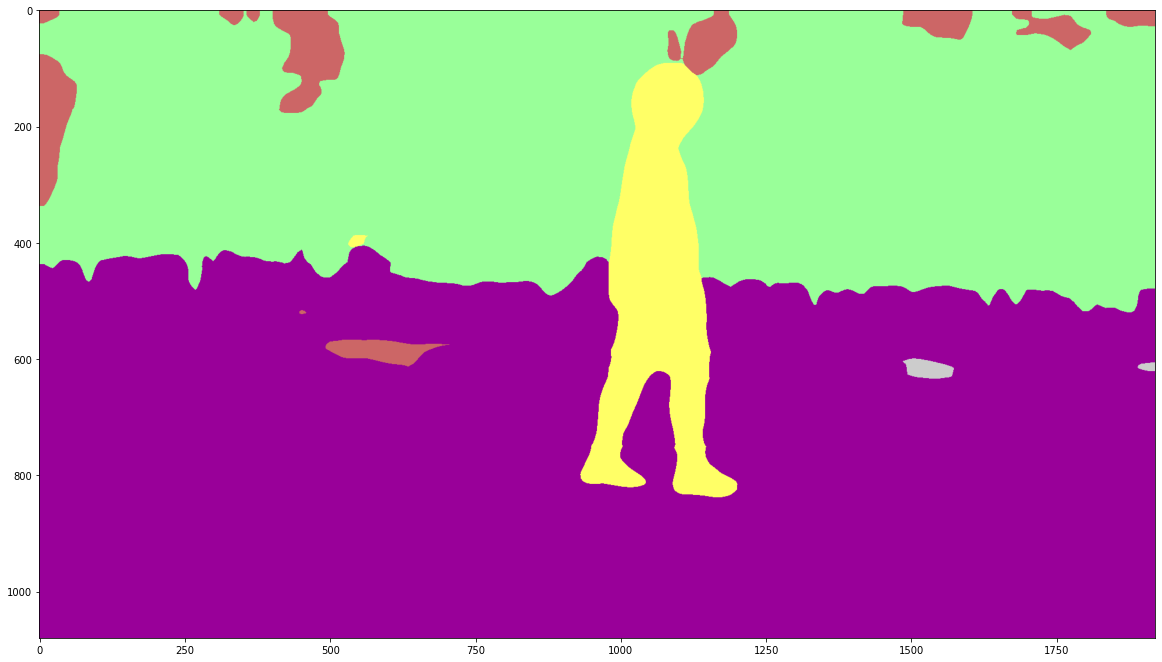

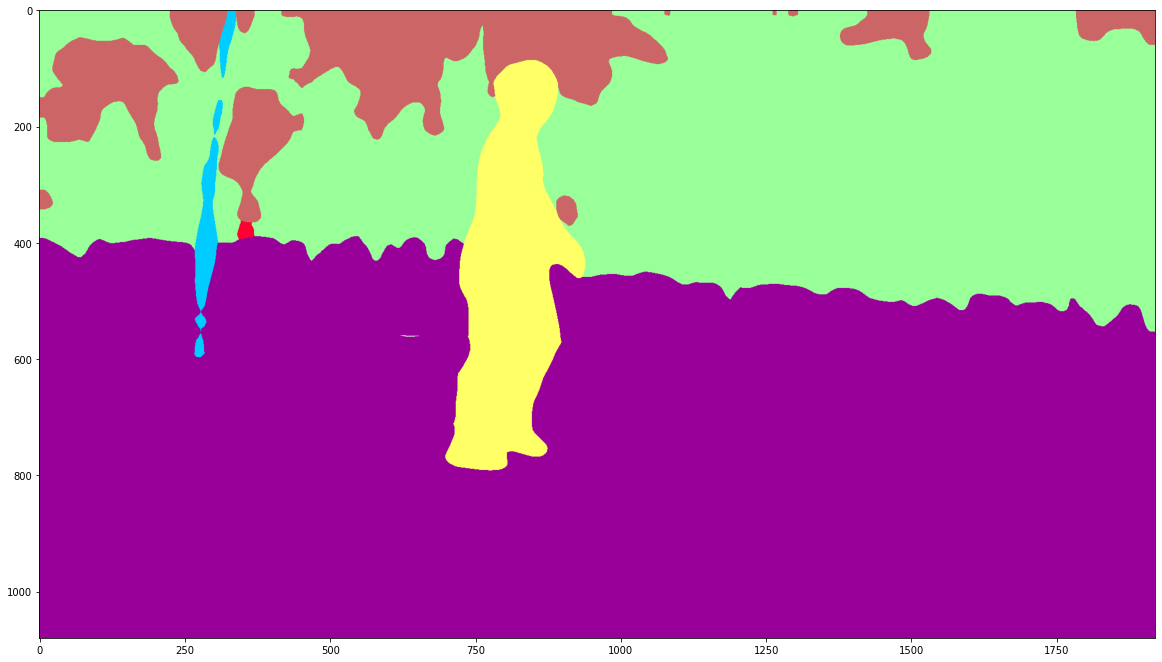

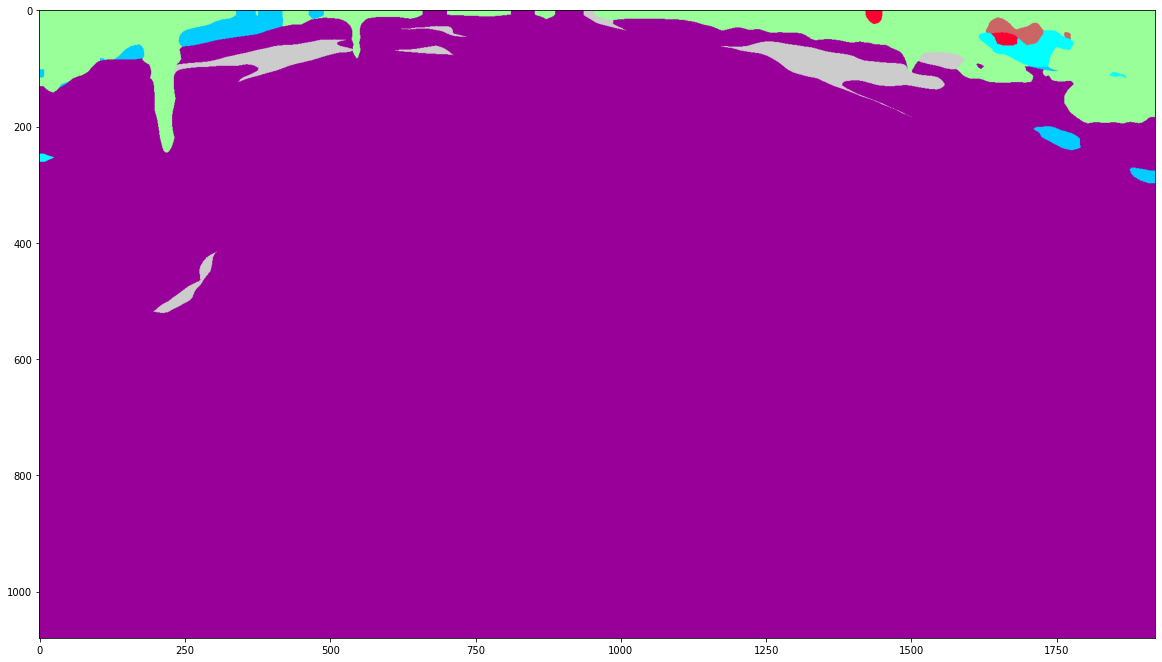

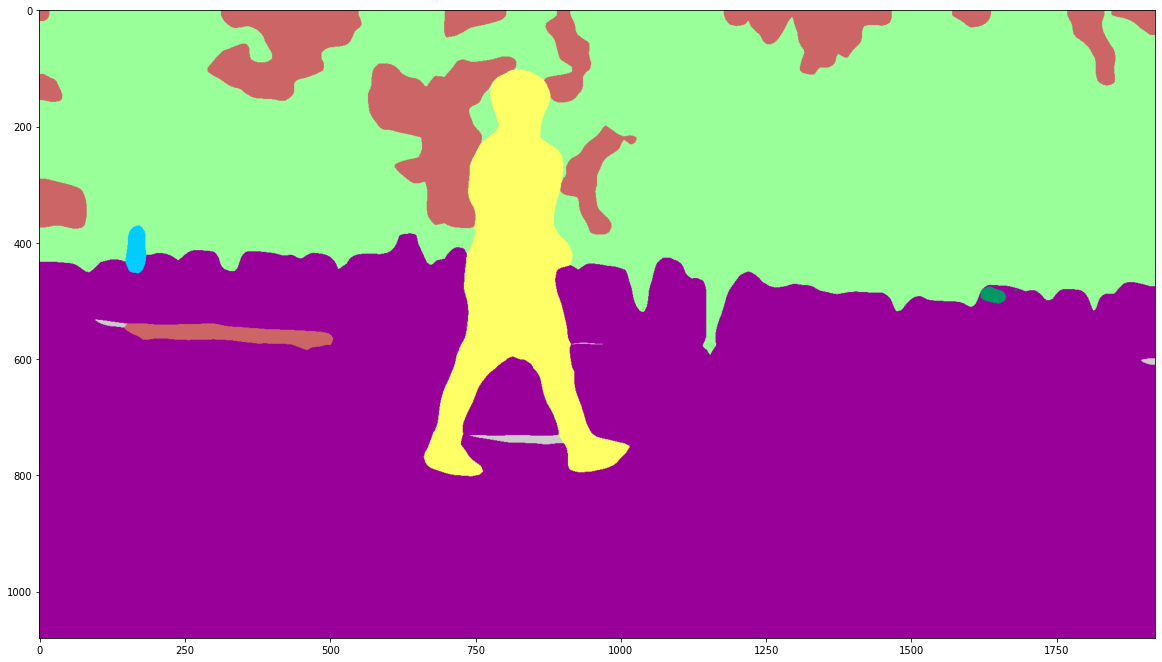

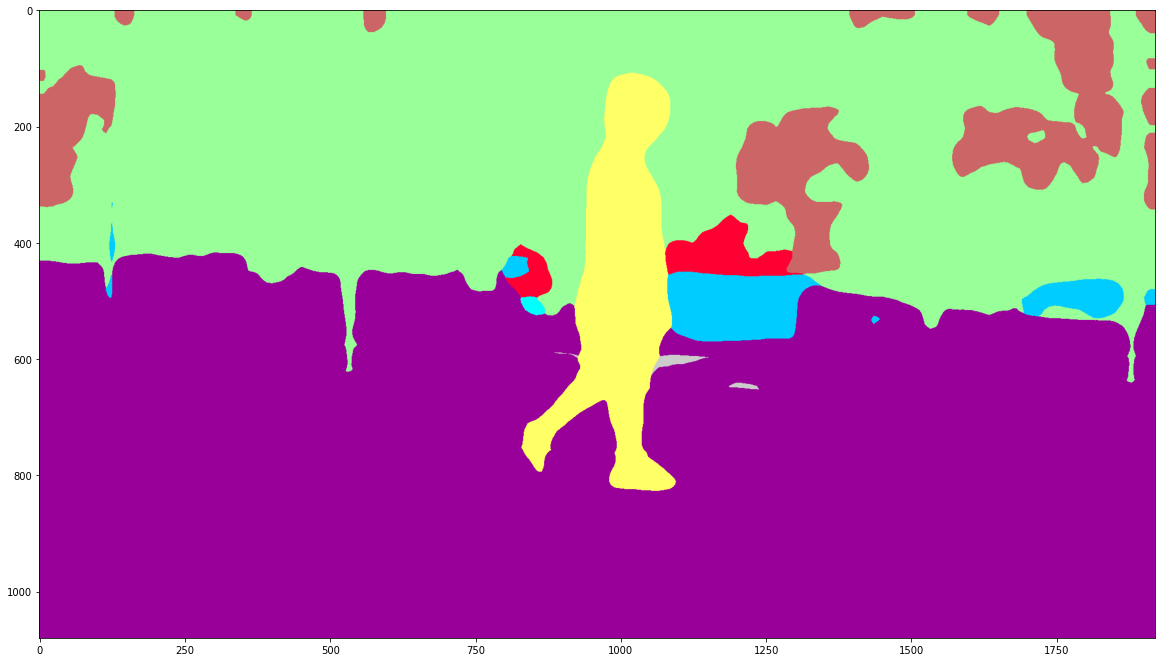

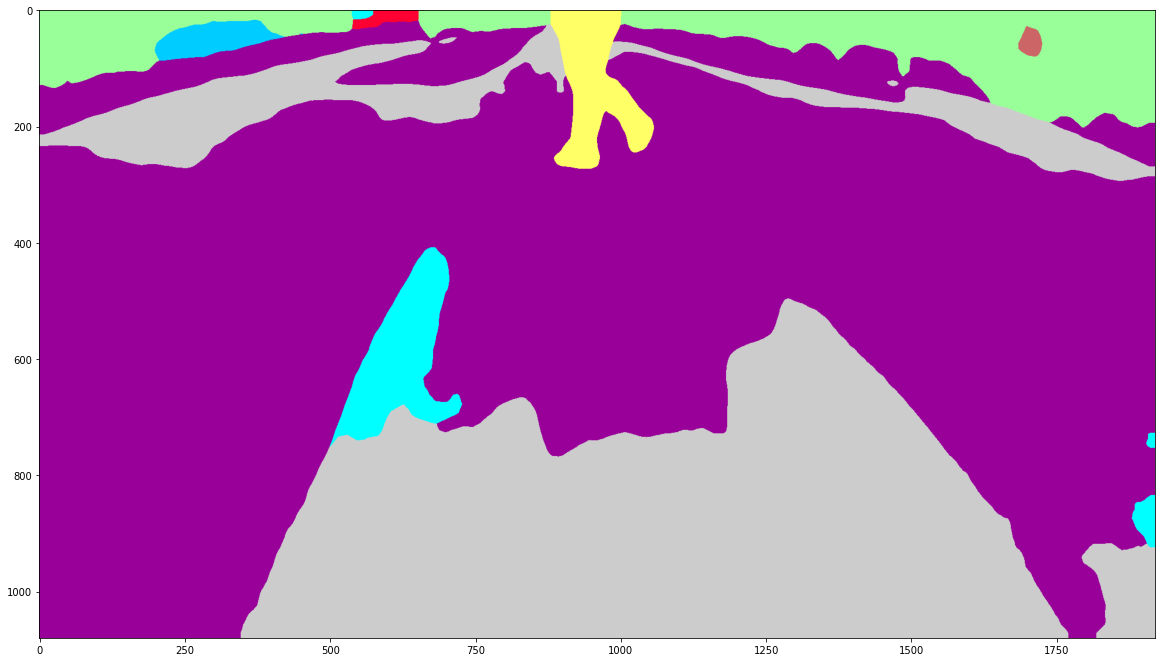

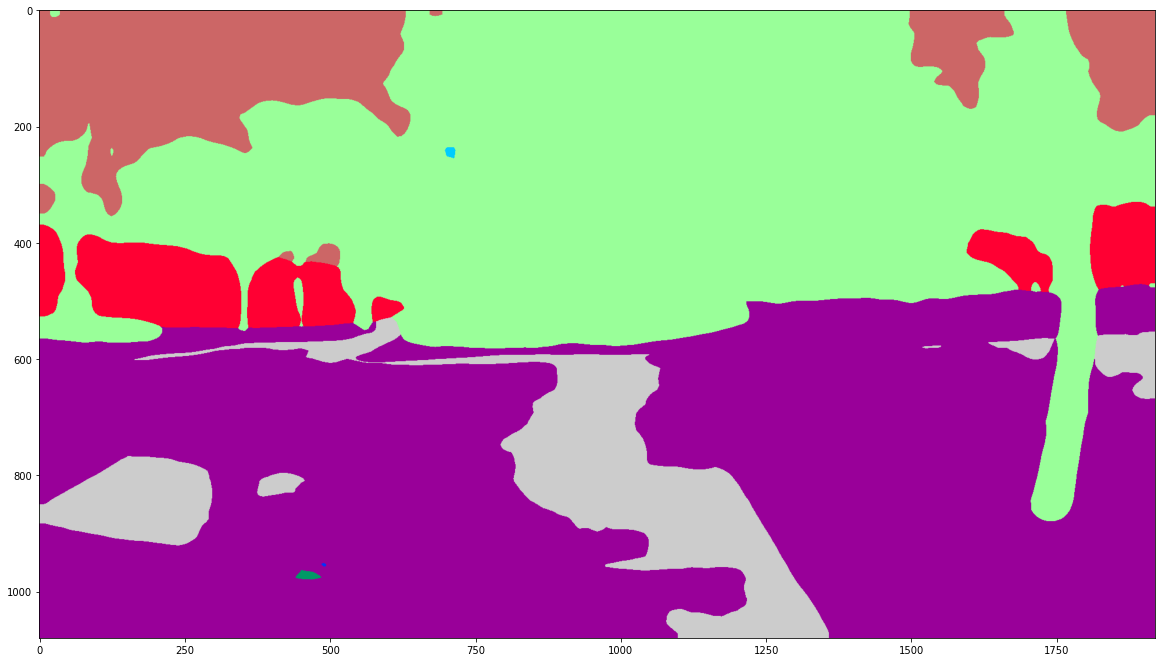

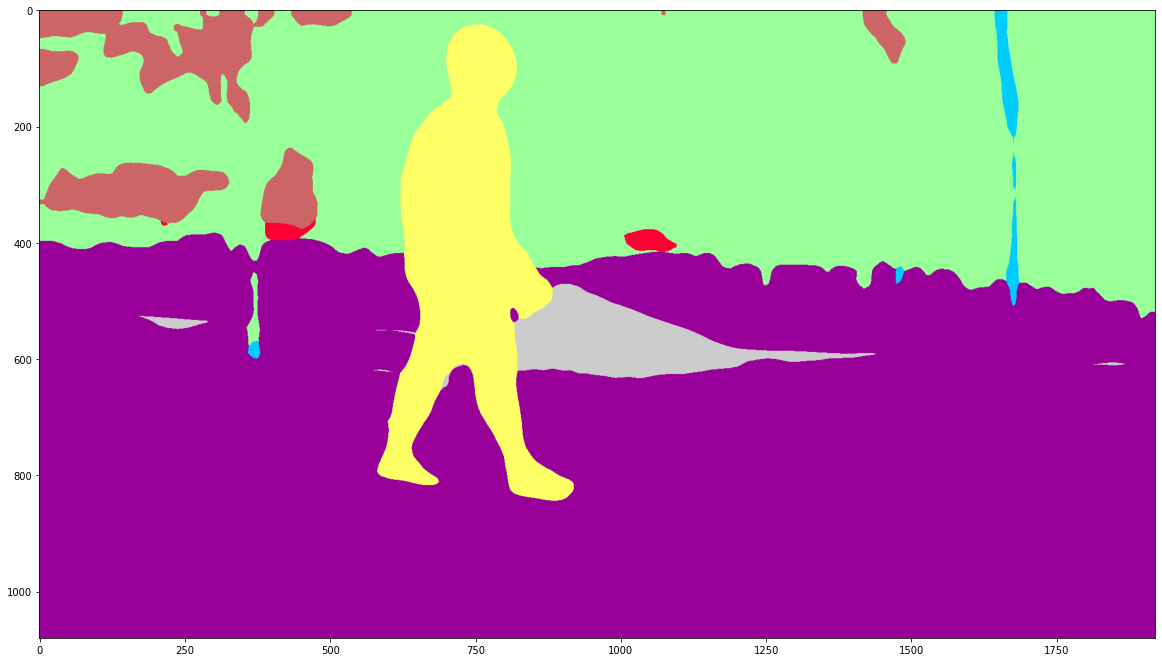

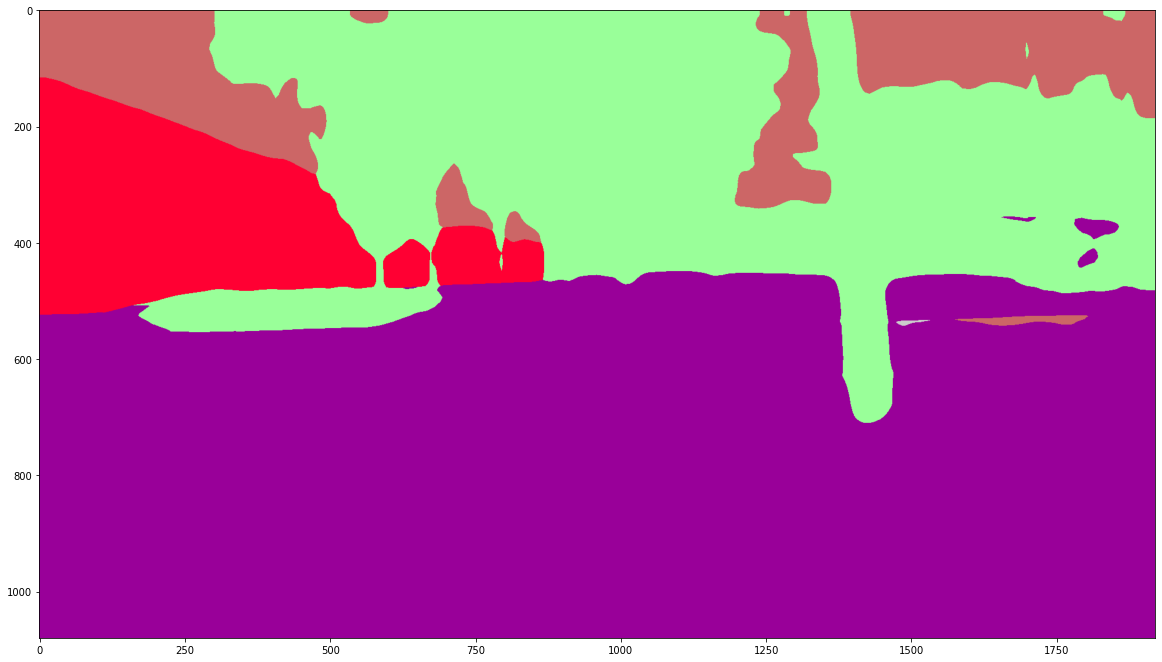

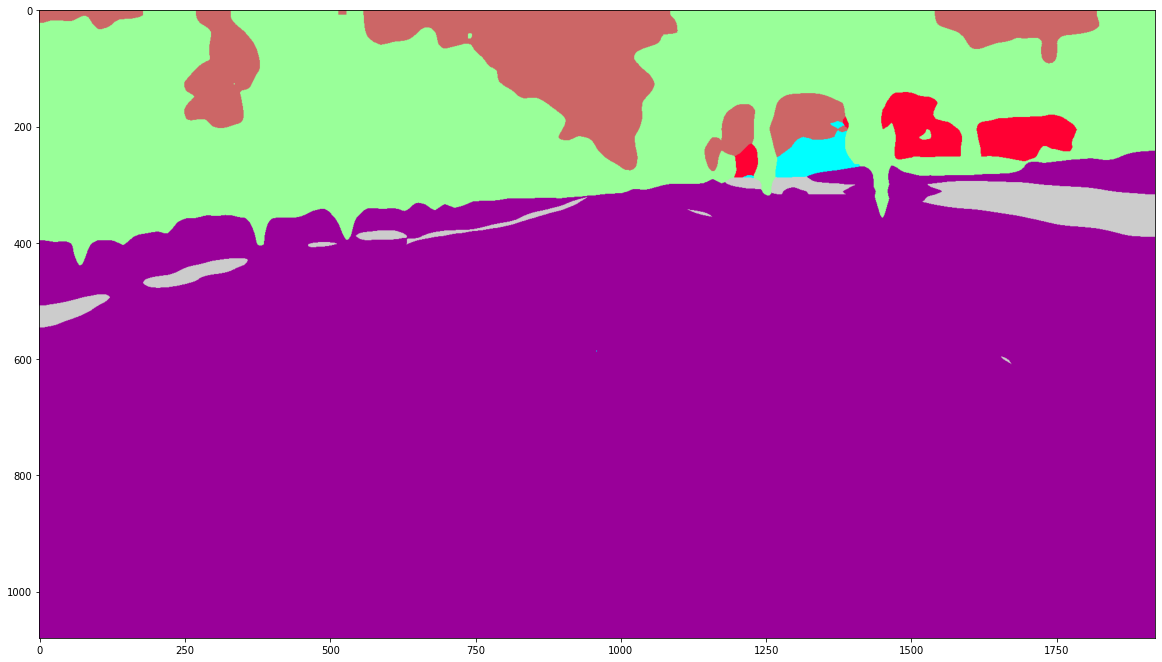

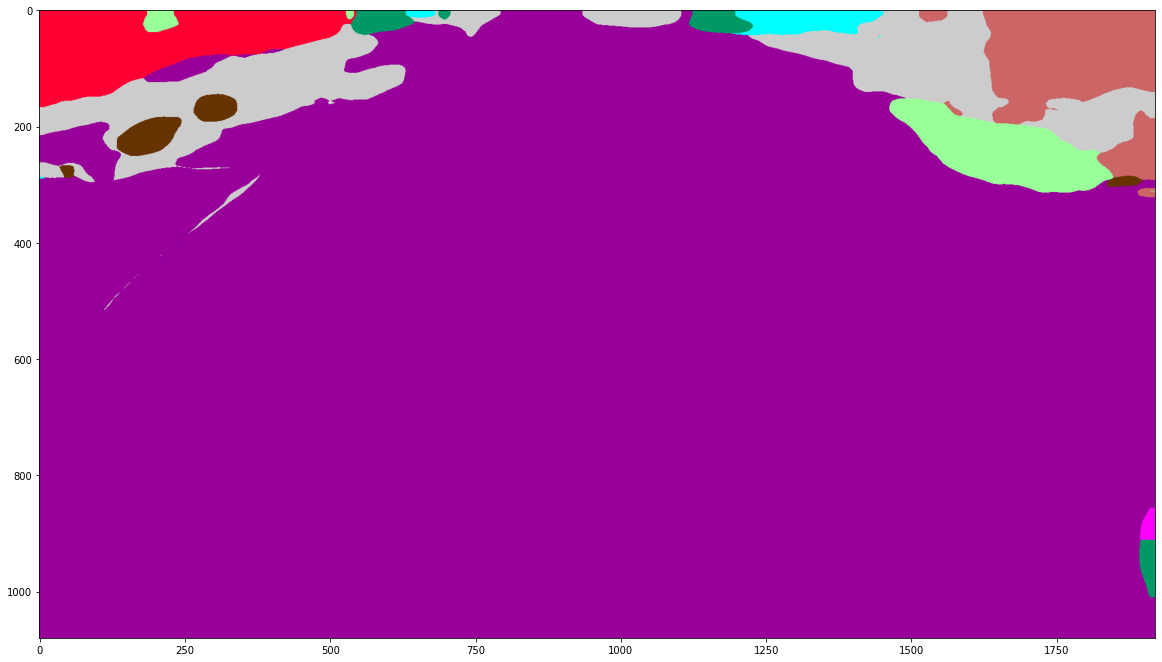

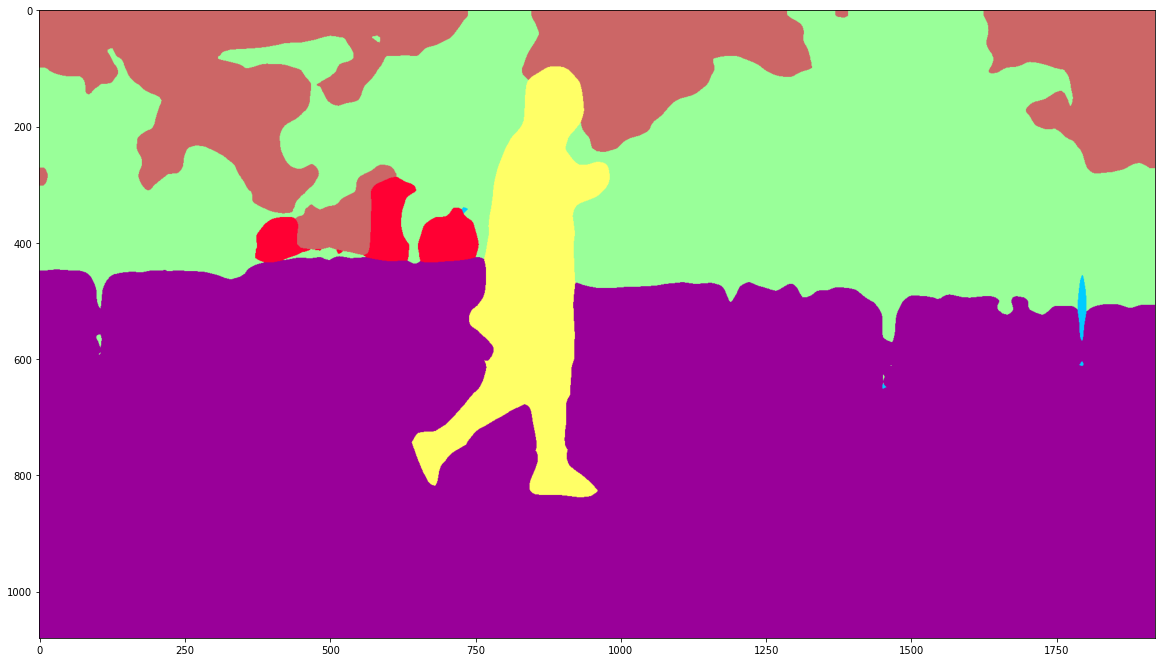

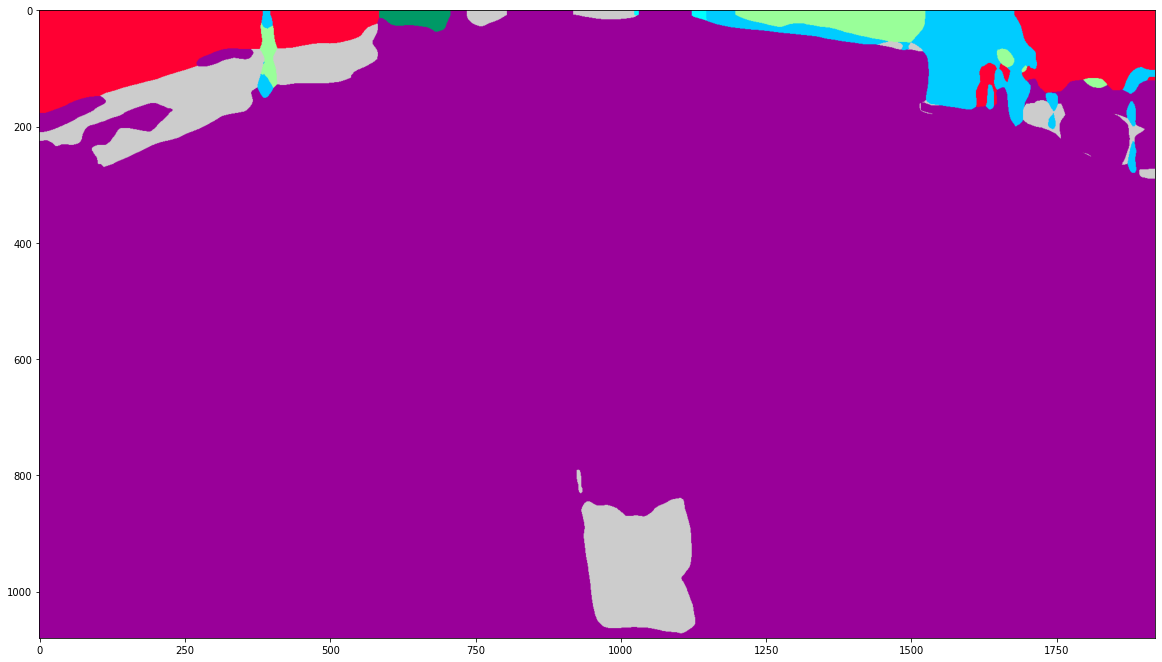

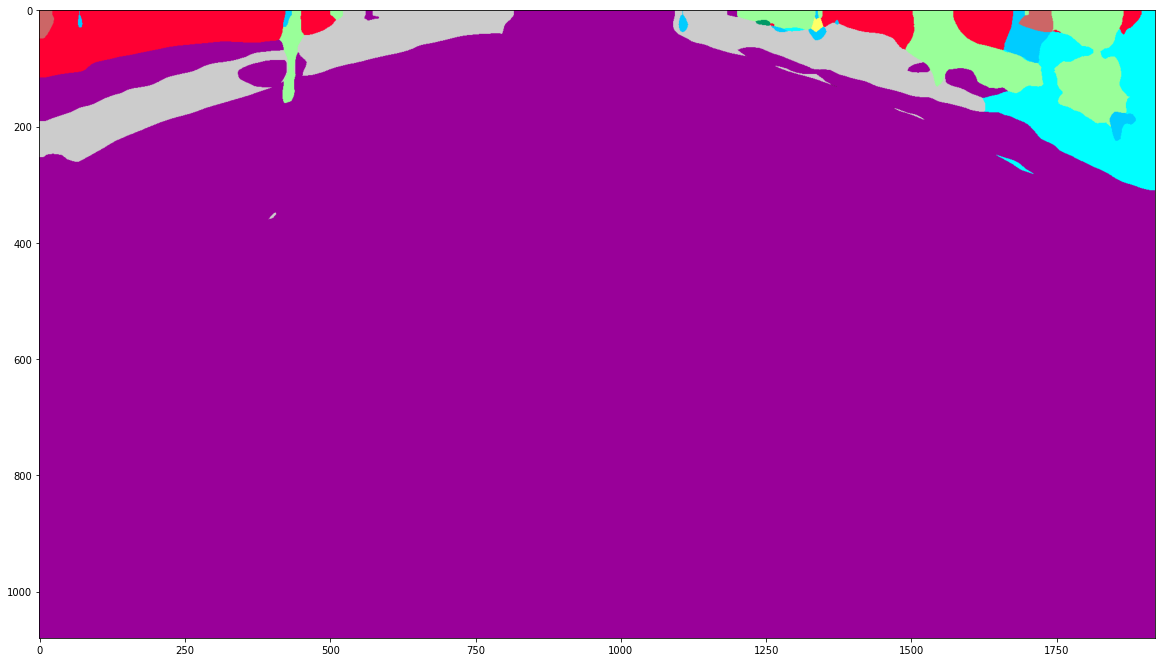

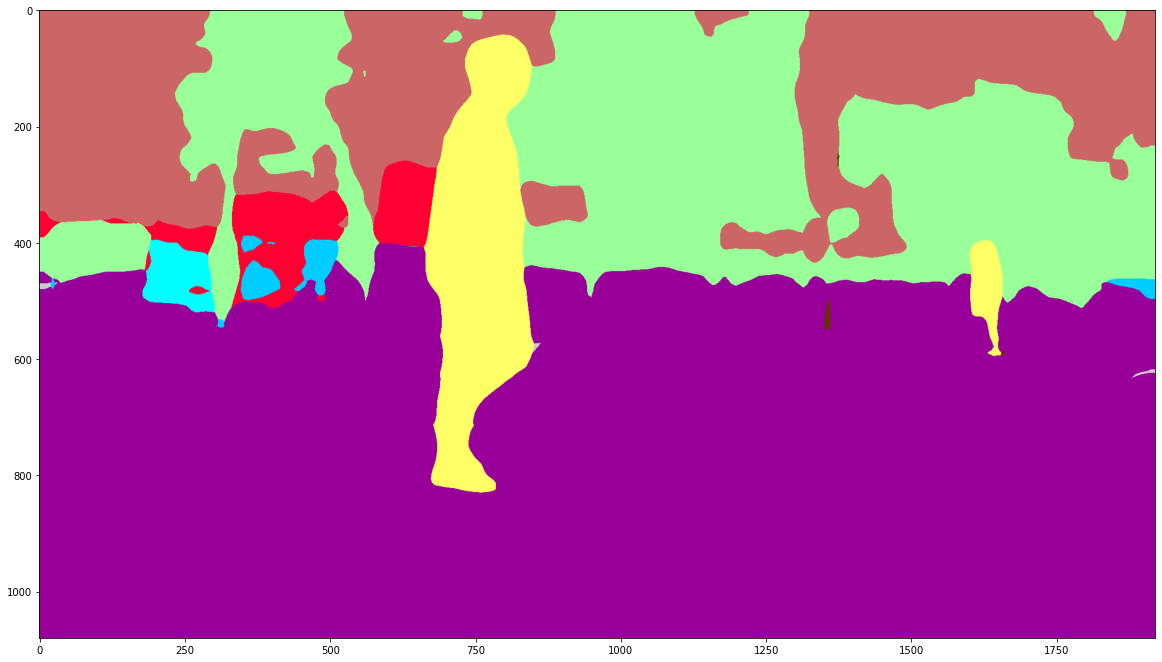

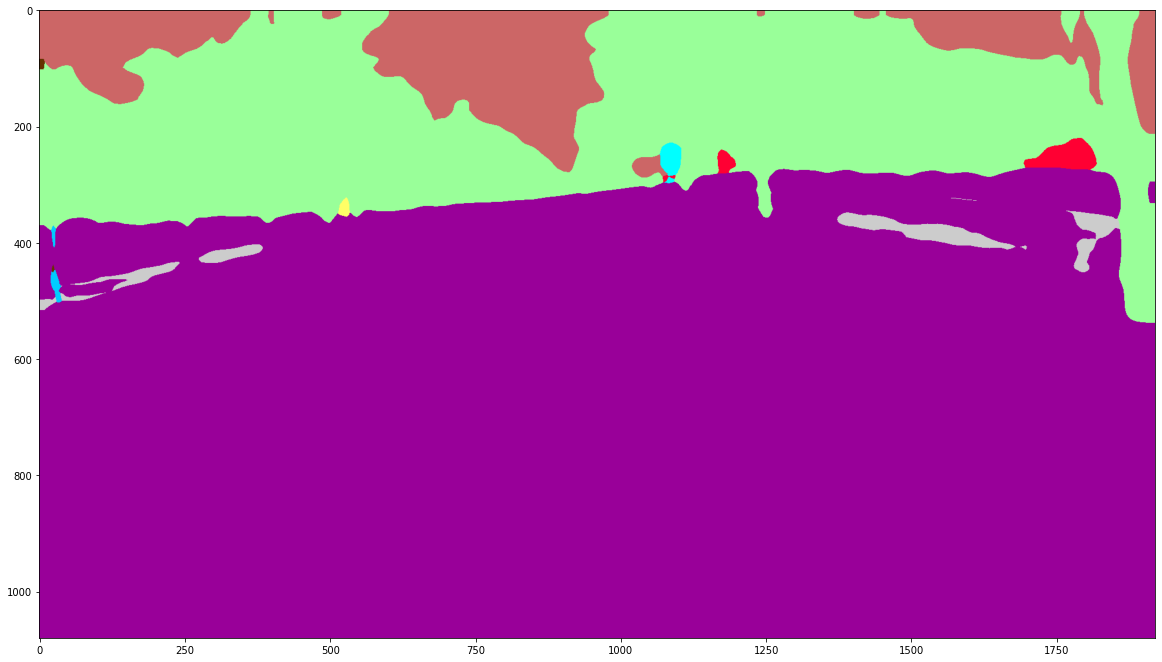

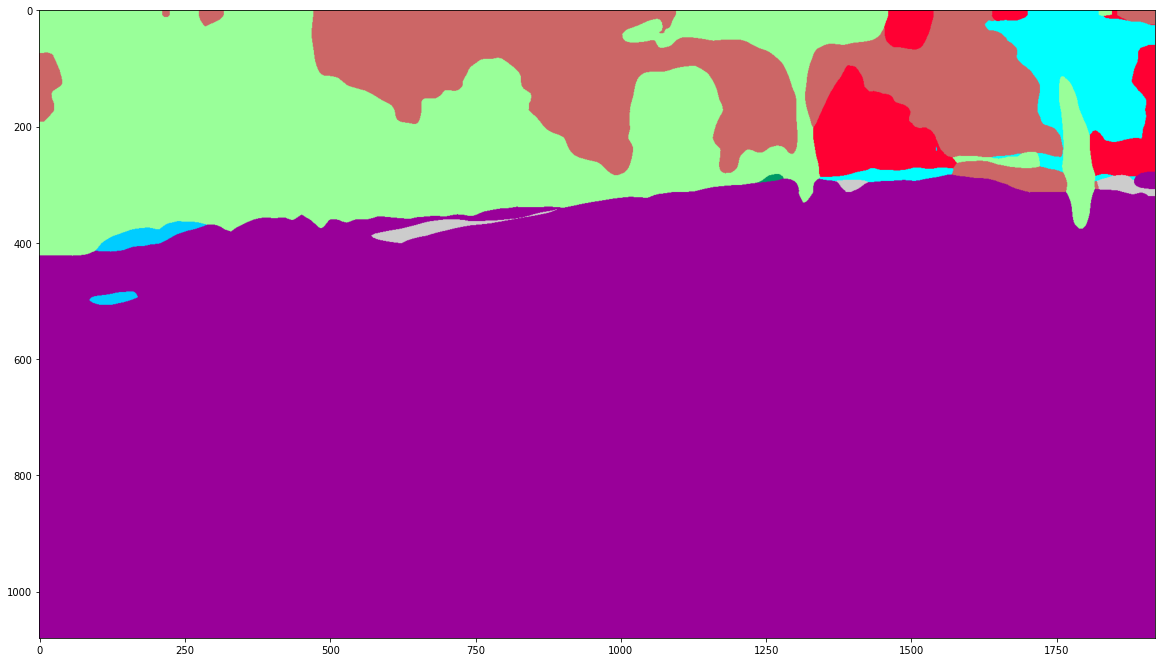

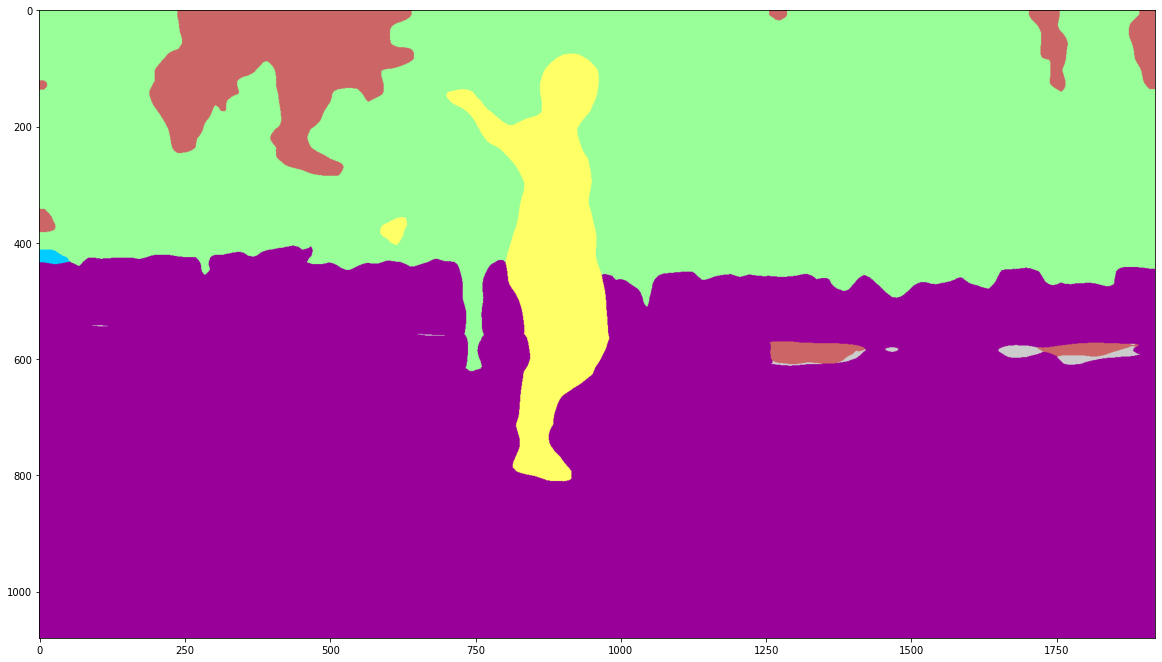

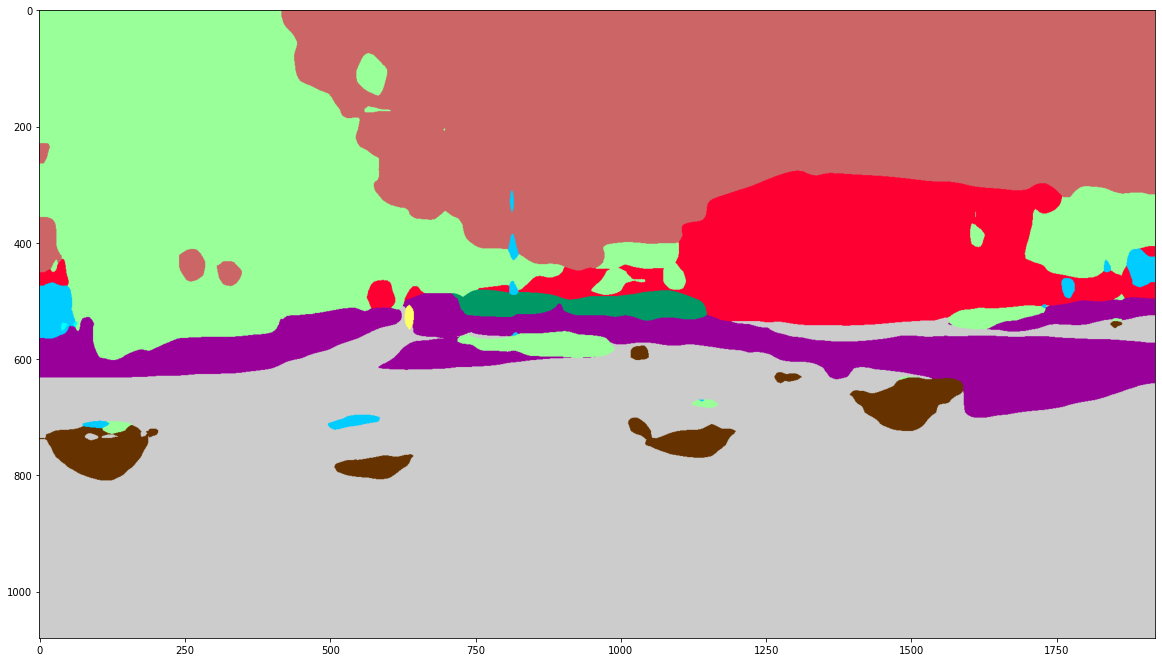

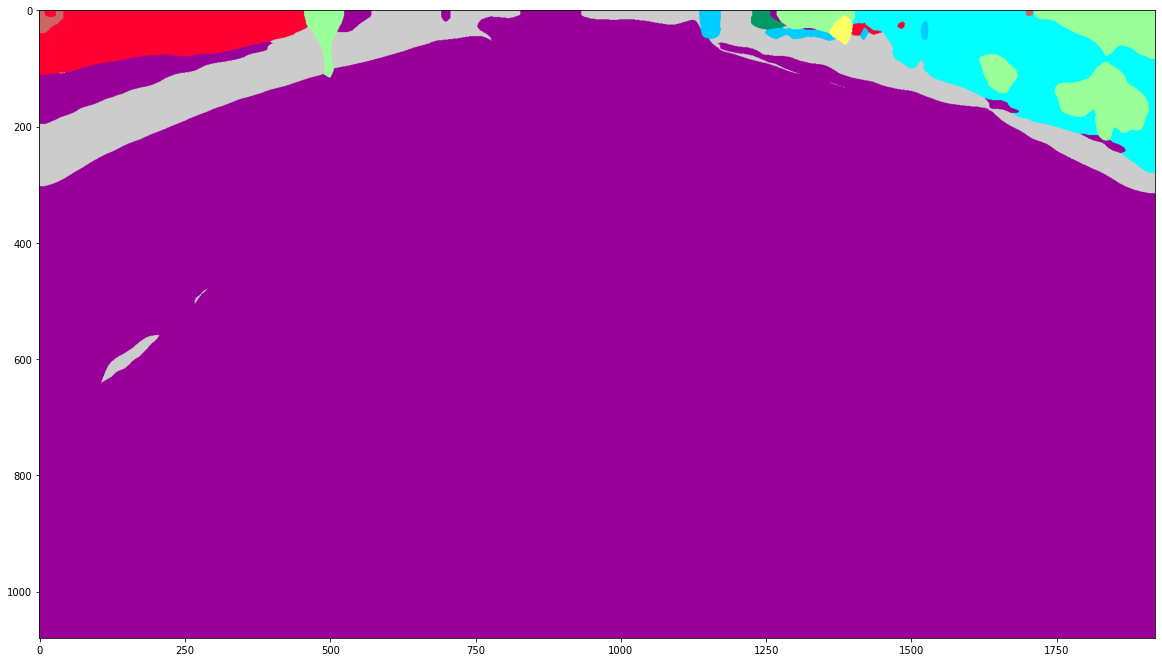

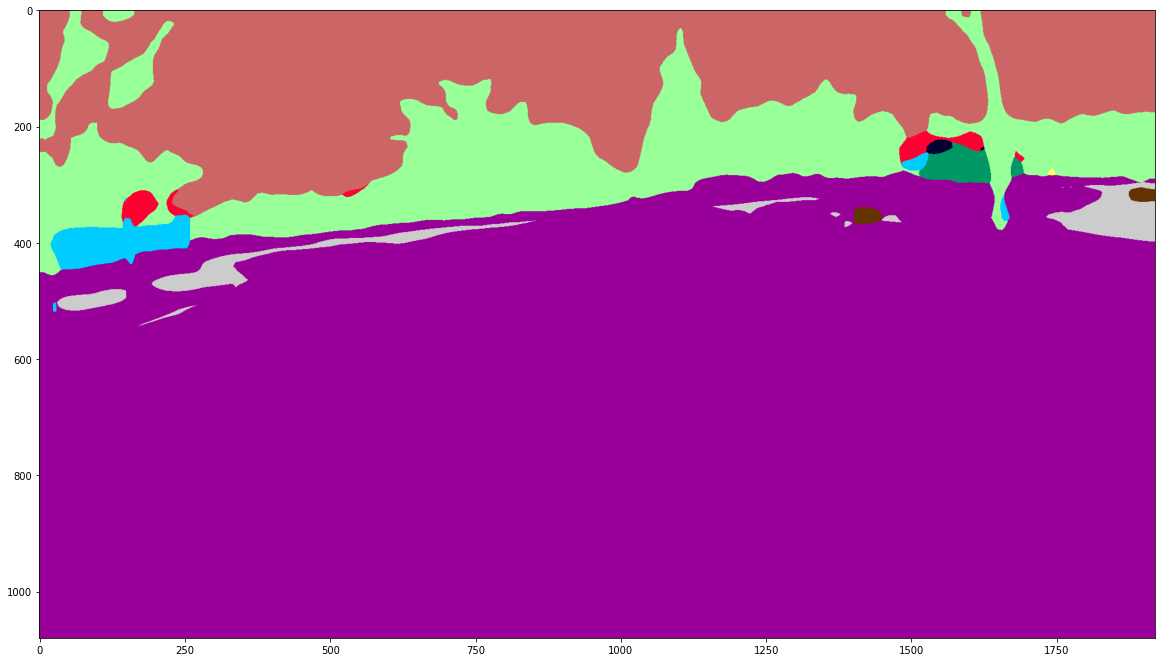

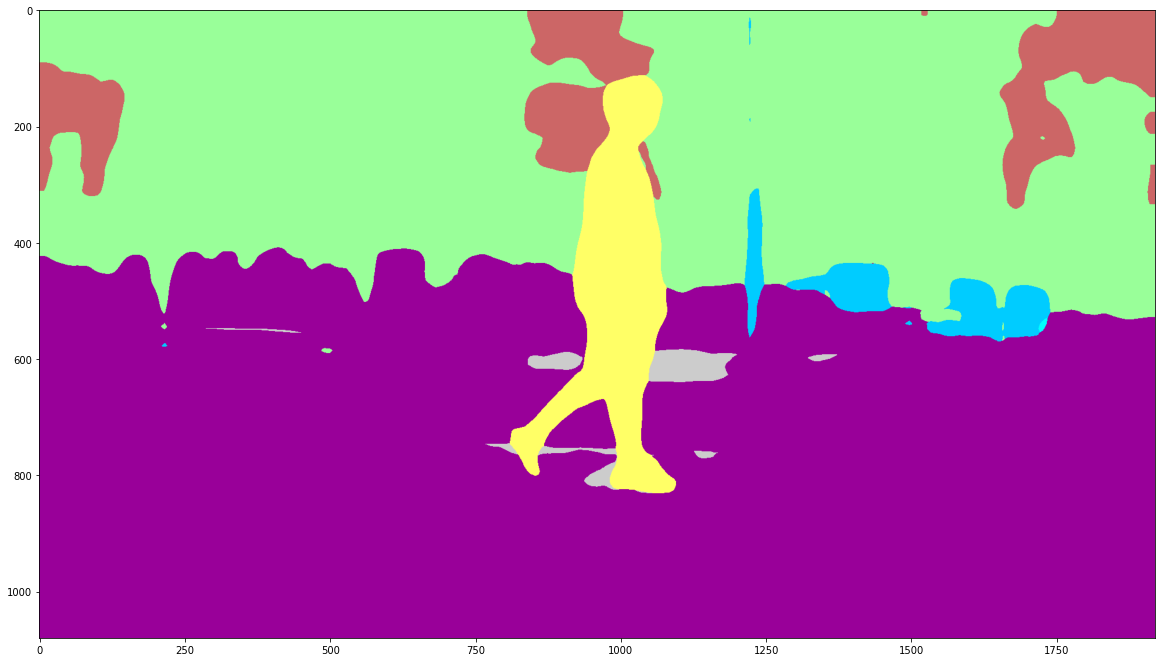

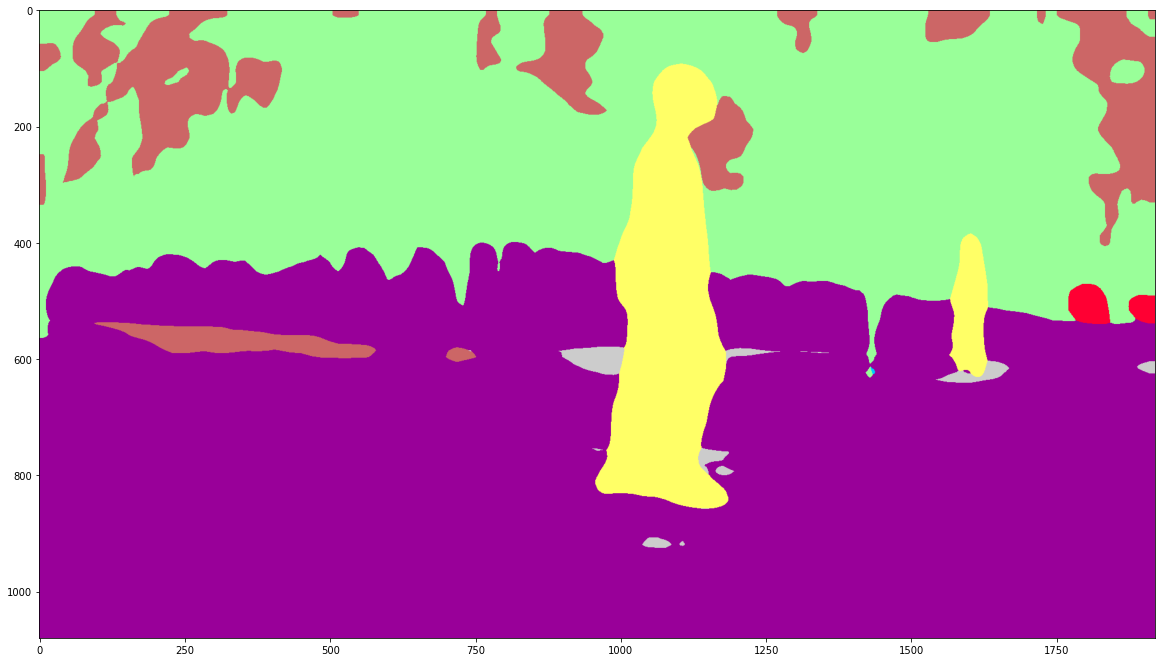

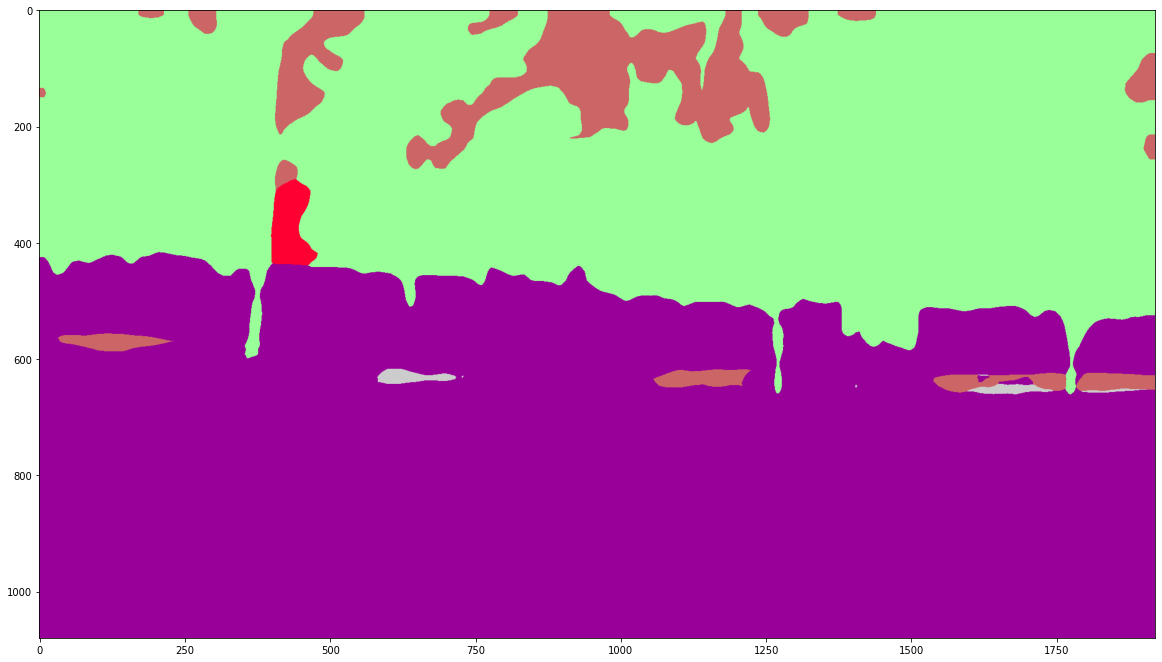

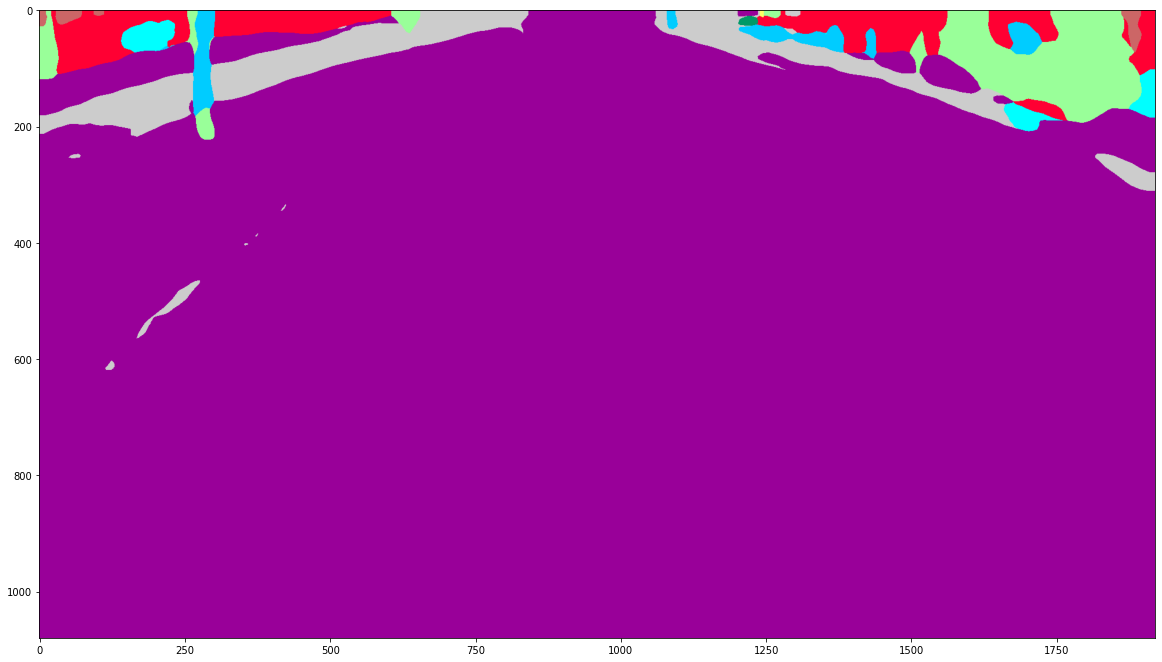

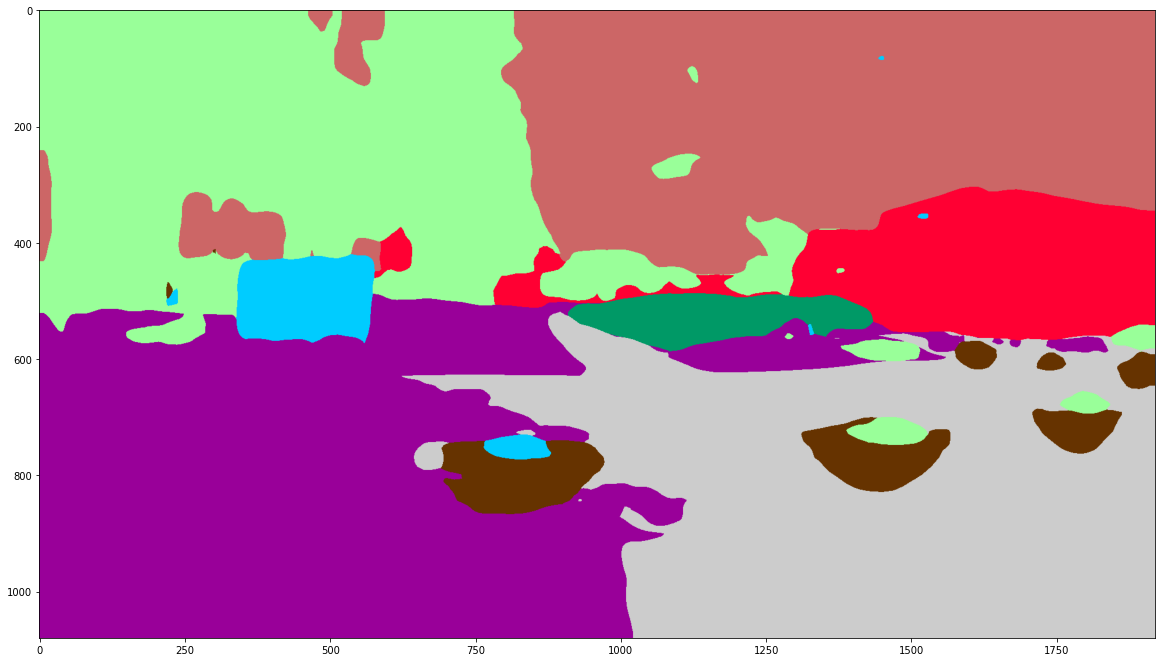

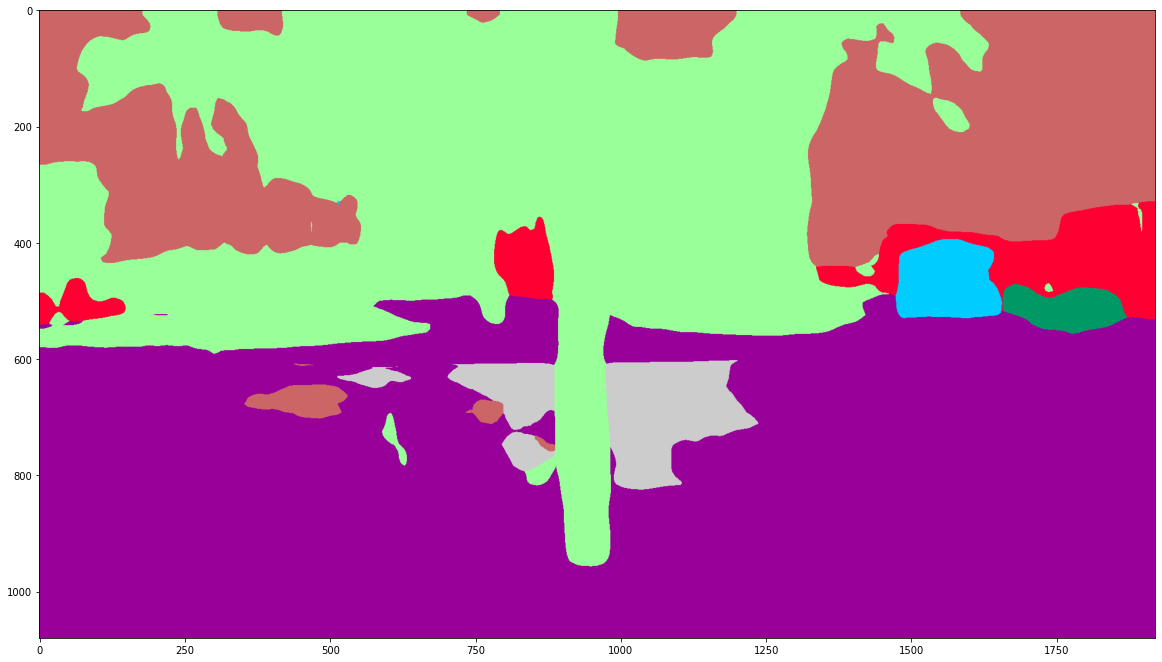

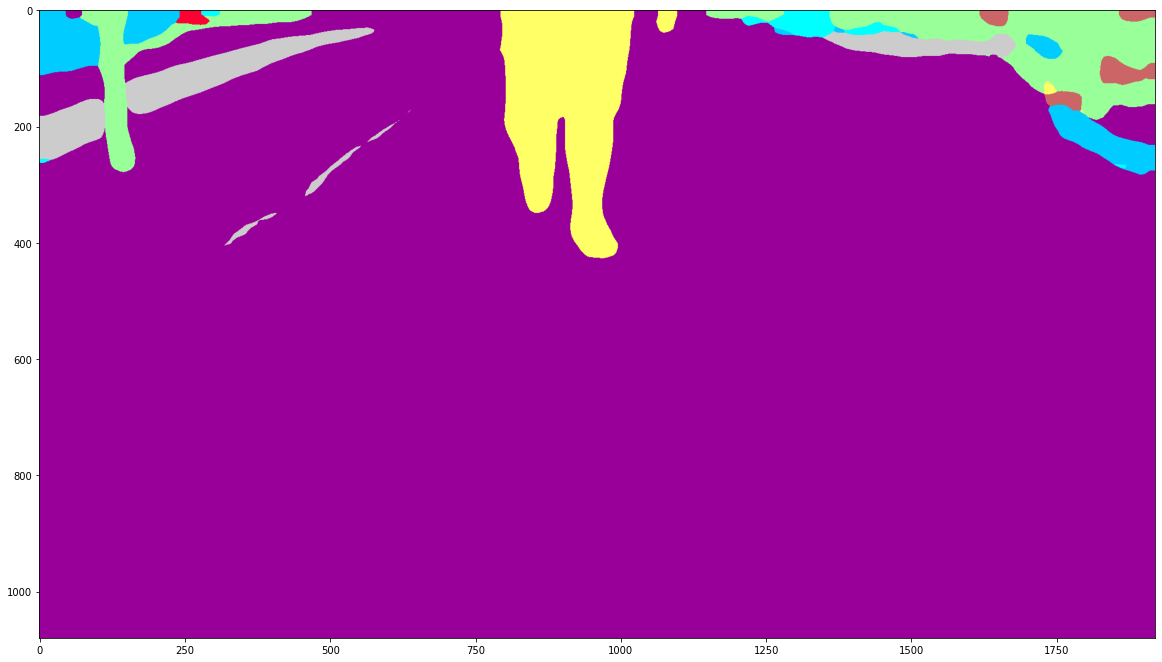

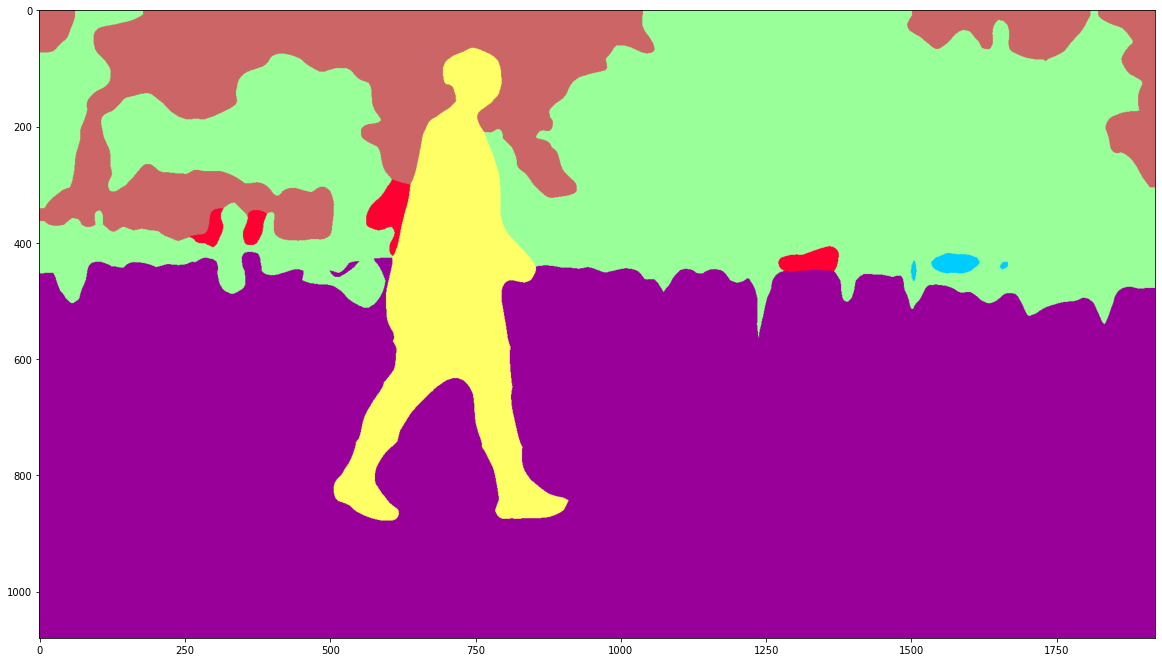

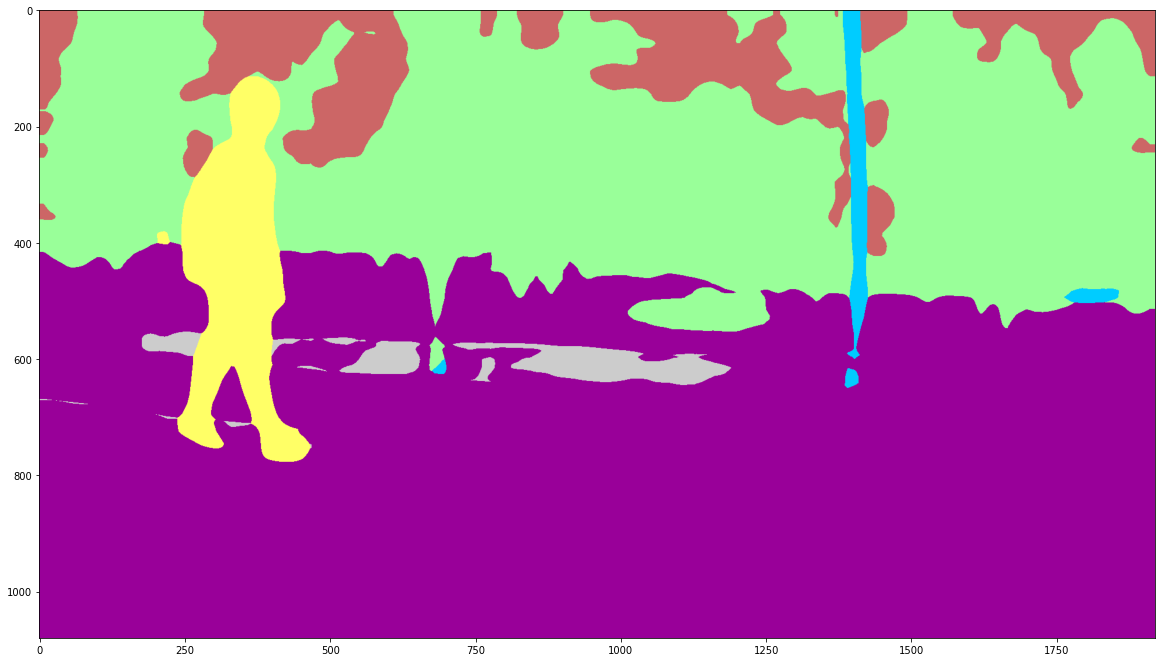

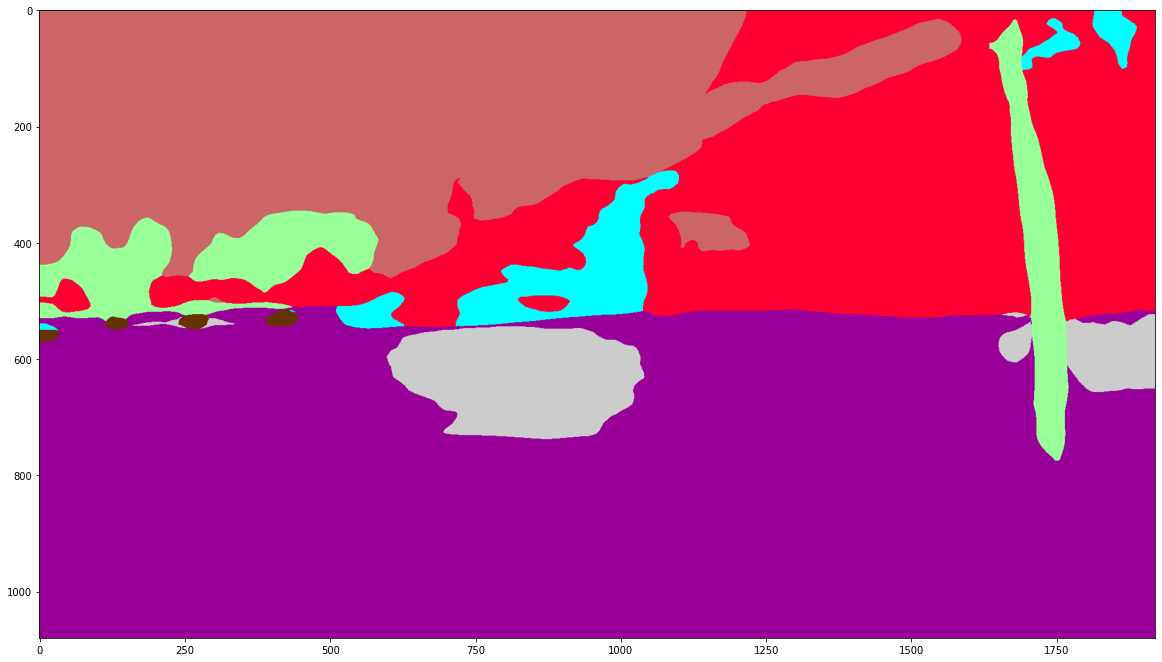

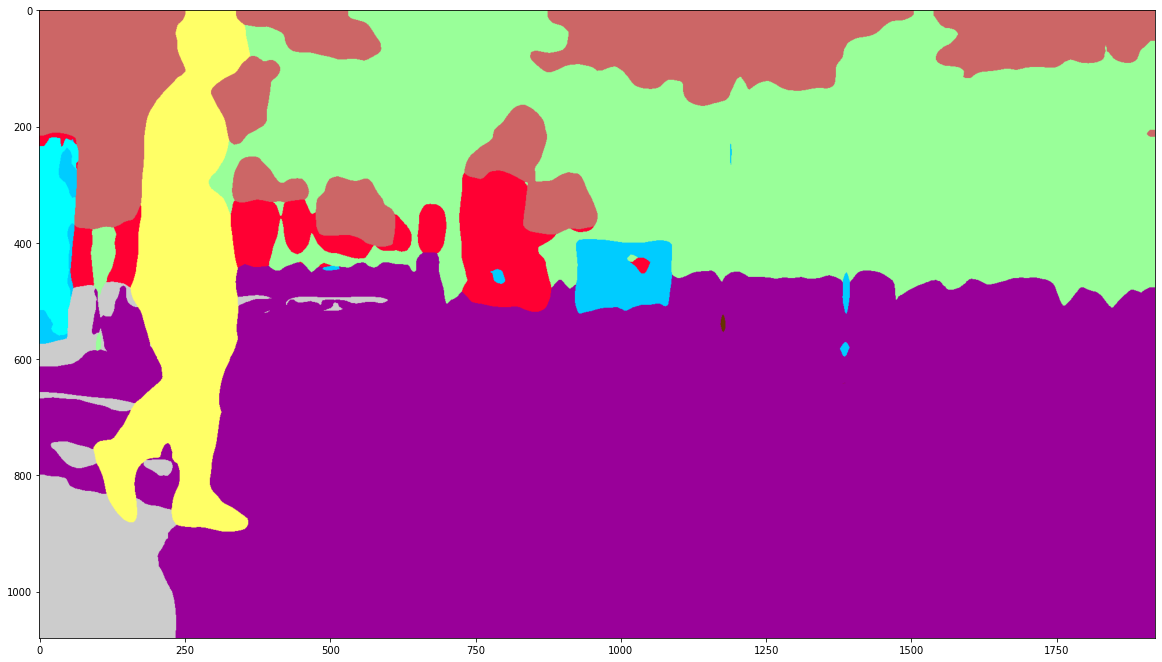

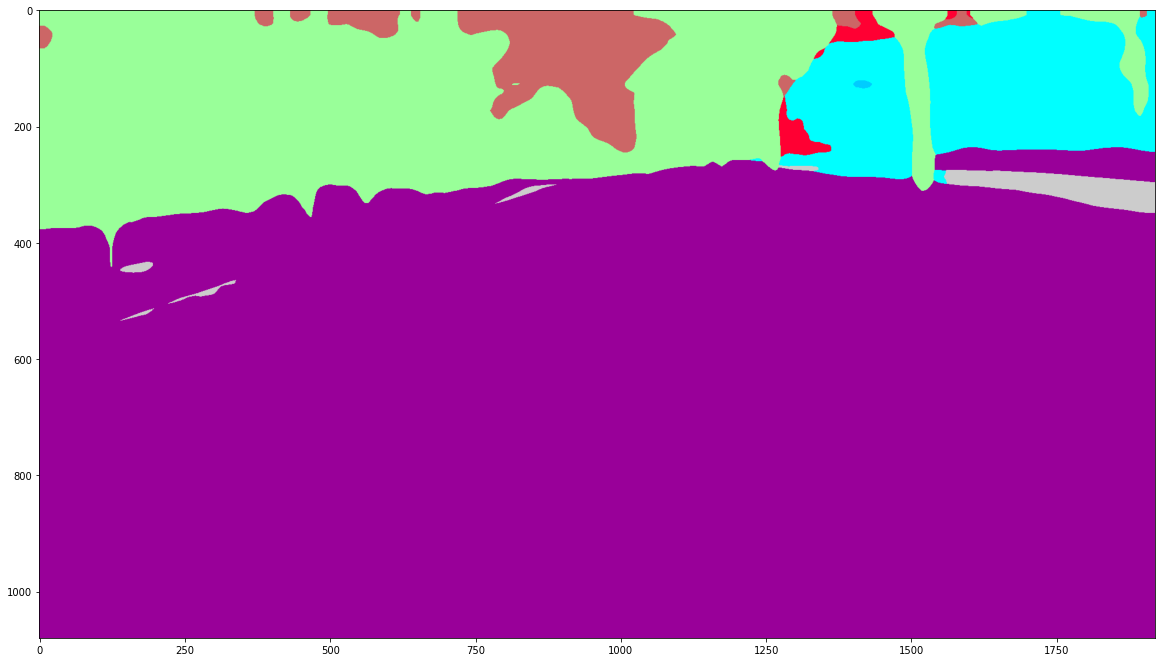

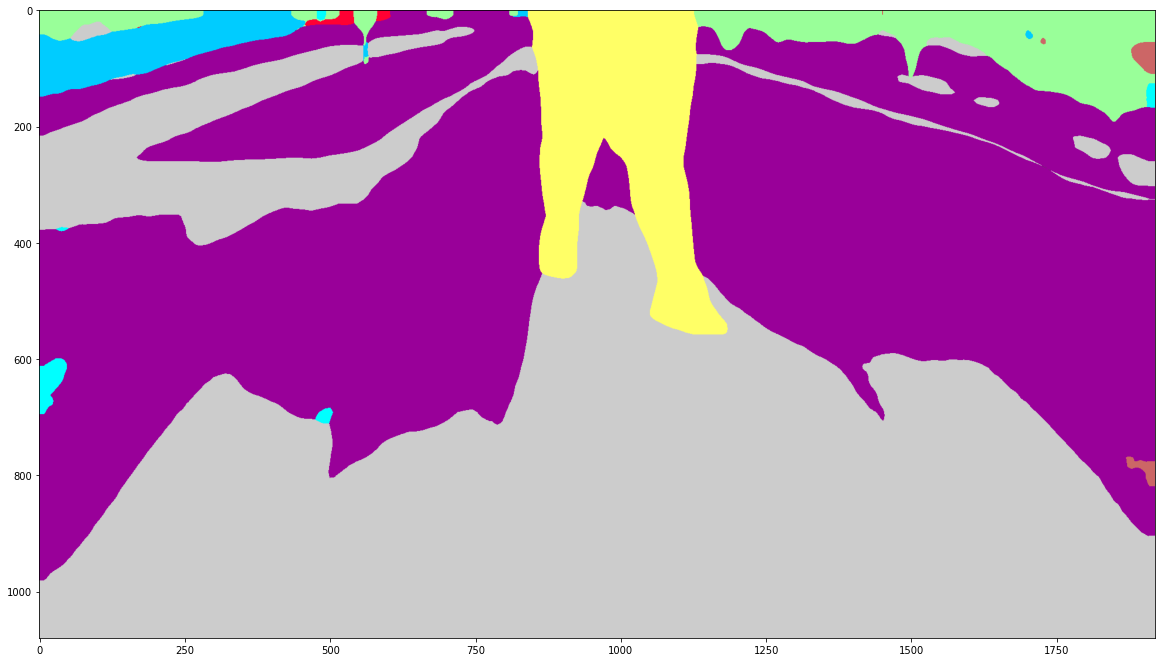

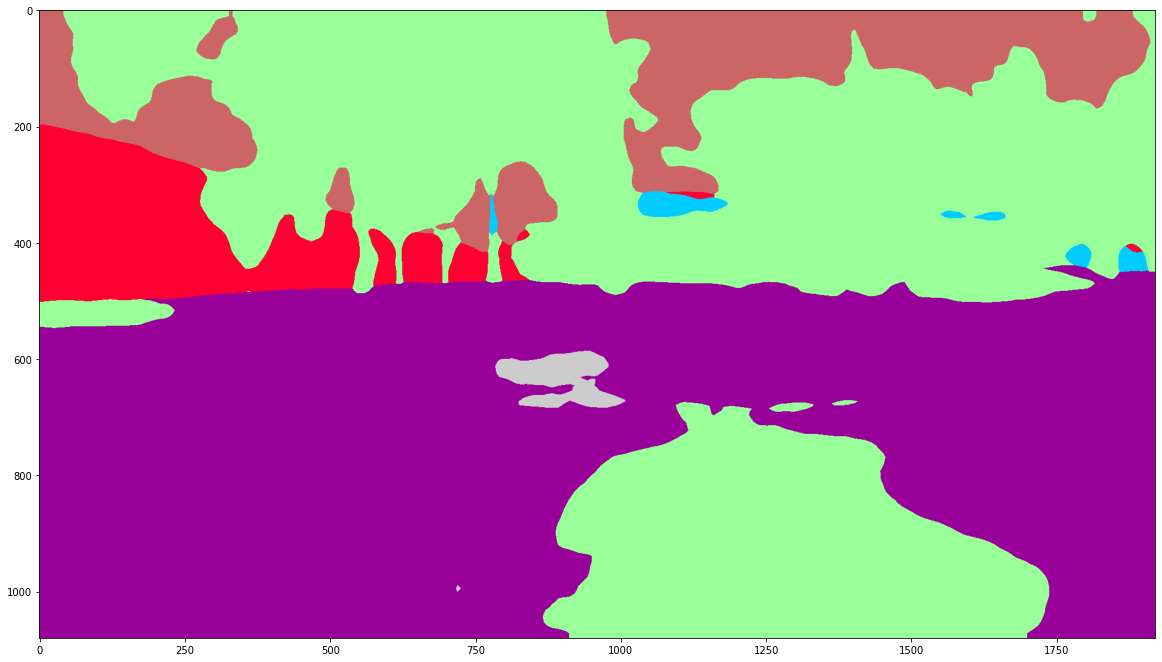

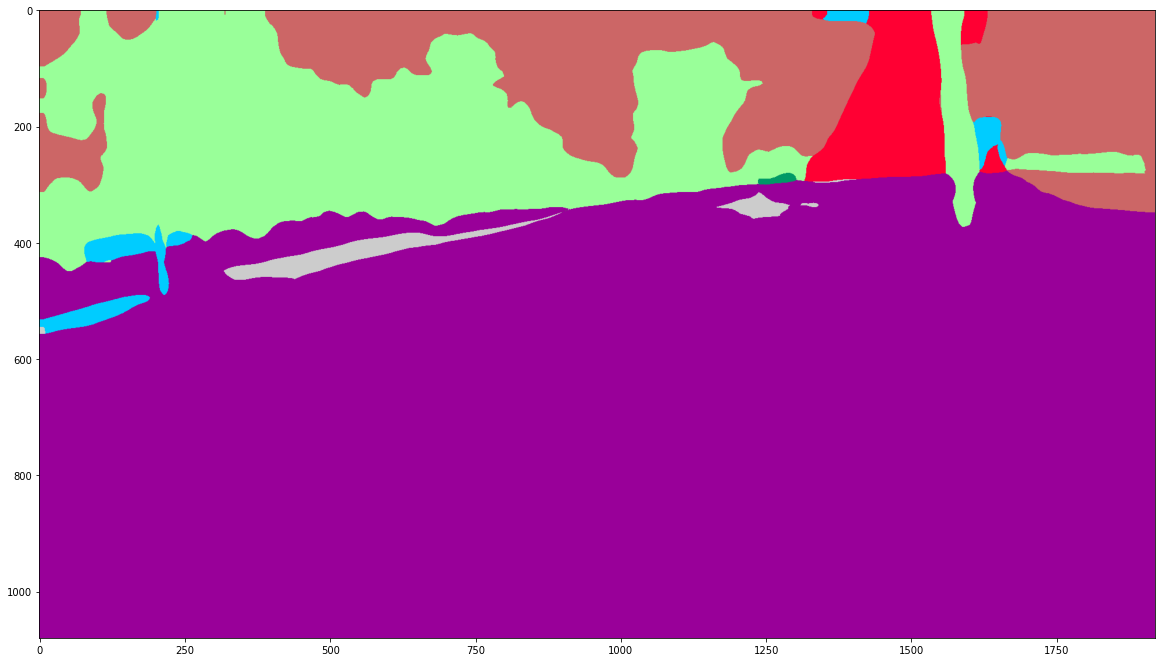

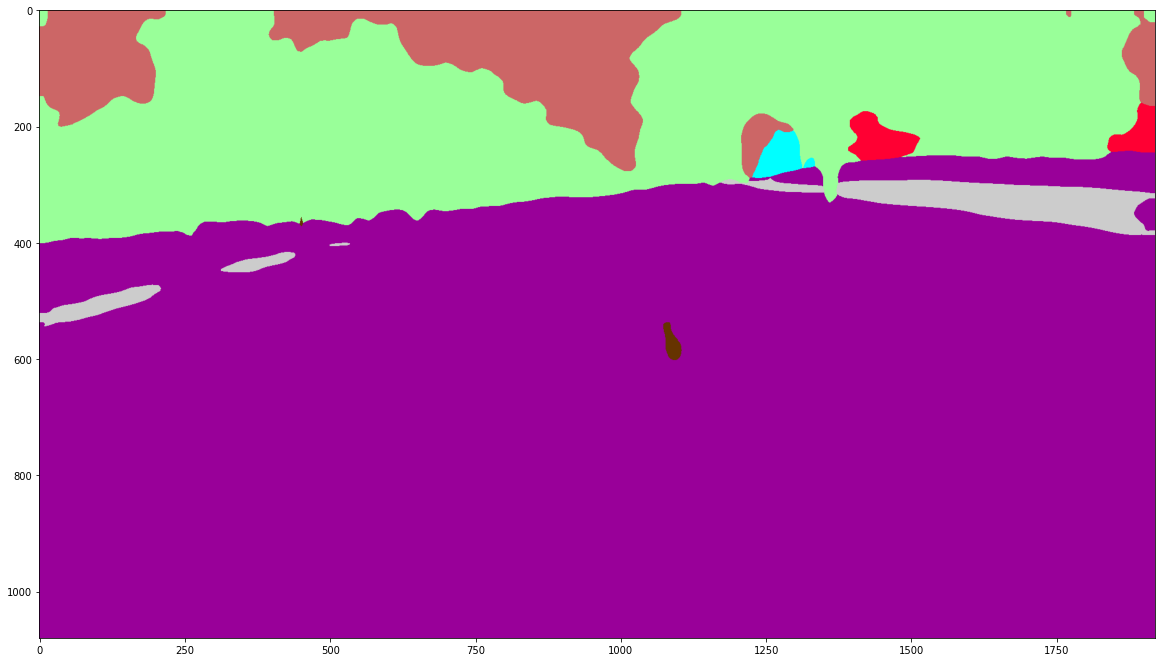

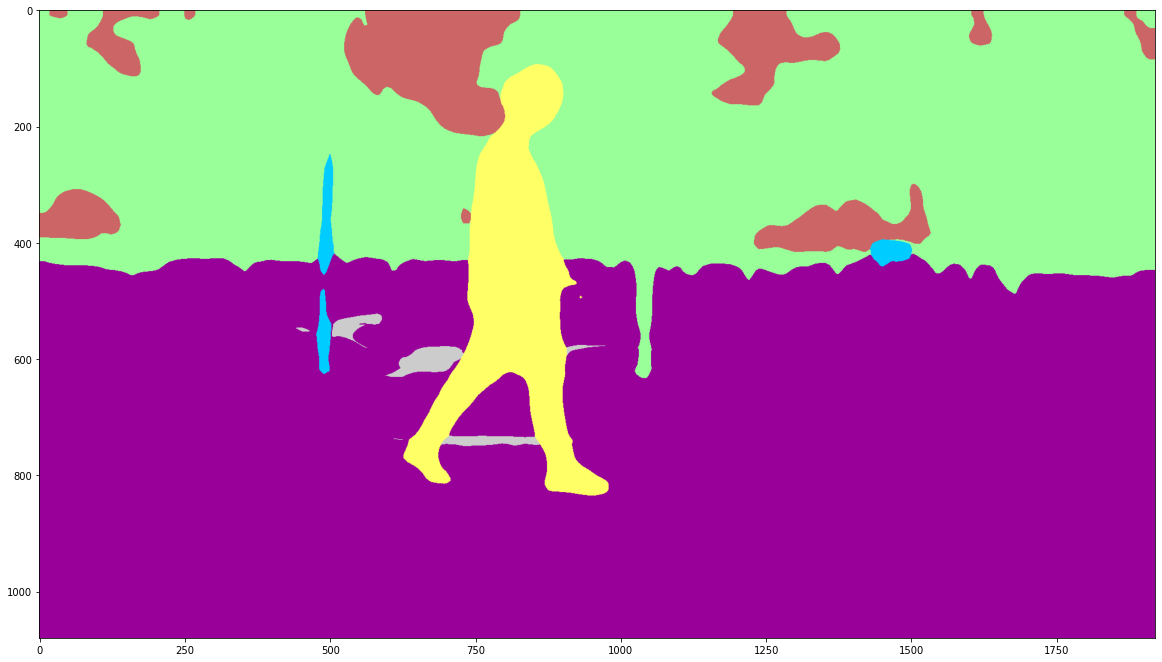

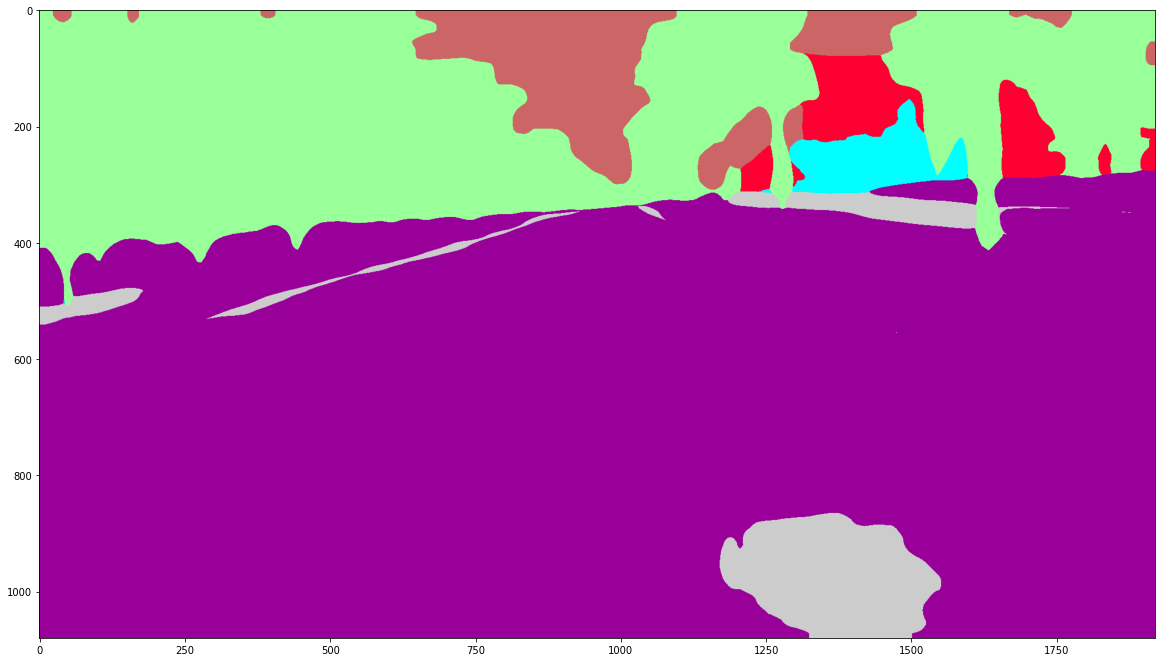

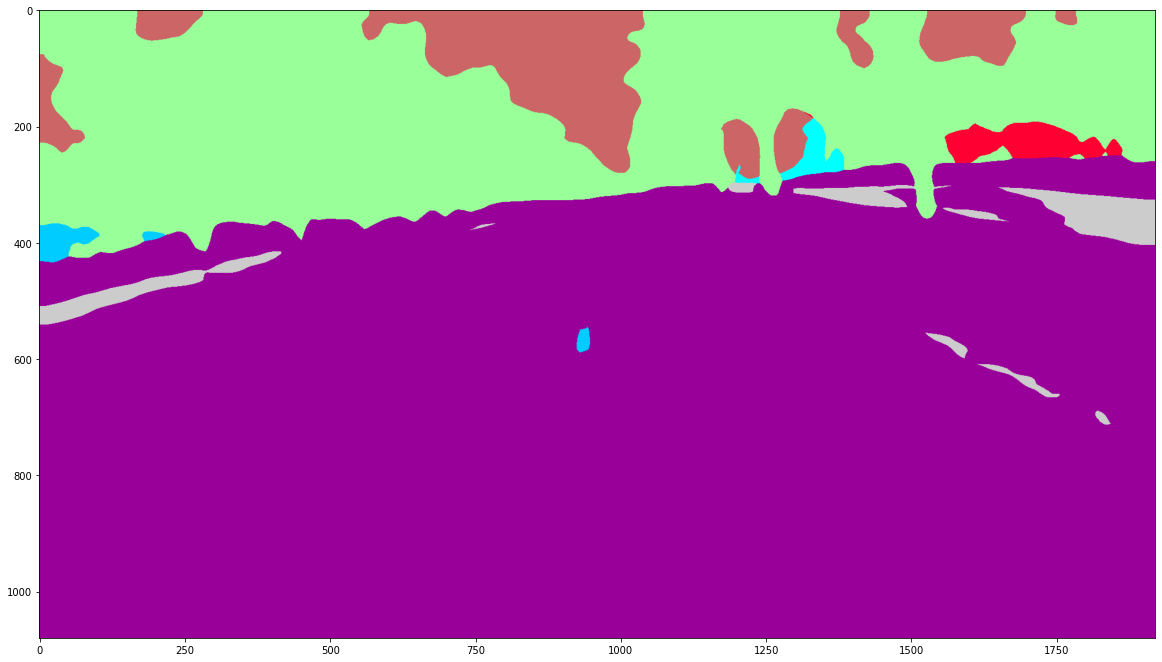

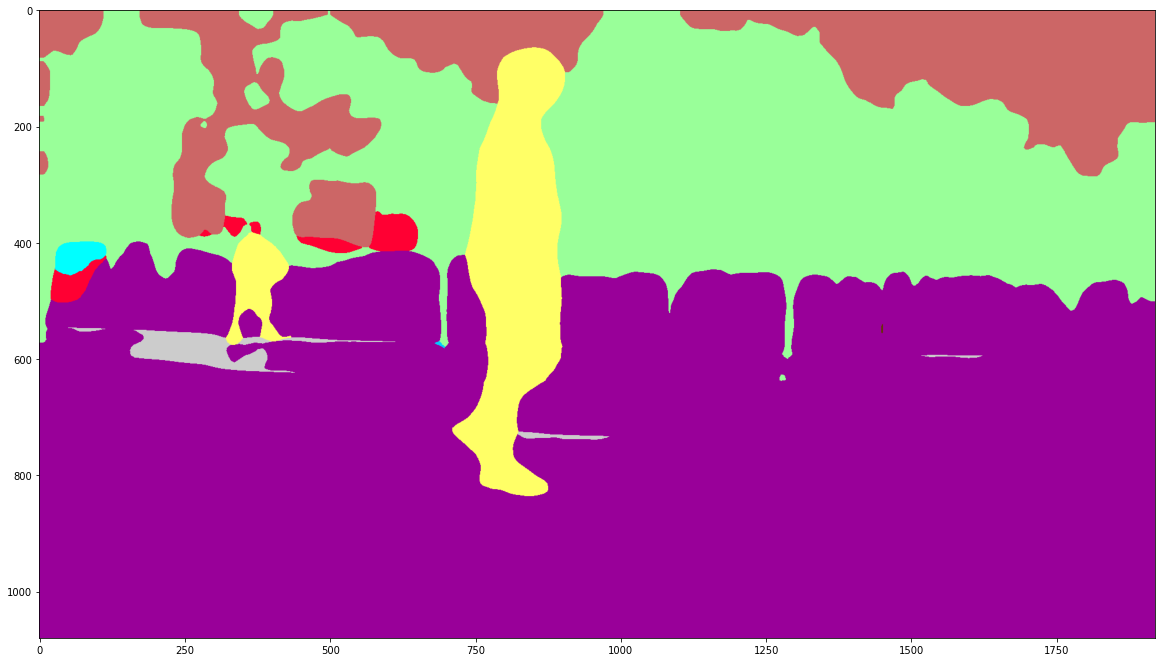

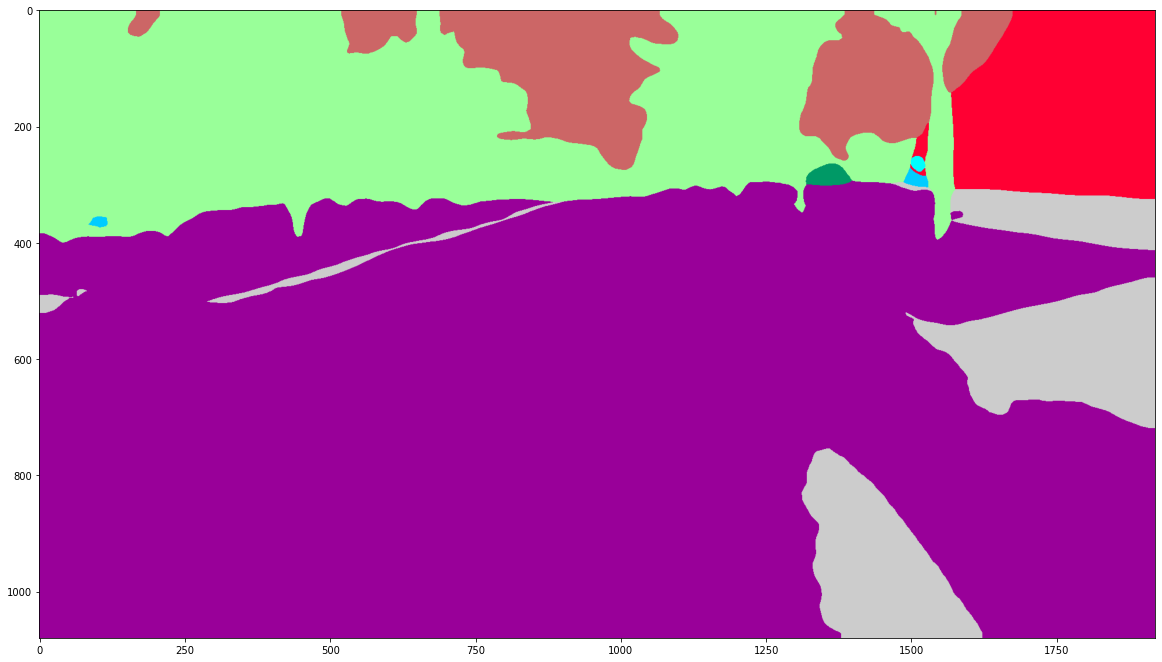

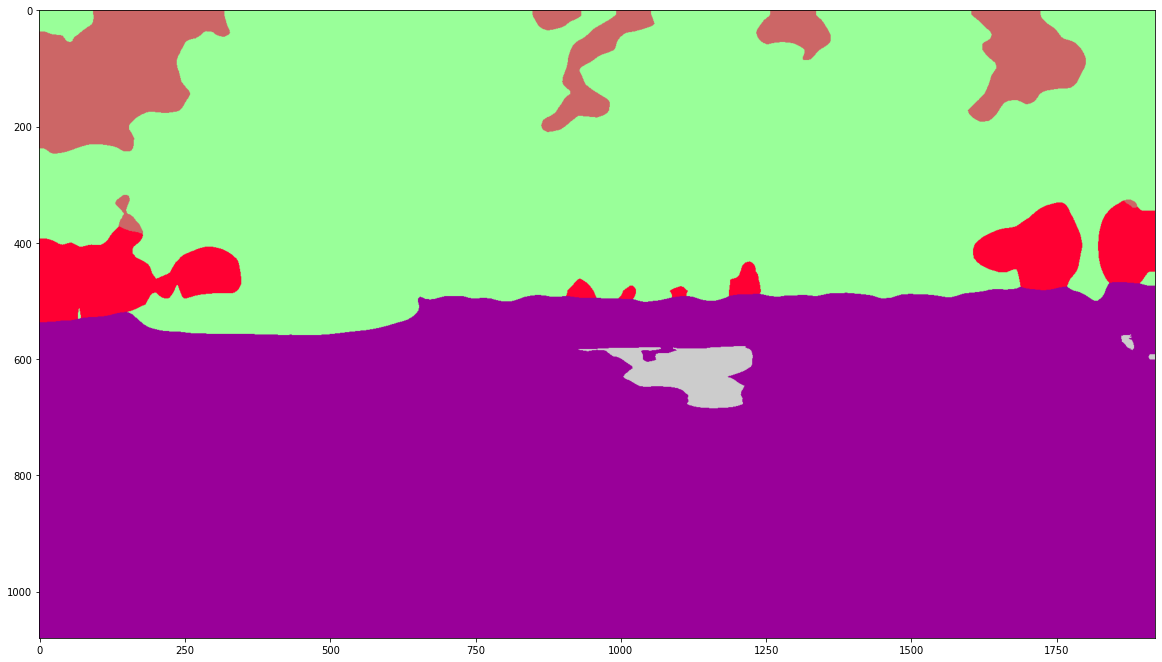

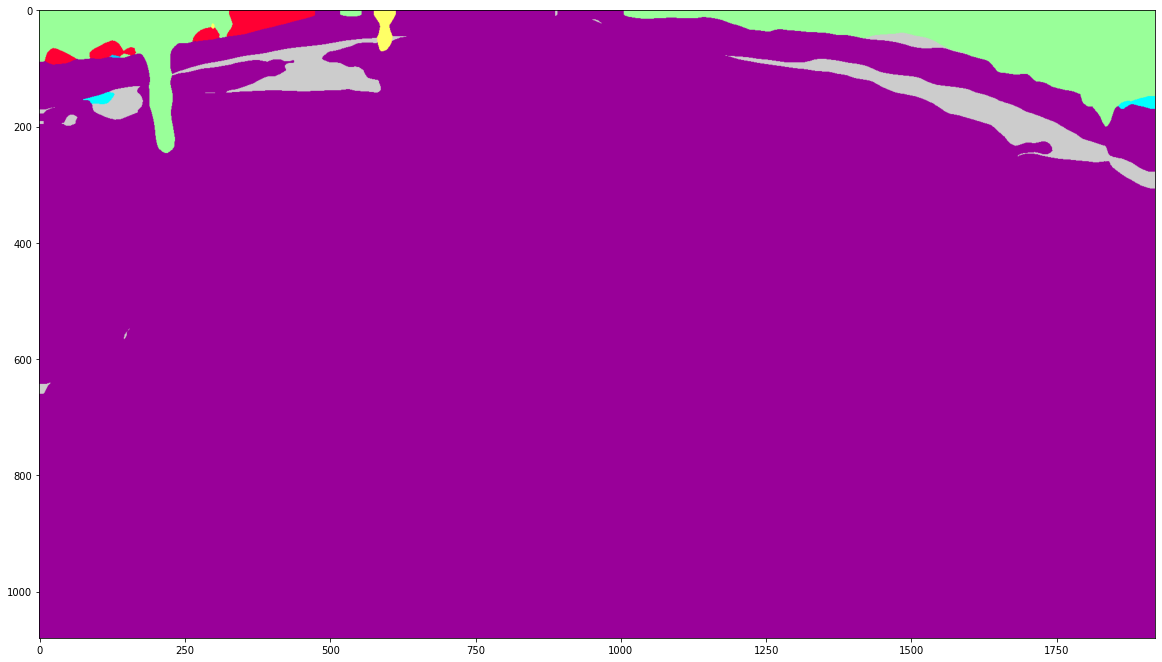

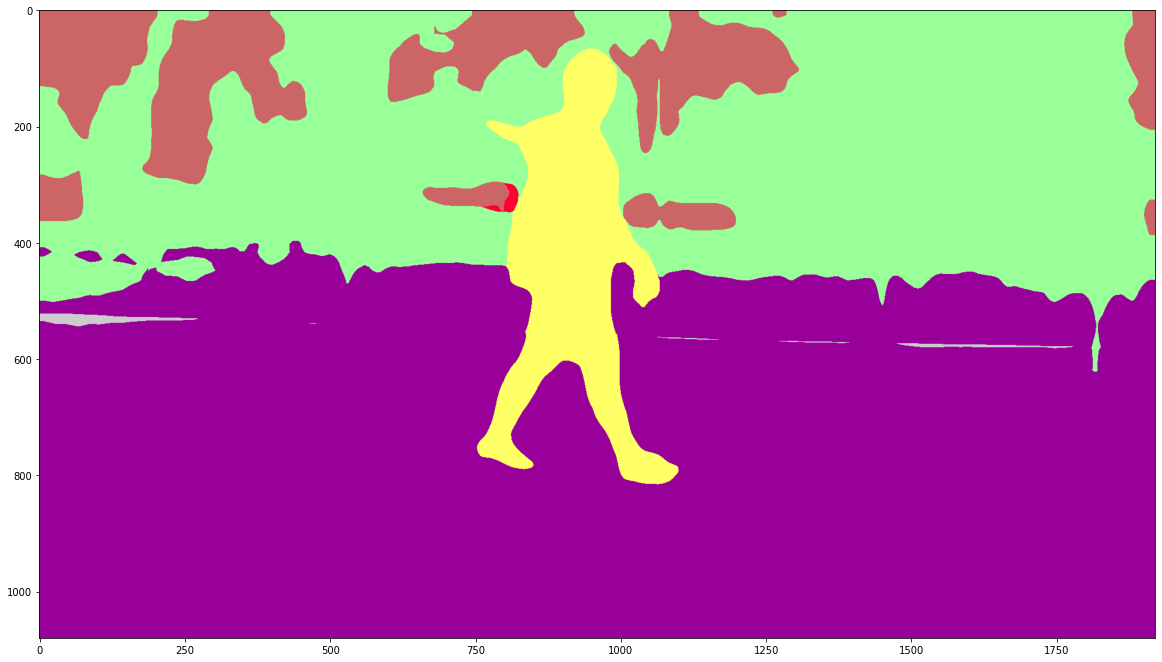

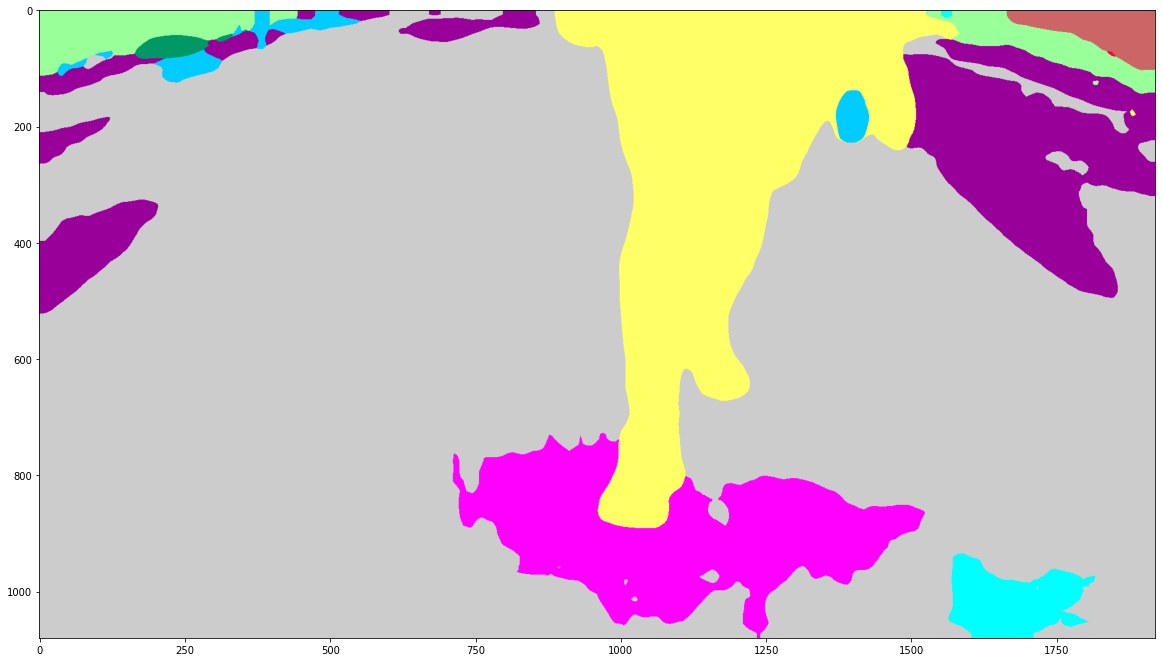

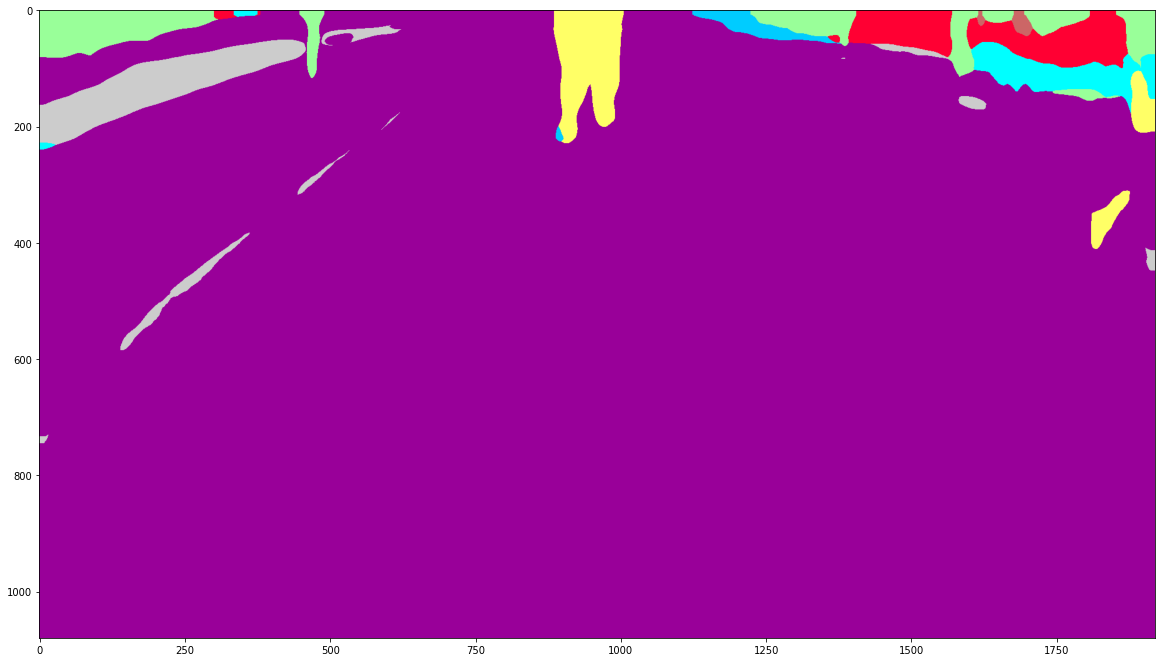

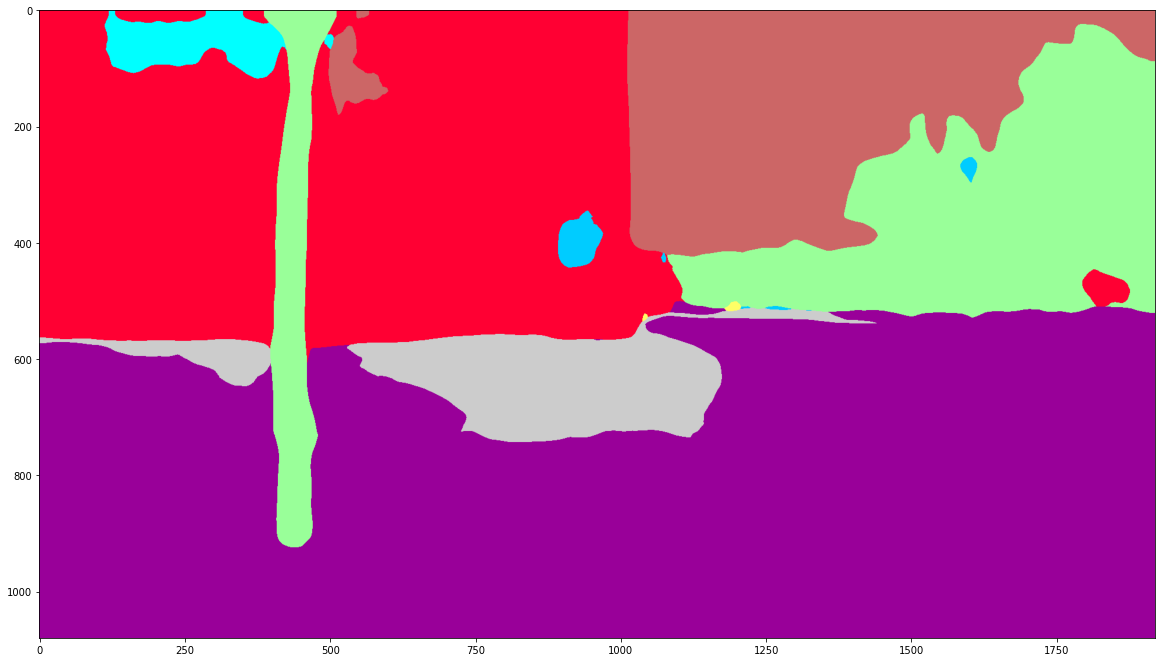

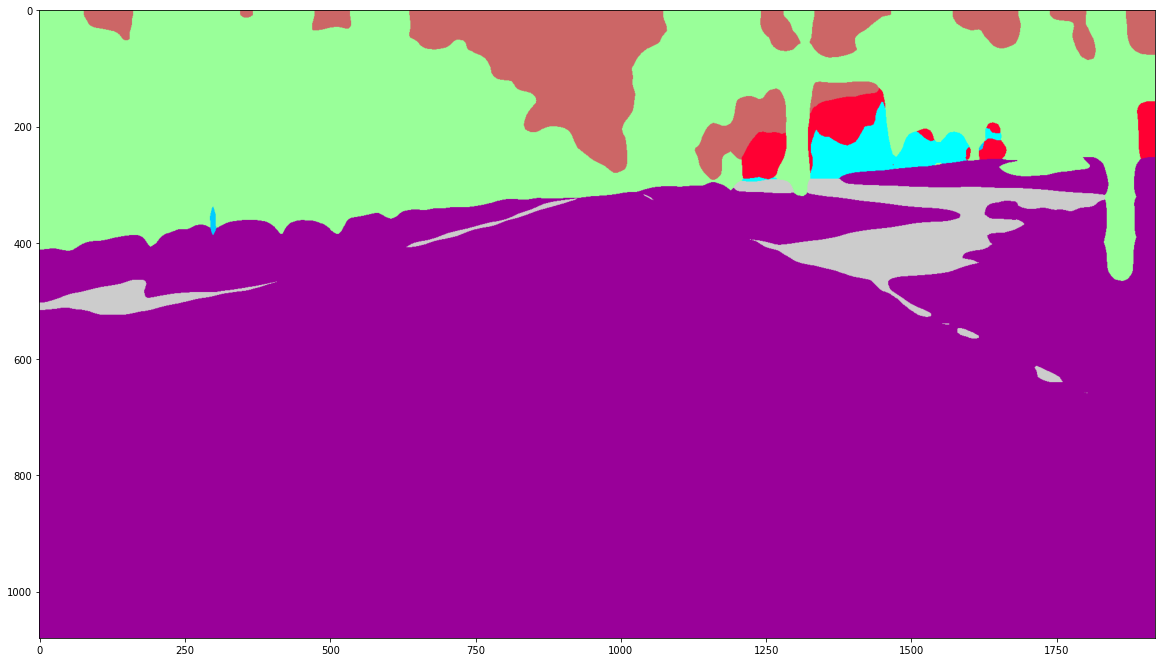

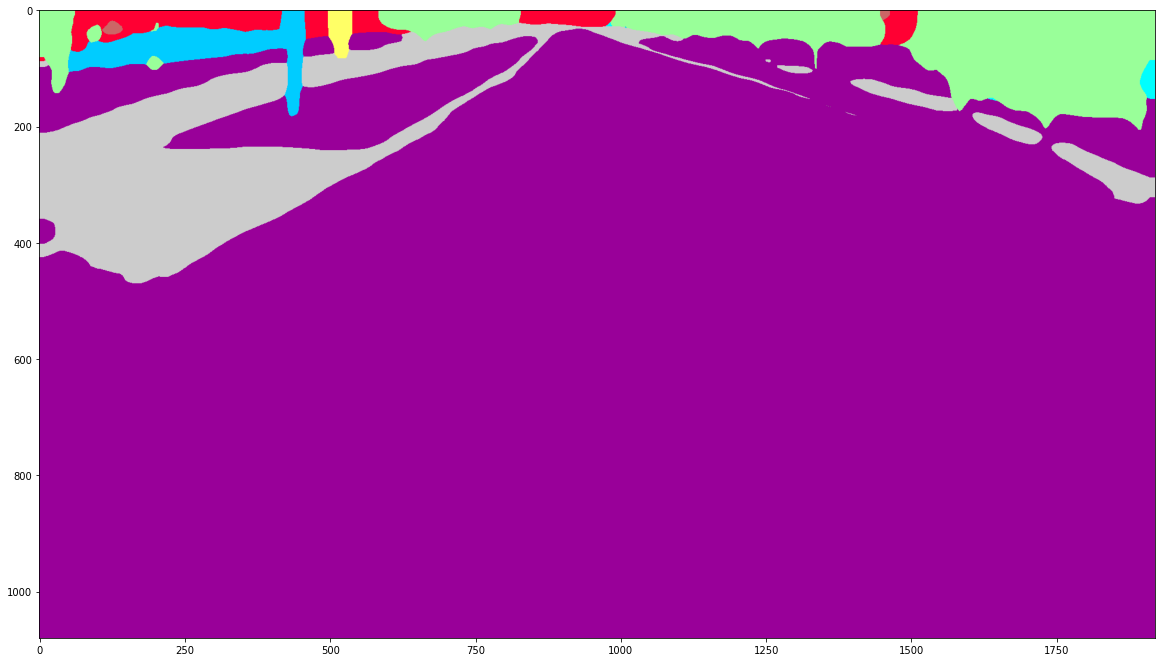

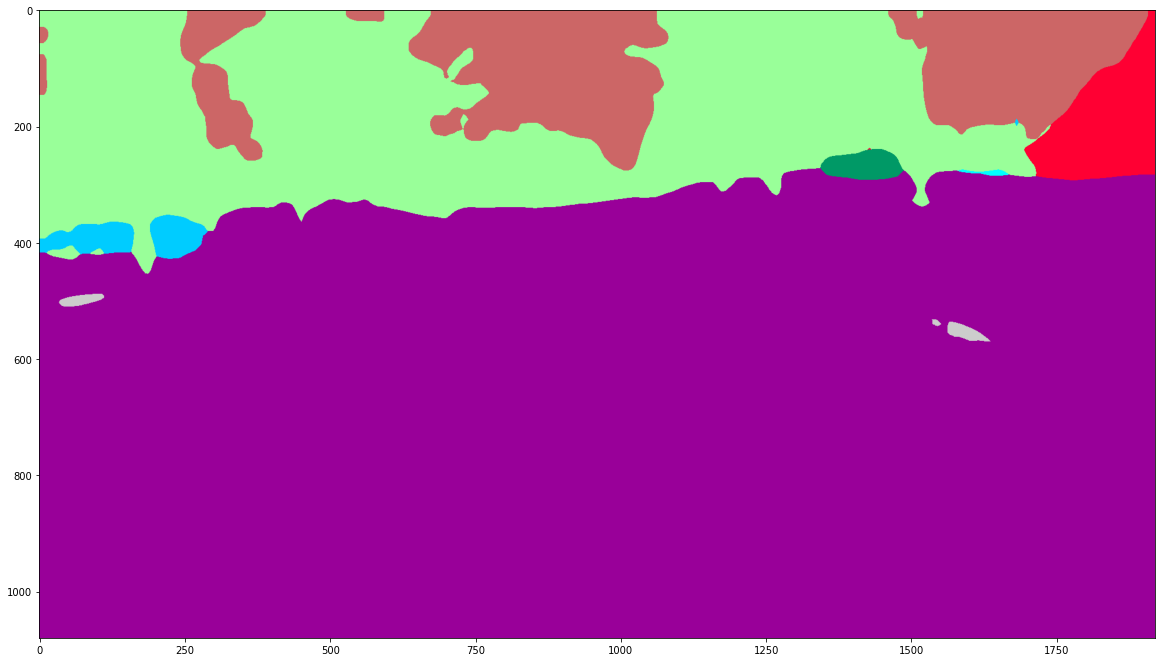

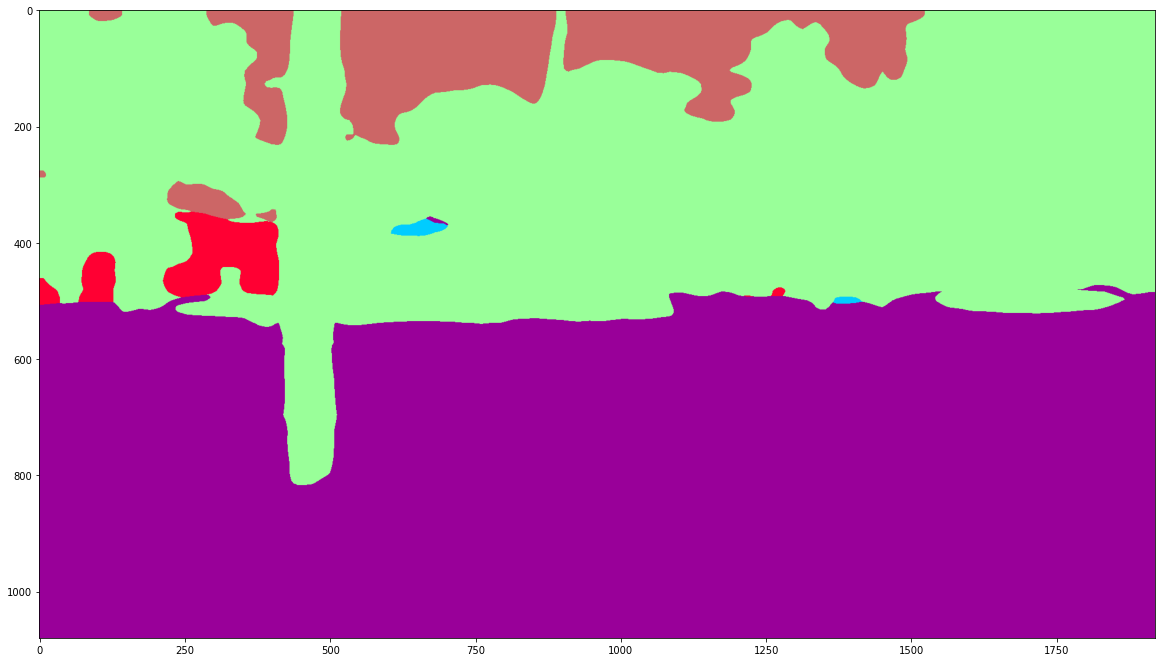

In [1]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

label_color = {15 : np.array([255,255,0]), #흰색
19 : np.array([51,0,255]), # 파랑
22 : np.array([102,102,204]), #보라
16 : np.array([255,0,255]), #진달래 (힛핑크)
20 : np.array([153,255,153]), #연두색
12 : np.array([153,0,153]), #자주색
18 : np.array([255,204,0]), # 주황색
21 : np.array([153,102,0]), # 갈색
13 : np.array([204,204,204]), #회색
5 : np.array([102,255,255]), #하늘색
9 : np.array([0,51,102]), #남색
1 : np.array([102,153,0]), #녹색
8 : np.array([255,51,0]), #빨강색
6 : np.array([51,0,0]), #검정색
7 : np.array([255,255,0]),#노랑
2 : np.array([153,153,102]), #카키색
3 : np.array([253,153,102]), #살구색
11 : np.array([255,204,204])} #핑크


json_path = '/data/ij/edge/semantic-segmentation-pytorch/save_json'
img_path = '/data/ij/edge/semantic-segmentation-pytorch/aihub_img'
save_path = '/data/ij/edge/semantic-segmentation-pytorch/color_img' 
fileEx = r'.json'
json_list = [file for file in os.listdir(json_path) if file.endswith(fileEx)]
for file in json_list : 
    full_json_name = os.path.join(json_path,file)
    with open(full_json_name, 'r') as file:
        json_dict = json.load(file)
        image_name = json_dict['image_name']
        full_img_name = os.path.join(img_path,image_name)
        ori_img = cv2.imread(full_img_name)
        seg = json_dict['seg']
#         f = plt.figure()
#         f.set_figwidth(20)
#         f.set_figheight(15)
#         plt.imshow(ori_img)
#         plt.show() 
        
        
        for p_info in seg : 
            box = p_info['box']
            points = p_info['points']
            label_number = p_info['label_number']
            label_name = p_info['label_name']
            point_list = []
            for pts in points :
                x = pts['x']
                y = pts['y']
                point_list.append([x,y])
            point_list = np.array(point_list)
            
            color_np = label_color[label_number]
#             color_np = np.asarray(np.random.choice(range(256), size=3), dtype=np.uint8)
            color_fill = (color_np[0].item(),color_np[1].item(),color_np[2].item())
            image = cv2.fillPoly(ori_img, pts=[point_list], color=color_fill)
            save_file_path = os.path.join(save_path,image_name)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            cv2.imwrite(save_file_path,image)
            
        f = plt.figure()
        f.set_figwidth(20)
        f.set_figheight(15)
        plt.imshow(image)
        plt.show() 
        


#         break

In [2]:
label_color = {15 : np.array([255,255,0]), #흰색
19 : np.array([51,0,255]), # 파랑
22 : np.array([102,102,204]), #보라
16 : np.array([255,0,255]), #진달래 (힛핑크)
20 : np.array([153,255,153]), #연두색
12 : np.array([153,0,153]), #자주색
18 : np.array([255,204,0]), # 주황색
21 : np.array([153,102,0]), # 갈색
13 : np.array([204,204,204]), #회색
5 : np.array([102,255,255]), #하늘색
9 : np.array([0,51,102]), #남색
1 : np.array([102,153,0]), #녹색
8 : np.array([255,51,0]), #빨강색
6 : np.array([51,0,0]), #검정색
7 : np.array([255,255,0]),#노랑
2 : np.array([153,153,102]), #카키색
3 : np.array([253,153,102]), #살구색
11 : np.array([255,204,204])} #핑크


In [3]:
a = np.array([ 52 ,213, 155])
print(a)

[ 52 213 155]
